In [1]:
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library Split Test dan Train
from sklearn.model_selection import train_test_split

# Feature Extraction
import datetime as dt

# Library Handling Outlier
from feature_engine.outliers import Winsorizer

# Library Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Library Scaling dan Encoding 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler # utk scaling setelah Feature Engineering karena sudah tidak ada feature yang extreme skew
from sklearn.preprocessing import LabelEncoder # utk encoding saat Feature Engineering


# Library Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate, BatchNormalization, Dropout, Activation
from tensorflow.keras import Model 



# Library Evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix 
from sklearn.metrics import roc_auc_score #untuk membuat dataframe evaluasi, agar lebih mudah membandingkan
from sklearn.metrics import recall_score, f1_score #untuk membuat dataframe evaluasi, agar lebih mudah membandingkan


# Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

# Library Saving Model
import pickle 

In [2]:
# Import data syntax pd.read_csv kemudian assign ke variabel 'df' agar memudahkan pemanggilan
df = pd.read_csv('churn.csv')

In [3]:
# Menampilkan 10 data teratas
pd.set_option('display.max_columns', 500) 
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
# Menampilkan 10 data terakhir
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [5]:
# Mengecek informasi dataset dengan .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [6]:
# Mengubah tipe data joining date dan last time visit
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d')
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S')

In [7]:
# Mengecek informasi dataset dengan .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       37010 non-null  object        
 1   age                           37010 non-null  int64         
 2   gender                        36951 non-null  object        
 3   region_category               31579 non-null  object        
 4   membership_category           37010 non-null  object        
 5   joining_date                  37010 non-null  datetime64[ns]
 6   joined_through_referral       31568 non-null  object        
 7   preferred_offer_types         36722 non-null  object        
 8   medium_of_operation           31615 non-null  object        
 9   internet_option               37010 non-null  object        
 10  last_visit_time               37010 non-null  datetime64[ns]
 11  days_since_last_login       

Dari informasi diatas dapat disimpulkan bahwa :
- Terdapat 37.010 data dengan 22 *feature*
- Terdapat 7 *feature numerical*, 13 *feature categorical* dan 2 *feature datetime*
- Terdapat *null values* pada *feature* `gender`, `region_category`, `joined_through_referral`, `preferred_offer_types`, dan `medium_of_operation `

In [8]:
# Copy dataset ke variabel df_eda
df_eda = df.copy()

In [9]:
# Mengecek statistik dasar dengan syntax .describe
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


Dari informasi diatas dapat disimpulkan bahwa :

- *Customer* memiliki rata-rata umur 37 tahun dengan *range* umur 10-64 tahun. Jika dilihat sekilas dari statistik deskripsi dasar, maka umur *customer* berdistribusi normal karena *mean* dan *median* nya tidak selisih jauh. Hal ini akan saya coba validasi saat plot distribusi untuk setiap *feature*
- *Customer* menghabiskan waktunya pada *website* rata-rata 279 dan memiliki *range* 0-3.235. Jika dilihat sekilas dari statistik deskripsi dasar, maka *feature* `avg_time_spent` tidak berdistribusi normal karena *mean* dan *median* nya selisih jauh. Hal ini akan saya coba validasi saat plot distribusi untuk setiap *feature*
- Jumlah hari dari terakhir login ada yang memiliki nilai minus. Seharusnya hari tidak dapat minus. Nanti akan saya *handling* pada poin *feature engineering*
- *Value transaction* dari setiap *customer* memiliki rata-rata 29.272 dan *range* 800-99.914. Jika dilihat sekilas dari statistik deskripsi dasar, maka *feature* `avg_transaction_value` tidak berdistribusi normal karena *mean* dan *median* nya selisih jauh. Hal ini akan saya coba validasi saat plot distribusi untuk setiap *feature*
- *Customer* rata-rata login 14x dengan *range* 0-73x. Jika dilihat sekilas dari statistik deskripsi dasar, maka *feature* `avg_frequency_login_days` berdistribusi normal karena *mean* dan *median* nya tidak selisih jauh. Hal ini akan saya coba validasi saat plot distribusi untuk setiap *feature*
- Hadiah poin ke *customer* memiliki rata-rata 623 dan *range* 0-2.069. Jika dilihat sekilas dari statistik deskripsi dasar, maka *feature* `points_in_wallet` tidak berdistribusi normal karena *mean* dan *median* nya selisih jauh. Hal ini akan saya coba validasi saat plot distribusi untuk setiap *feature*

In [10]:
# Get Numerical Columns and Categorical Columns

eda_num_columns = df_eda.select_dtypes(include=np.number).columns.tolist()
eda_cat_columns = df_eda.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', eda_num_columns)
print('---')
print('Categorical Columns : ', eda_cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
---
Categorical Columns :  ['user_id', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


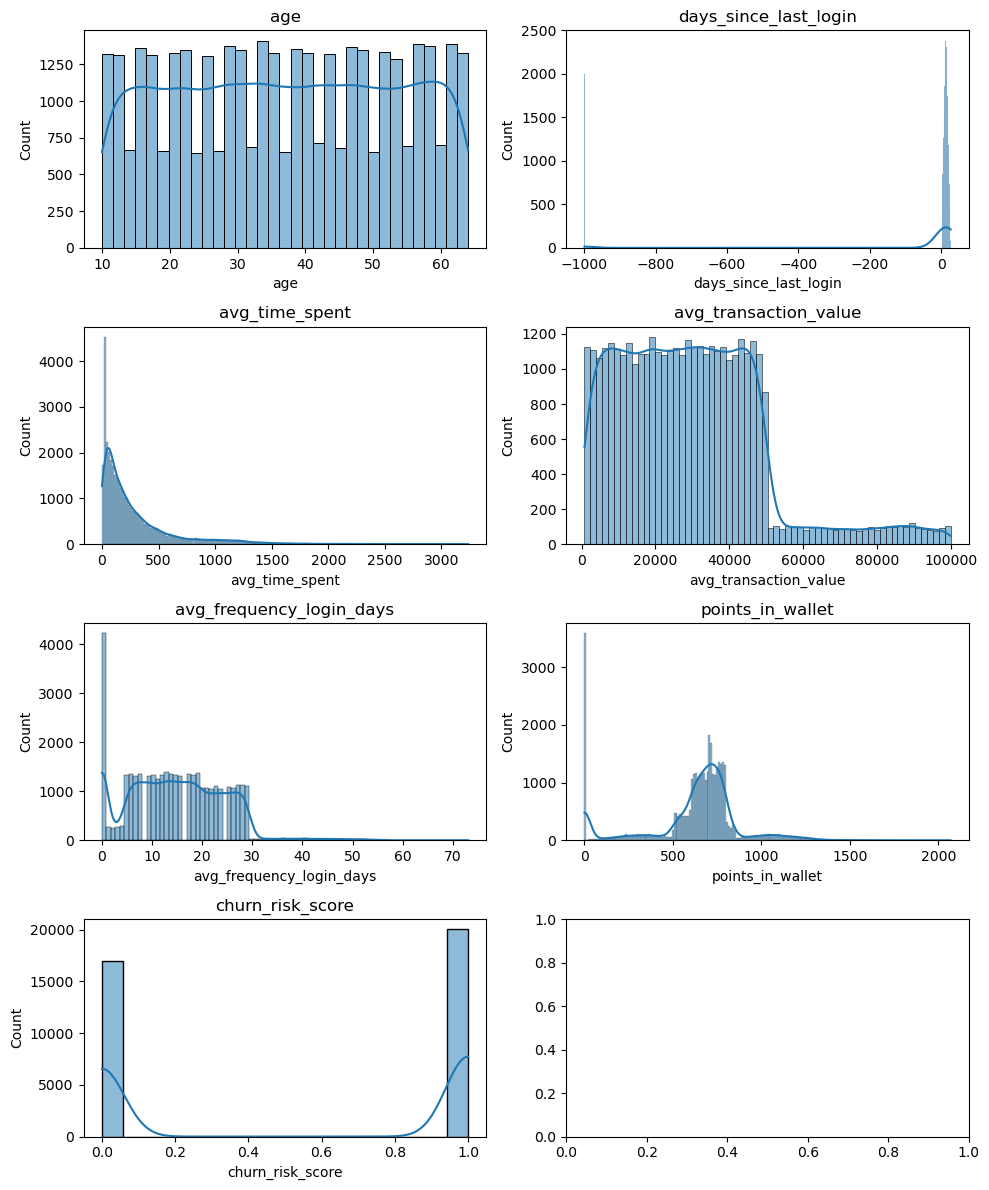

In [11]:
#Membuat plot distribusi feature numeric
k = len(eda_num_columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df[eda_num_columns].items()):
    r, c = i // n, i % n
    ax = axes[r, c]
    sns.histplot(col,kde=True,ax=ax)
    ax.set_title(name)
fig.tight_layout()

Dari informasi diatas dapat disimpulkan bahwa :
- Umur *customer* terdistribusi merata
- Jumlah hari dari terakhir login terdistribusi diatas 1 hari
- *Customer* banyak menghabiskan waktu di *website* pada 0-300
- *Value transaction* dari *customer* kebanyakan pada 1-50.000
- Frekuensi login dari *customer* terbanyak pada 1x login
- Banyak *customer* yang tidak mendapatkan bonus *point* di *wallet*
- *Customer* yang *churn* lebih banyak dari pada *customer* yang tidak *churn* 

In [12]:
# Definisi kolom yang akan dicek unique value nya (multiclass)
cek_unique =  ['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option','complaint_status', 'feedback']

In [13]:
# Pengecekan unique Value
for column in df_eda[cek_unique]:
    print(f'{column} : {df_eda[column].unique()}')
    print(f'len {column} : {len(df_eda[column].unique())}')
    print()

region_category : [nan 'City' 'Village' 'Town']
len region_category : 4

membership_category : ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']
len membership_category : 6

preferred_offer_types : ['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons' nan]
len preferred_offer_types : 4

medium_of_operation : [nan 'Desktop' 'Smartphone' 'Both']
len medium_of_operation : 4

internet_option : ['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']
len internet_option : 3

complaint_status : ['No Information Available' 'Not Applicable' 'Unsolved' 'Solved'
 'Solved in Follow-up']
len complaint_status : 5

feedback : ['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website']
len feedback : 9



In [14]:
# Handling typo feedback
df['feedback'] = df['feedback'].replace(['No reason specifi'], 'No reason specified')
df_eda['feedback'] = df_eda['feedback'].replace(['No reason specifi'], 'No reason specified')

In [15]:
# print mix date join dan max date join
print('Min date join : ', df_eda['joining_date'].min())
print('Max date join : ', df_eda['joining_date'].max())

Min date join :  2015-01-01 00:00:00
Max date join :  2017-12-31 00:00:00


Dari informasi diatas dapat disimpulkan bahwa :
- *Region category* dari *customer* diibagi menjadi 3 yaitu *city*, *village* dan *town*
- Membership ada 2 kelas utama yaitu kelas No Membership dan Membership. Untuk kelas Membership dibagi menjadi 5 kelas yaitu Basic, Silver, Premium, Gold dan Platinum
- Tawaran yang disukai *customer* dibagi menjadi 3 yaitu tanpa tawaran, credit/debit dan gift voucher/coupons
- *Customer* menggunakan platform desktop atau smartphone untuk melakukan transaksi. Akan tetapi ada juga *customer* yang melakukan transaksi dengan menggunakan desktop atau smartphone
- Internet yang digunakan *customer* berasal dari 3 sumber yaitu Wi-Fi, Fiber Optic dan Mobile Data
- Status *complain* dari *customer* dibagi menjadi 5 status yaitu tidak ada informasi, tidak dapat diaplikasikan, tidak dapat diselesaikan, diselesaikan dan diselesaikan dengan follow up
- *Feedback* dari *customer* dibagi menjadi 9 jenis yaitu website yang buruk, CS yang buruk, terlalu banyak iklan, kualitas produk yang buruk, tidak ada alasan, stok produk selalu tersedia, harga *reasonable*, CS berkualitas dan UI website yang *friendly*
- *Customer* melakukan registrasi pada website dengan *range* tanggal 01/01/2015-31/12/2017

In [16]:
# Menghitung count unique value dari churn_risk_score
print(df_eda['churn_risk_score'].value_counts())

1    20018
0    16992
Name: churn_risk_score, dtype: int64


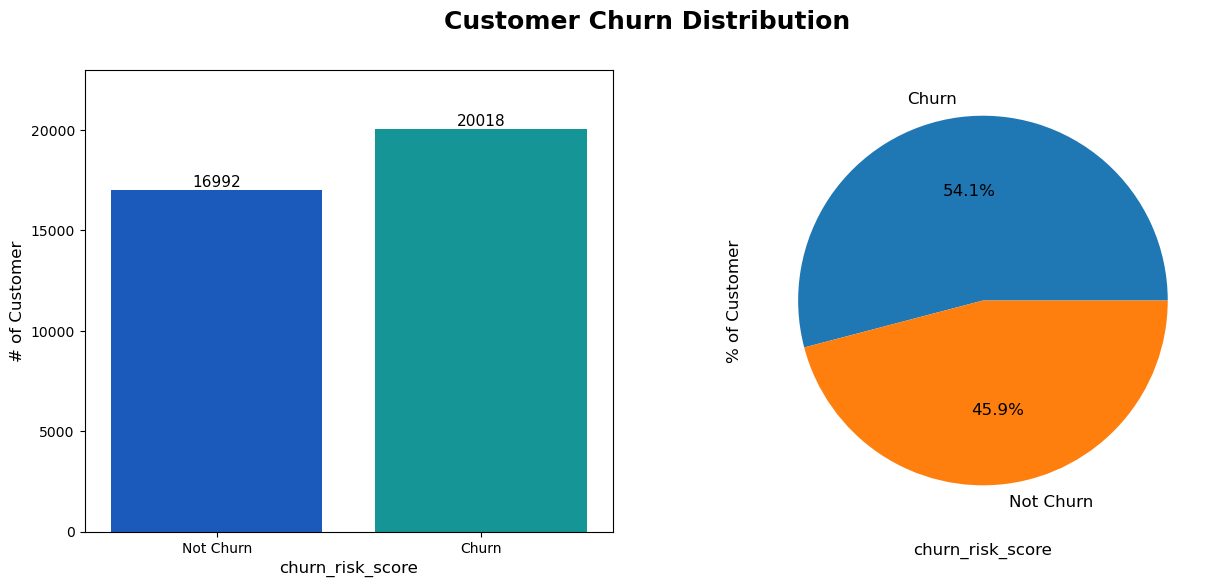

In [17]:
# Membuat visualisasi Distribusi churn_risk_score
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='churn_risk_score', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("churn_risk_score", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Customer Churn Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,23000)
plt.xlabel("churn_risk_score", fontsize= 12)
plt.ylabel("# of Customer", fontsize= 12)
ax[0].set_xticks([0,1], ['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+405), ha='center', va='center',fontsize = 11) 

df_eda['churn_risk_score'].value_counts().plot(kind='pie', labels = ['Churn', 'Not Churn'],autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Customer", fontsize= 12)
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* yang *churn* lebih banyak dari pada *customer* yang tidak *churn*

In [18]:
# Pengelompokan Age berdasarkan bins
df_eda['AgeBin'] = pd.cut(df_eda['age'],[10, 20, 30, 40, 50, 60, 70])
print(df_eda['AgeBin'].value_counts())

(40, 50]    6790
(50, 60]    6780
(20, 30]    6737
(30, 40]    6699
(10, 20]    6619
(60, 70]    2715
Name: AgeBin, dtype: int64


In [19]:
# Age vs % Churn
df_eda['churn_risk_score'].groupby(df_eda['AgeBin']).value_counts(normalize = True)

AgeBin    churn_risk_score
(10, 20]  1                   0.532407
          0                   0.467593
(20, 30]  1                   0.541042
          0                   0.458958
(30, 40]  1                   0.549634
          0                   0.450366
(40, 50]  1                   0.536819
          0                   0.463181
(50, 60]  1                   0.548673
          0                   0.451327
(60, 70]  1                   0.534807
          0                   0.465193
Name: churn_risk_score, dtype: float64

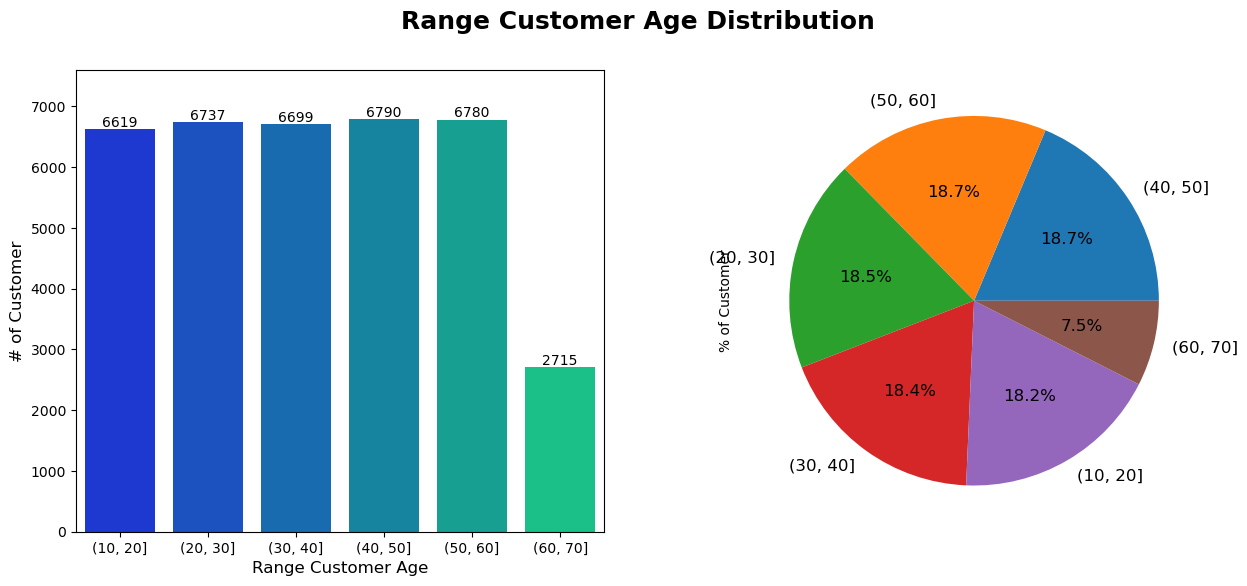

In [20]:
# Visualisasi distribusi range age
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='AgeBin', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("Range Customer Age", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Range Customer Age Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,7600)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+105), ha='center', va='center',fontsize = 10) 

df_eda['AgeBin'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

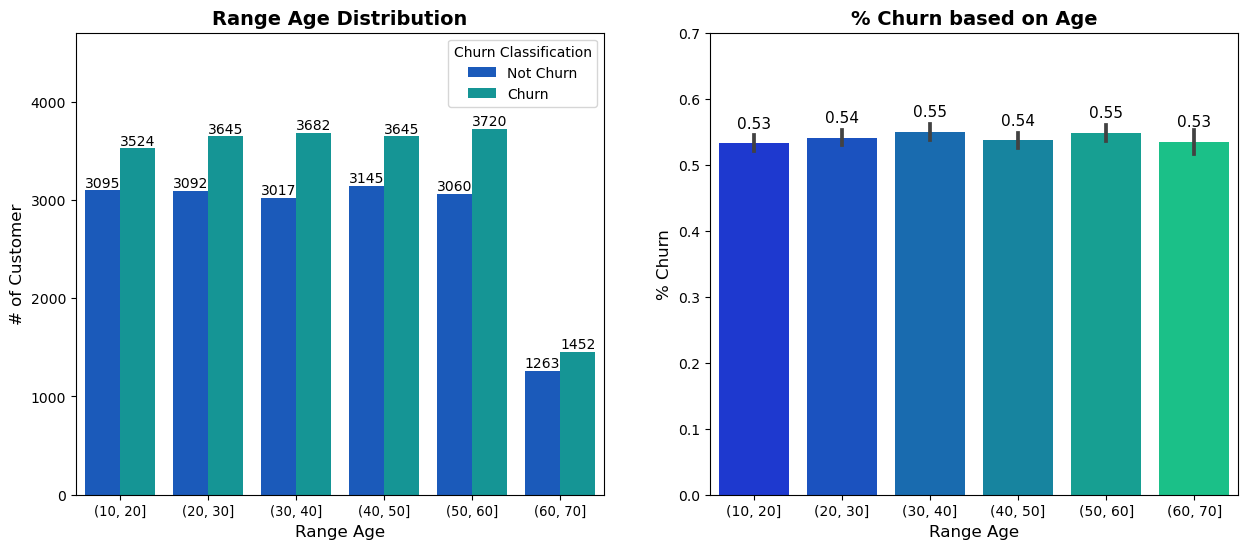

In [21]:
# Membuat Visualisasi distribusi Age berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

df_eda['AgeBin'] = df_eda['AgeBin'].astype('str')
AgeBin_order = ['(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]']


sns.countplot(data = df_eda, x = 'AgeBin', hue="churn_risk_score", palette = 'winter', order = AgeBin_order, ax=ax[0])
ax[0].set_title('Range Age Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("Range Age", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+75), ha='center', va='center',fontsize = 10) 
ax[0].set_ylim(0,4700)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'AgeBin', y = 'churn_risk_score', data = df_eda, palette = 'winter', order = AgeBin_order,ax=ax[1])
ax[1].set_xlabel("Range Age", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Age', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.7)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* yang memiliki *range* umur 40-50 tahun
- *Customer* yang paling banyak *churn* adalah *customer* dengan *range* umur 50-60 tahun
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *range* umur, maka tidak ada perbedaan signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `age` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

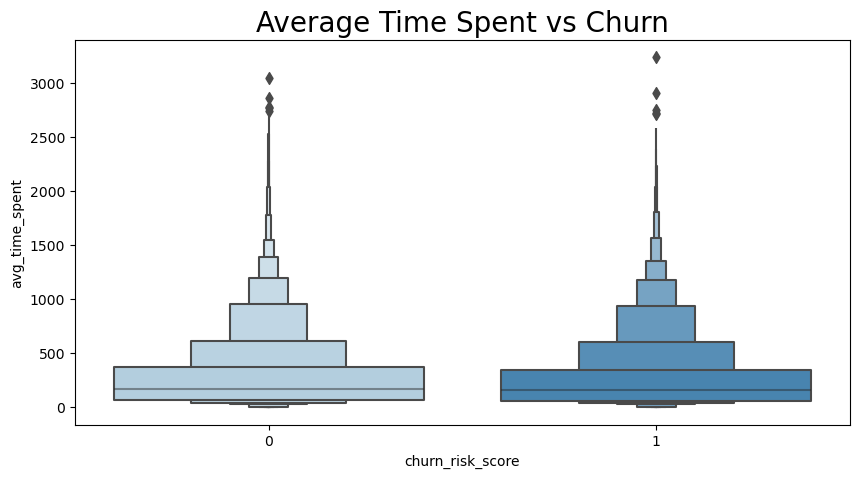

In [22]:
#  Visualisasi avg_time_spent vs Churn
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxenplot(y=df_eda['avg_time_spent'], x= df_eda['churn_risk_score'], palette = 'Blues')
plt.title('Average Time Spent vs Churn', fontsize = 20)
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Jika dilihat pada visualisasi diatas maka `avg_time_spent` antara *customer* yang *churn* dan *customer* yang tidak *churn* tidak berbeda secara signifikan. **Kemungkinan *feature* `avg_time_spent` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

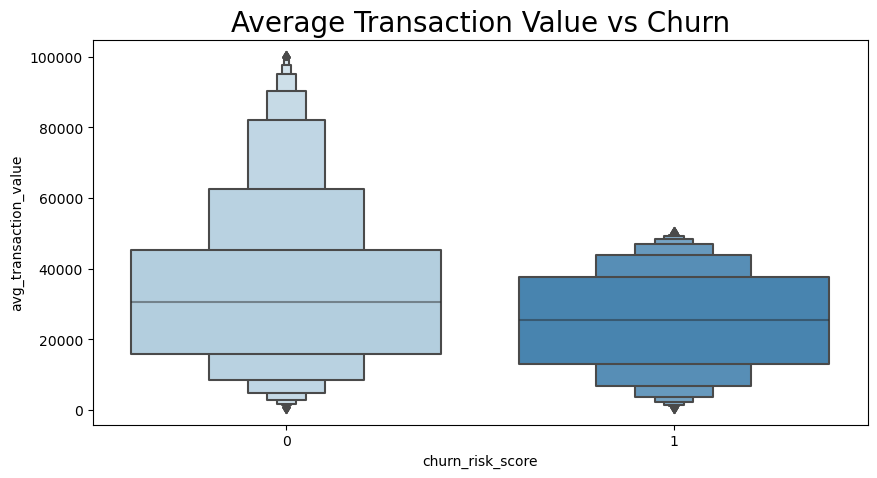

In [23]:
#  Visualisasi avg_transaction_value vs Churn
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxenplot(y=df_eda['avg_transaction_value'], x= df_eda['churn_risk_score'], palette = 'Blues')
plt.title('Average Transaction Value vs Churn', fontsize = 20)
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* yang tidak *churn* memiliki *average transaction value* yang lebih tinggi (terpusat di 18.000-40.000) dari pada *customer* yang *churn* (terpusat di 16.000-36.000). **Kemungkinan *feature* `avg_transaction_value` berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

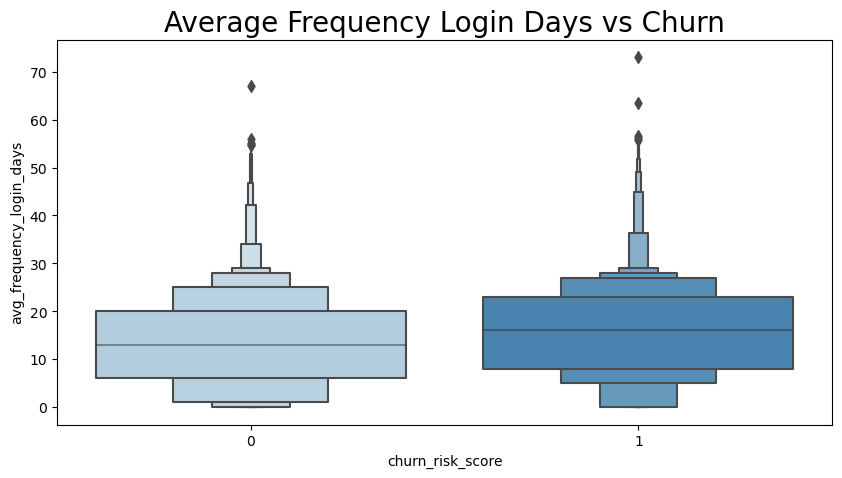

In [24]:
#  Visualisasi avg_frequency_login_days vs Churn
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxenplot(y=df_eda['avg_frequency_login_days'], x= df_eda['churn_risk_score'], palette = 'Blues')
plt.title('Average Frequency Login Days vs Churn', fontsize = 20)
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* yang tidak *churn* memiliki *average frequency login days* yang lebih rendah (terpusat di 8-20x) dari pada *customer* yang *churn* (terpusat di 10-25x). **Kemungkinan *feature* `avg_frequency_login_days` berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

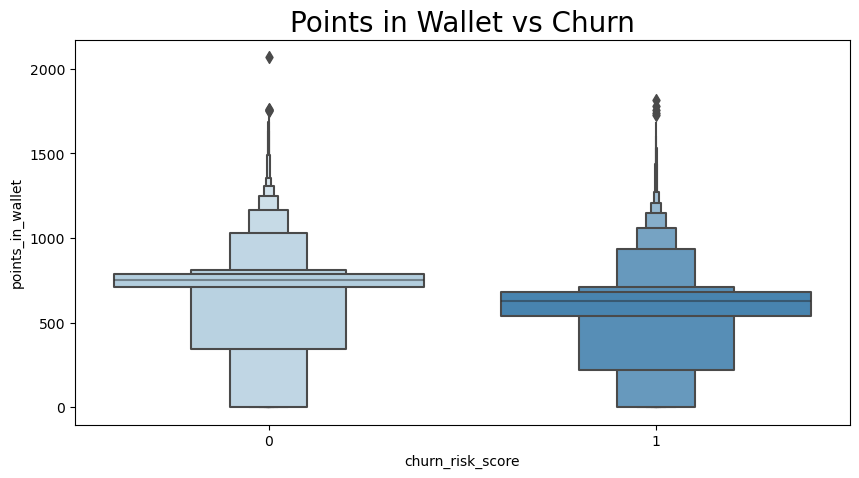

In [25]:
#  Visualisasi points_in_wallet vs Churn
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxenplot(y=df_eda['points_in_wallet'], x= df_eda['churn_risk_score'], palette = 'Blues')
plt.title('Points in Wallet vs Churn', fontsize = 20)
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* yang tidak *churn* memiliki *points in wallet* yang lebih tinggi (terpusat di 700-800) dari pada *customer* yang *churn* (terpusat di 600-700). **Kemungkinan *feature* `points_in_wallet` berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

<AxesSubplot:>

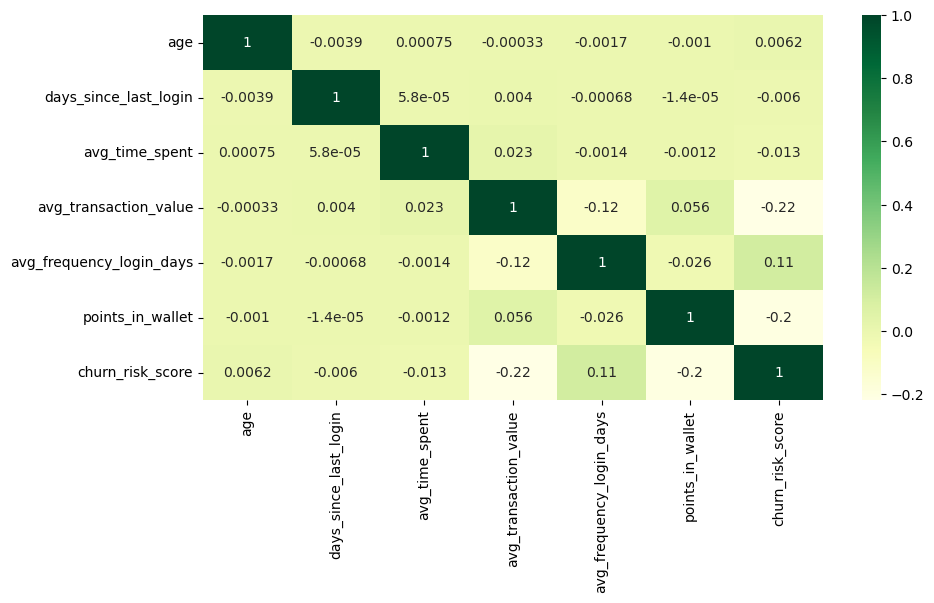

In [26]:
# Pembuatan heatmap untuk menunjukkan korelasi antar feature
plt.rcParams['figure.figsize'] = [10,5]
sns.heatmap(df_eda[eda_num_columns].corr(), annot = True, color = 'blue', cmap = 'YlGn')

Dari informasi diatas dapat disimpulkan bahwa :
- Korelasi antar *feature* lemah (untuk korelasi positif maupun korelasi negatif)
- Korelasi yang tertinggi adalah (diatas 0.1 atau dibawah -0.1) :
    1. `churn_risk_score` dengan `avg_transaction_value` -> Korelasi lemah negatif
    2. `churn_risk_score` dengan `avg_frequency_login_days` -> Korelasi lemah positif
    3. `churn_risk_score` dengan `points_in_wallet` -> Korelasi lemah negatif
    4. `avg_transaction_value` dengan `avg_frequency_login_days` -> Korelasi lemah negatif

In [27]:
# Menghitung distribusi gender
df_eda['gender'].value_counts()

F    18497
M    18454
Name: gender, dtype: int64

In [28]:
# Distribusi gender berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['gender']).value_counts(normalize = True)

gender  churn_risk_score
F       1                   0.543385
        0                   0.456615
M       1                   0.538528
        0                   0.461472
Name: churn_risk_score, dtype: float64

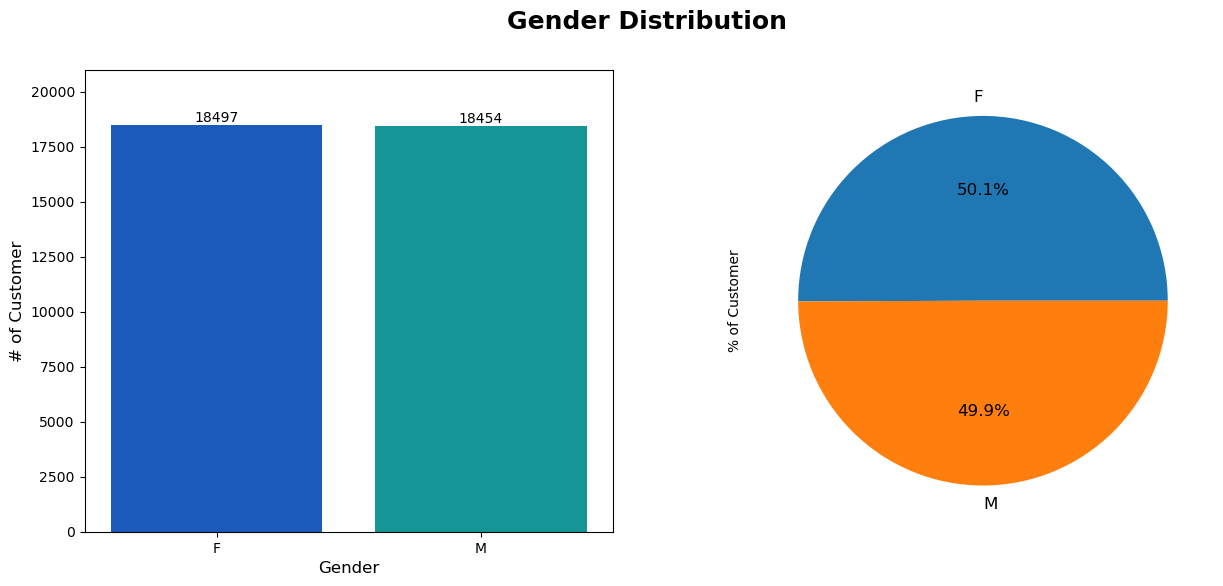

In [29]:
#Visualisasi distribusi Gender
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='gender', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("Gender", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Gender Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,21000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+305), ha='center', va='center',fontsize = 10) 

df_eda['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

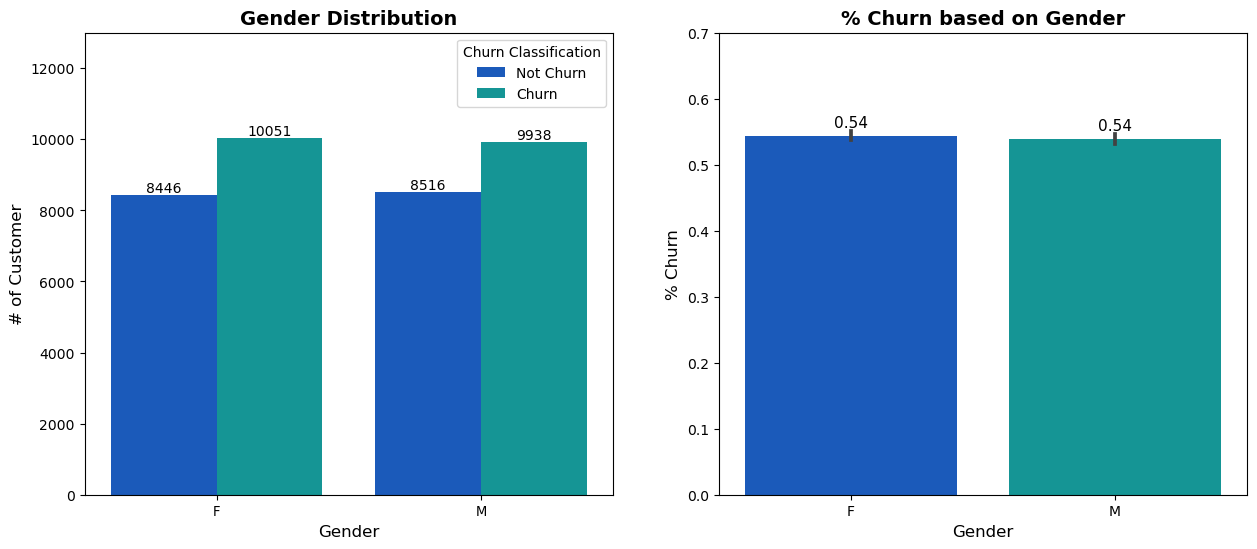

In [30]:
# Membuat Visualisasi distribusi Gender berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'gender', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Gender Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("Gender", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+175), ha='center', va='center',fontsize = 10) 
ax[0].set_ylim(0,13000)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'gender', y = 'churn_risk_score', data = df_eda, palette = 'winter',ax=ax[1])
ax[1].set_xlabel("Gender", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Gender', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.7)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.02), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* wanita (50.1%). Akan tetapi tidak berbeda signifikan, hanya berbeda 0.2% dari *customer* pria
- *Customer* yang paling banyak *churn* adalah *customer* wanita. Kemungkinan banyak pada kelas wanita karena *customer* paling banyak juga pada kelas ini
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *gender*, maka tidak ada perbedaan signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `gender` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [31]:
# Menghitung distribusi region_category
df_eda['region_category'].value_counts()

Town       14135
City       12744
Village     4700
Name: region_category, dtype: int64

In [32]:
# Distribusi region_category berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['region_category']).value_counts(normalize = True)

region_category  churn_risk_score
City             1                   0.547003
                 0                   0.452997
Town             1                   0.541988
                 0                   0.458012
Village          1                   0.512128
                 0                   0.487872
Name: churn_risk_score, dtype: float64

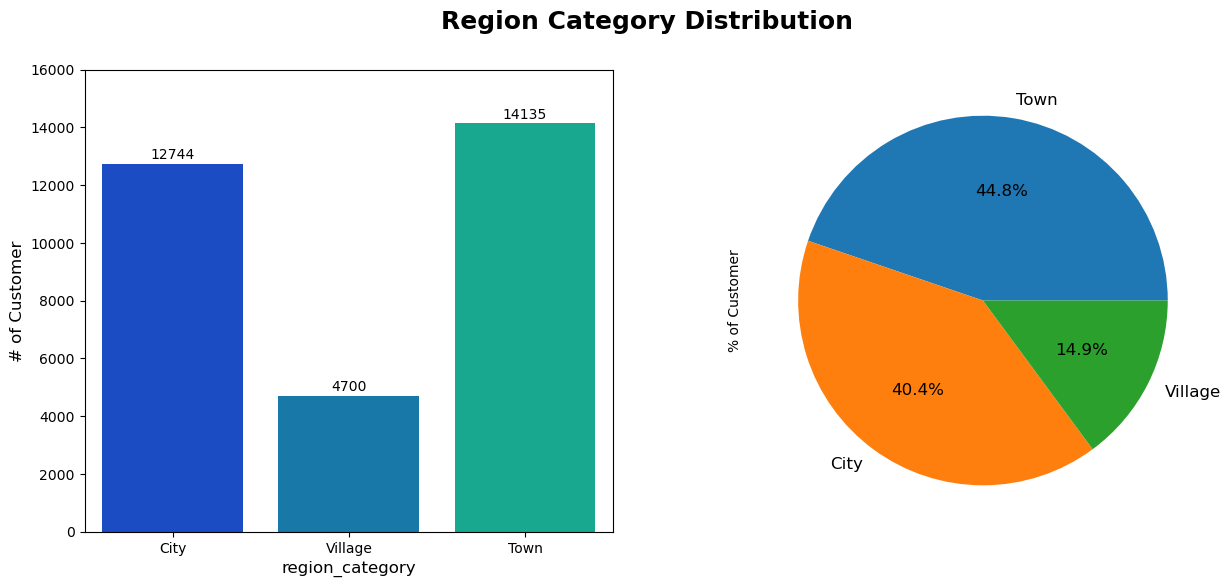

In [33]:
#Visualisasi distribusi region_category
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='region_category', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("region_category", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Region Category Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,16000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+305), ha='center', va='center',fontsize = 10) 

df_eda['region_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

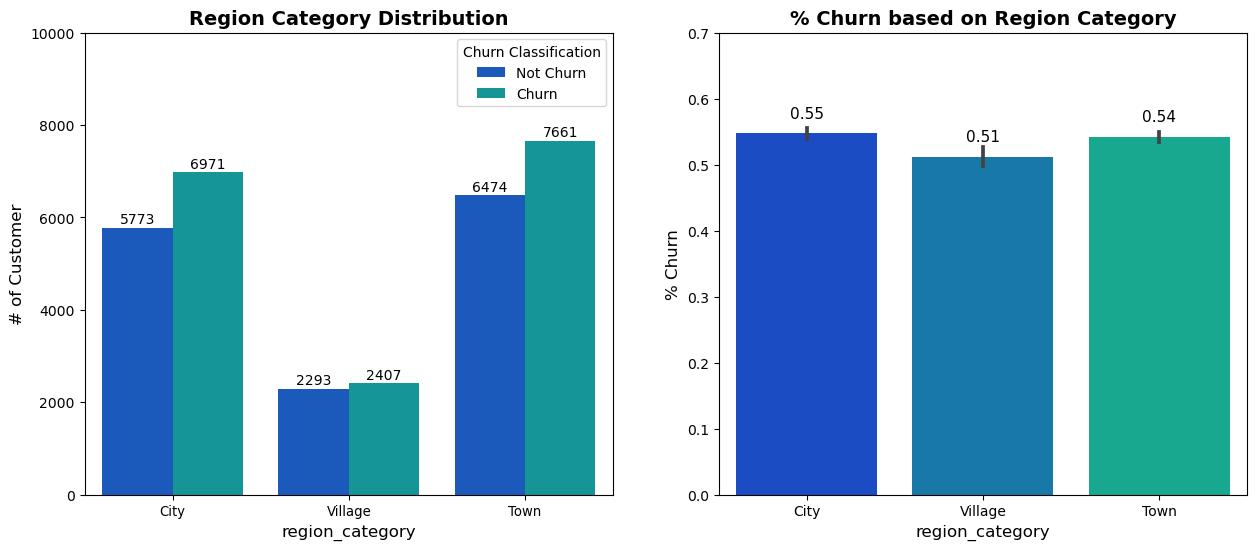

In [34]:
# Membuat Visualisasi distribusi region_category berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'region_category', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Region Category Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("region_category", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+180), ha='center', va='center',fontsize = 10) 
ax[0].set_ylim(0,10000)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'region_category', y = 'churn_risk_score', data = df_eda, palette = 'winter',ax=ax[1])
ax[1].set_xlabel("region_category", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Region Category', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.7)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* yang berasal dari kota (44.8%)
- *Customer* yang paling banyak *churn* adalah *customer* yang tinggal di kota. Kemungkinan banyak pada kelas kota karena *customer* paling banyak juga pada kelas ini
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *region*, maka tidak ada perbedaan signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `region_category` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [35]:
# Menghitung distribusi membership_category
df_eda['membership_category'].value_counts()

Basic Membership       7727
No Membership          7693
Gold Membership        6799
Silver Membership      5991
Premium Membership     4458
Platinum Membership    4342
Name: membership_category, dtype: int64

In [36]:
# Distribusi membership_category berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['membership_category']).value_counts(normalize = True)

membership_category  churn_risk_score
Basic Membership     1                   0.967517
                     0                   0.032483
Gold Membership      0                   0.630240
                     1                   0.369760
No Membership        1                   0.970623
                     0                   0.029377
Platinum Membership  0                   1.000000
Premium Membership   0                   1.000000
Silver Membership    0                   0.572525
                     1                   0.427475
Name: churn_risk_score, dtype: float64

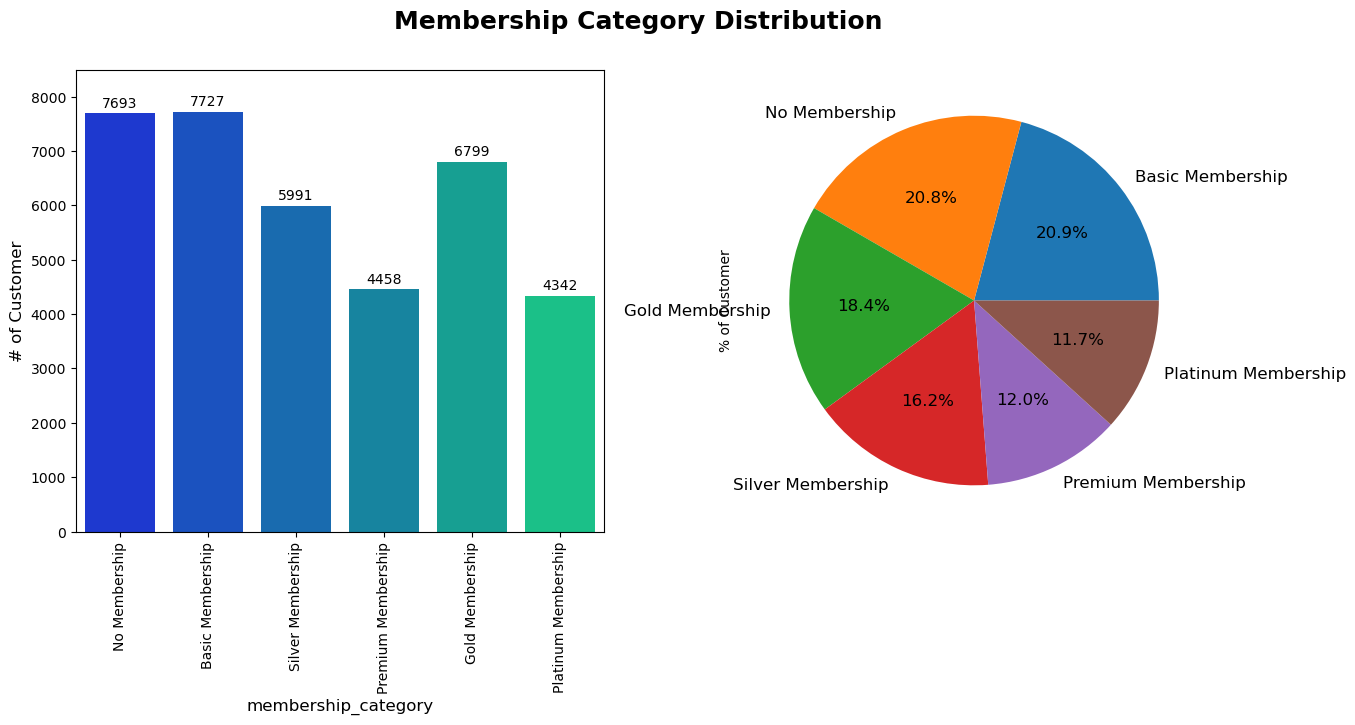

In [37]:
# Visualisasi distribusi membership_category
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='membership_category', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("membership_category", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Membership Category Distribution', fontsize=18, fontweight='bold')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0,8500)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+185), ha='center', va='center',fontsize = 10) 

df_eda['membership_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

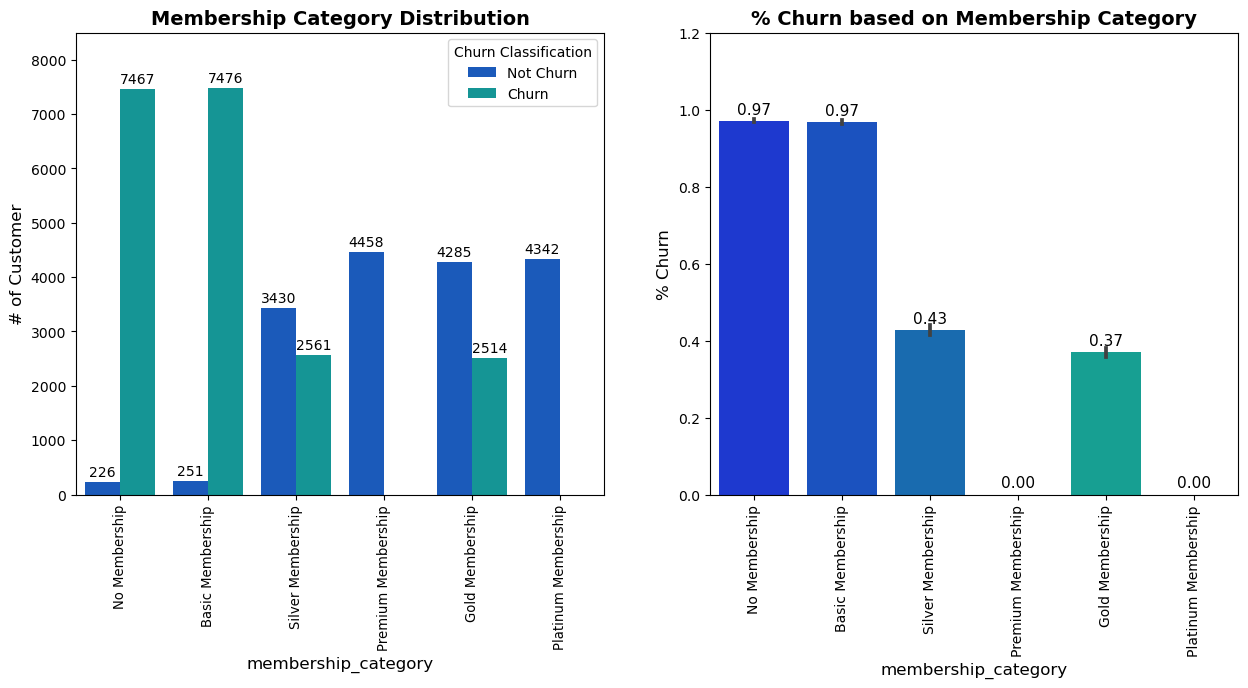

In [38]:
# Membuat Visualisasi distribusi membership_category berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'membership_category', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Membership Category Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("membership_category", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+180), ha='center', va='center',fontsize = 10) 
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0,8500)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'membership_category', y = 'churn_risk_score', data = df_eda, palette = 'winter',ax=ax[1])
ax[1].set_xlabel("membership_category", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Membership Category', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,1.2)
ax[1].tick_params(axis='x', rotation=90)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* dengan *basic membership* (20.9%) dan *no membership* (20.8%)
- *Customer* yang paling banyak *churn* adalah *customer* dengan *no membership*
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *membership*, maka terdapat perbedaan yang signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `membership_category` berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [39]:
# Menghitung distribusi joined_through_referral
df_eda['joined_through_referral'].value_counts()

No     15846
Yes    15722
Name: joined_through_referral, dtype: int64

In [40]:
# Distribusi joined_through_referral berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['joined_through_referral']).value_counts(normalize = True)

joined_through_referral  churn_risk_score
No                       1                   0.521583
                         0                   0.478417
Yes                      1                   0.557563
                         0                   0.442437
Name: churn_risk_score, dtype: float64

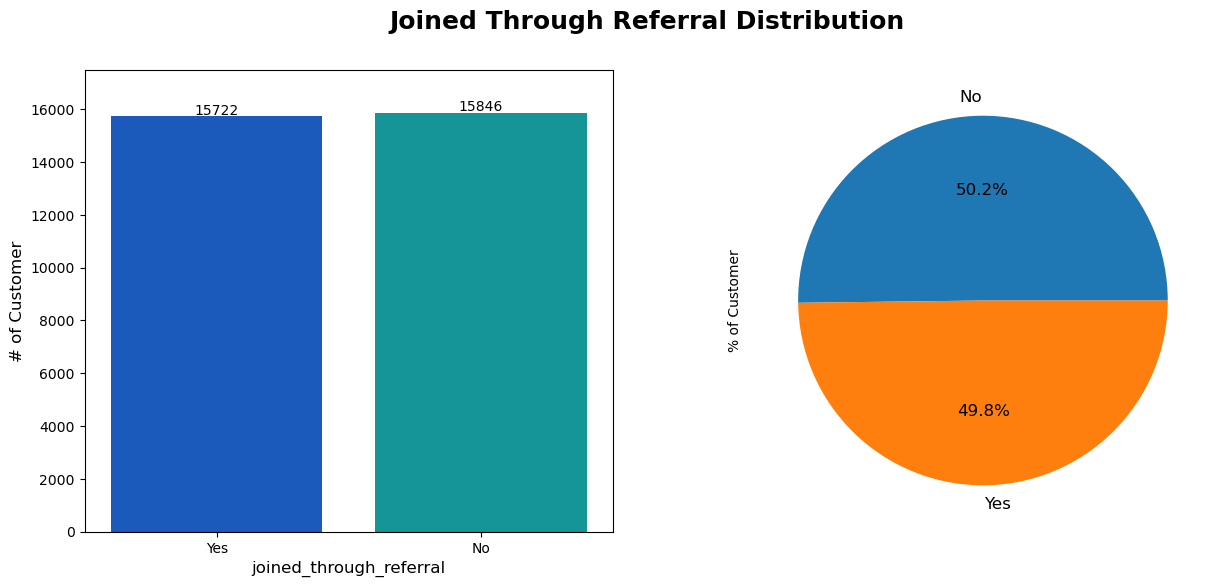

In [41]:
# Visualisasi distribusi joined_through_referral
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='joined_through_referral', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("joined_through_referral", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Joined Through Referral Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,17500)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+235), ha='center', va='center',fontsize = 10) 

df_eda['joined_through_referral'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

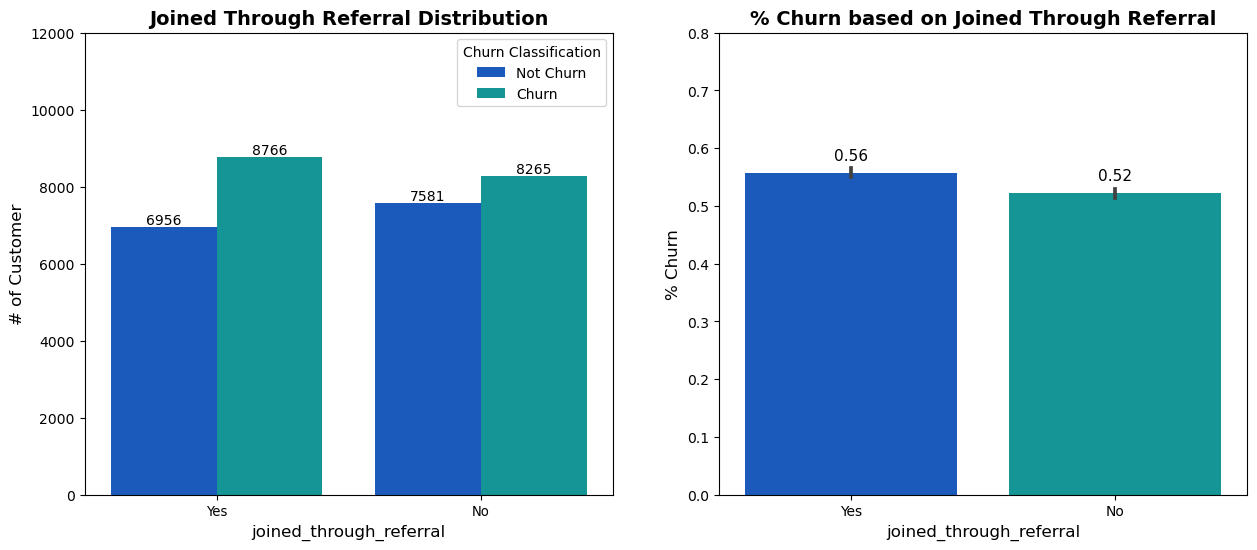

In [42]:
# Membuat Visualisasi distribusi joined_through_referral berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'joined_through_referral', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Joined Through Referral Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("joined_through_referral", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+180), ha='center', va='center',fontsize = 10) 
ax[0].set_ylim(0,12000)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'joined_through_referral', y = 'churn_risk_score', data = df_eda, palette = 'winter',ax=ax[1])
ax[1].set_xlabel("joined_through_referral", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Joined Through Referral', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.8)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* yang tidak menggunakan *referral* (50.2%). Akan tetapi tidak berbeda signifikan, hanya berbeda 0.4% dari *customer* yang menggunakan *referral*
- *Customer* yang paling banyak *churn* adalah *customer* dengan *referral*
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *joined through referral*, maka tidak terdapat perbedaan yang signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `joined_through_referral` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [43]:
# Menghitung distribusi preferred_offer_types
df_eda['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12357
Credit/Debit Card Offers    12281
Without Offers              12084
Name: preferred_offer_types, dtype: int64

In [44]:
#Distribusi preferred_offer_types berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['preferred_offer_types']).value_counts(normalize = True)

preferred_offer_types     churn_risk_score
Credit/Debit Card Offers  1                   0.538311
                          0                   0.461689
Gift Vouchers/Coupons     1                   0.515659
                          0                   0.484341
Without Offers            1                   0.569182
                          0                   0.430818
Name: churn_risk_score, dtype: float64

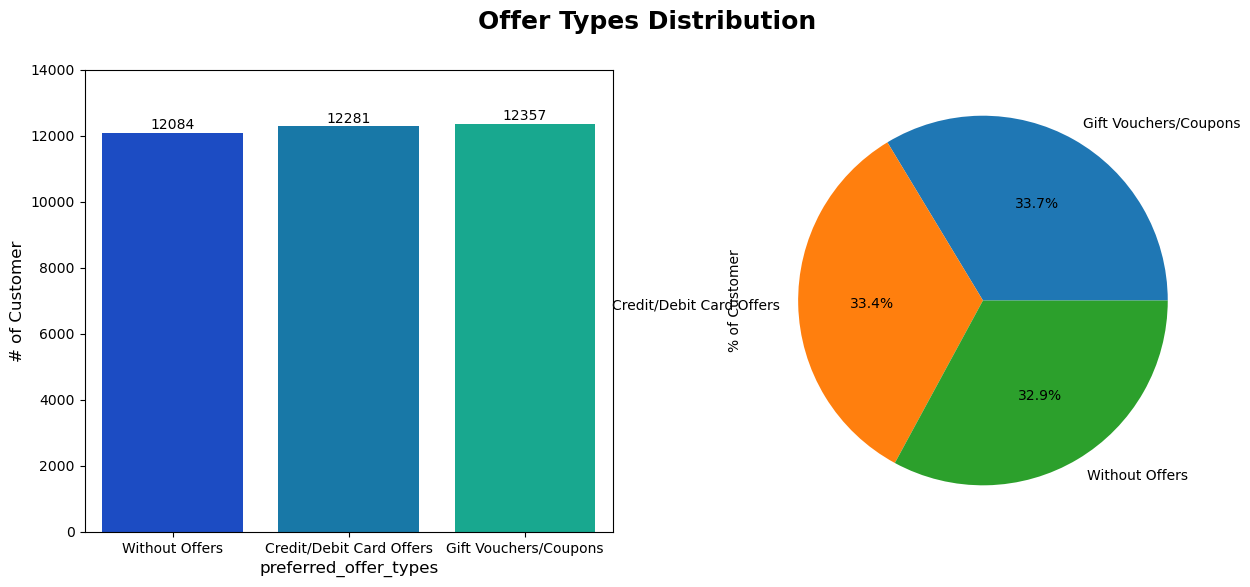

In [45]:
#Visualisasi distribusi preferred_offer_types
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='preferred_offer_types', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("preferred_offer_types", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Offer Types Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,14000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+235), ha='center', va='center',fontsize = 10) 

df_eda['preferred_offer_types'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":10})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

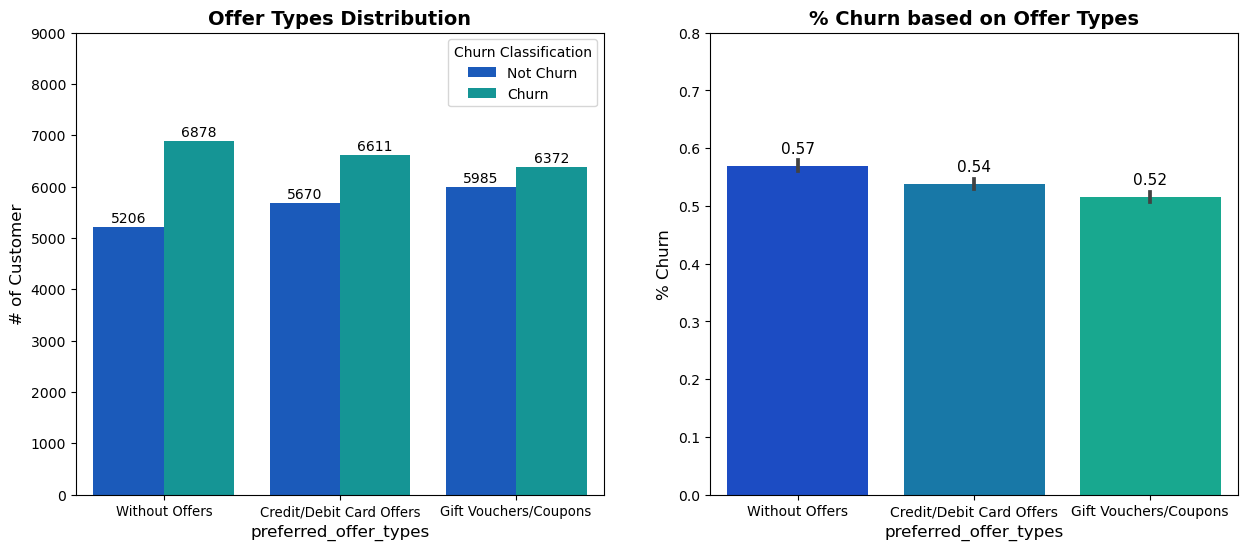

In [46]:
# Membuat Visualisasi distribusi preferred_offer_types berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'preferred_offer_types', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Offer Types Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("preferred_offer_types", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+180), ha='center', va='center',fontsize = 10) 
ax[0].set_ylim(0,9000)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'preferred_offer_types', y = 'churn_risk_score', data = df_eda, palette = 'winter',ax=ax[1])
ax[1].set_xlabel("preferred_offer_types", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Offer Types', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.8)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* menggunakan kupon (33.7%)
- *Customer* yang paling banyak *churn* adalah *customer* yang tidak menggunakan penawaran
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *preferred offer types*, maka tidak terdapat perbedaan yang signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `preferred_offer_types` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [47]:
# Menghitung distribusi used_special_discount
df_eda['used_special_discount'].value_counts()

Yes    20353
No     16657
Name: used_special_discount, dtype: int64

In [48]:
# Distribusi used_special_discount berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['used_special_discount']).value_counts(normalize = True)

used_special_discount  churn_risk_score
No                     1                   0.546677
                       0                   0.453323
Yes                    1                   0.536137
                       0                   0.463863
Name: churn_risk_score, dtype: float64

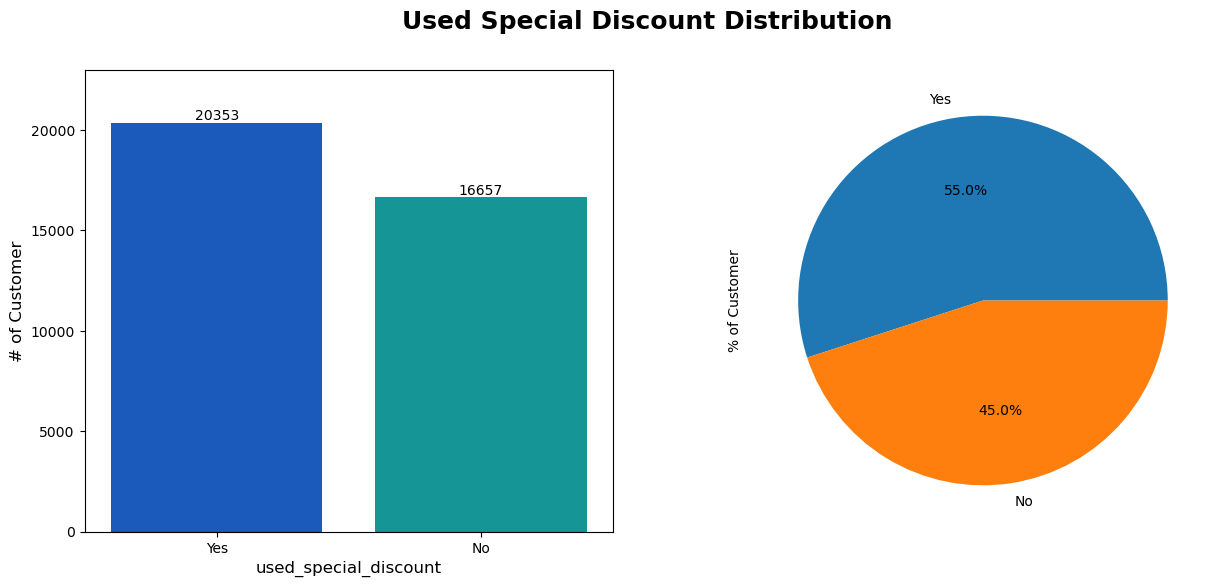

In [49]:
#Visualisasi distribusi used_special_discount
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='used_special_discount', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("used_special_discount", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Used Special Discount Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,23000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+335), ha='center', va='center',fontsize = 10) 

df_eda['used_special_discount'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":10})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

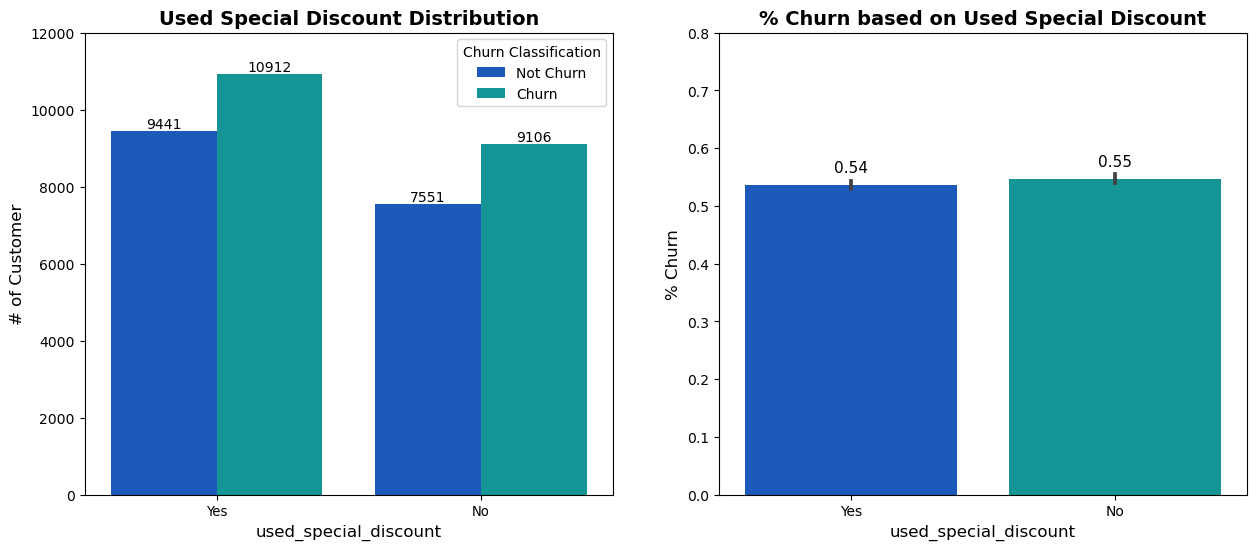

In [50]:
# Membuat Visualisasi distribusi used_special_discount berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'used_special_discount', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Used Special Discount Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("used_special_discount", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+180), ha='center', va='center',fontsize = 10) 
ax[0].set_ylim(0,12000)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'used_special_discount', y = 'churn_risk_score', data = df_eda, palette = 'winter', ax=ax[1])
ax[1].set_xlabel("used_special_discount", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Used Special Discount', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.8)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* yang menggunakan diskon (55%)
- *Customer* yang paling banyak *churn* adalah *customer* yang menggunakan diskon. Kemungkinan banyak pada kelas menggunakan diskon karena *customer* paling banyak juga pada kelas ini
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *used special discount*, maka tidak terdapat perbedaan yang signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `used_special_discount` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [51]:
# Menghitung distribusi offer_application_preference
df_eda['offer_application_preference'].value_counts()

Yes    20449
No     16561
Name: offer_application_preference, dtype: int64

In [52]:
# Distribusi offer_application_preference berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['offer_application_preference']).value_counts(normalize = True)

offer_application_preference  churn_risk_score
No                            1                   0.551295
                              0                   0.448705
Yes                           1                   0.532447
                              0                   0.467553
Name: churn_risk_score, dtype: float64

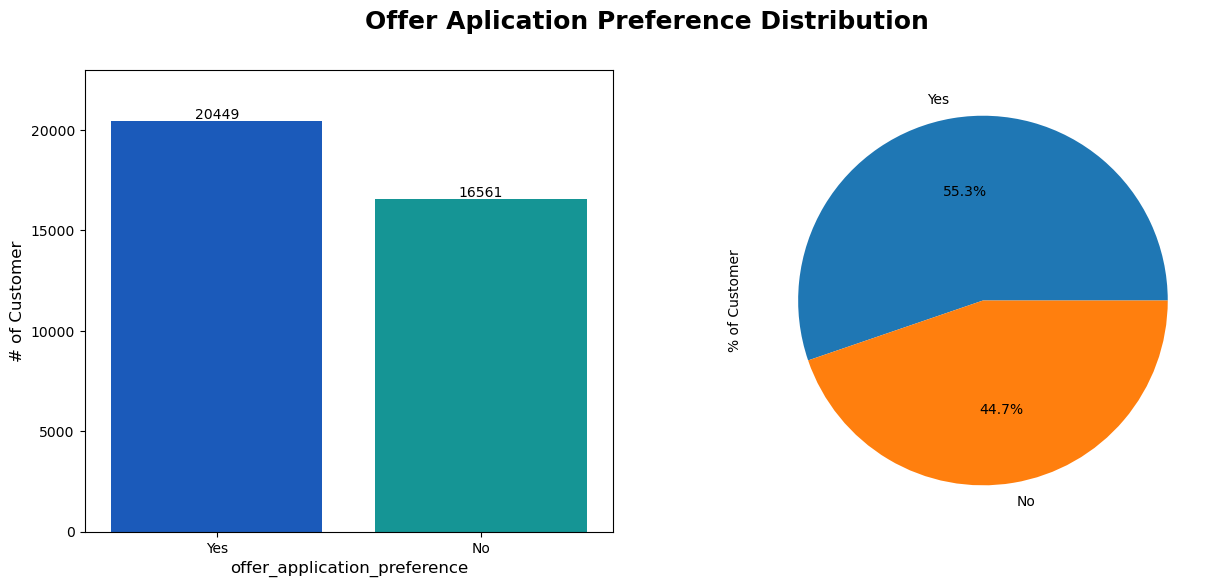

In [53]:
#Visualisasi distribusi offer_application_preference
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='offer_application_preference', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("offer_application_preference", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Offer Aplication Preference Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,23000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+335), ha='center', va='center',fontsize = 10) 

df_eda['offer_application_preference'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":10})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

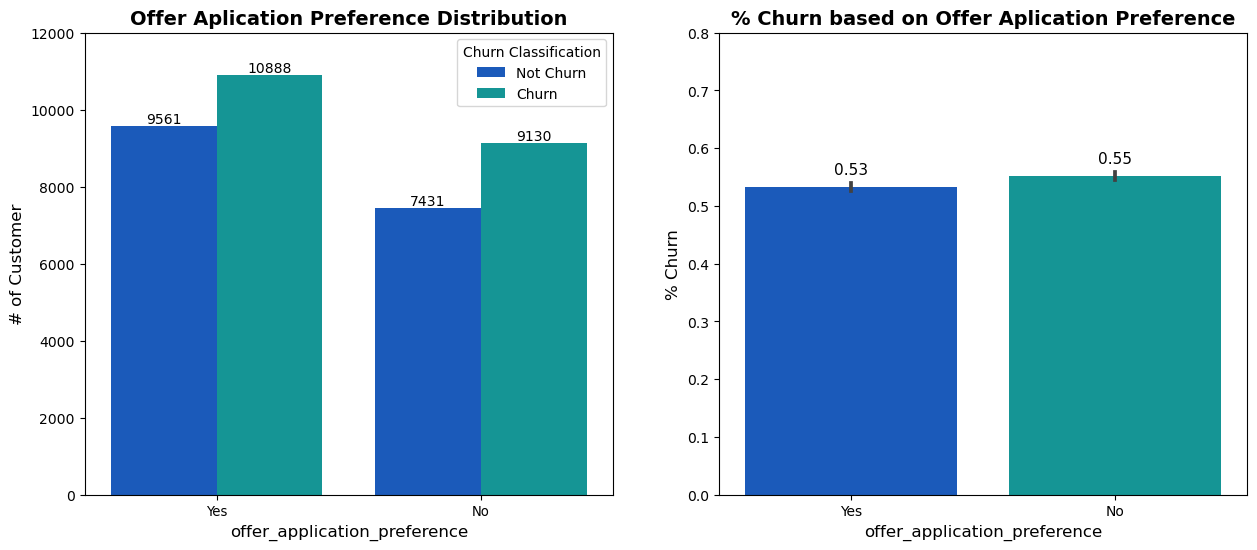

In [54]:
# Membuat Visualisasi distribusi offer_application_preference berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'offer_application_preference', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Offer Aplication Preference Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("offer_application_preference", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+180), ha='center', va='center',fontsize = 10) 
ax[0].set_ylim(0,12000)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'offer_application_preference', y = 'churn_risk_score', data = df_eda, palette = 'winter',ax=ax[1])
ax[1].set_xlabel("offer_application_preference", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Offer Aplication Preference', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.8)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* yang menyukai tawaran (55.3%)
- *Customer* yang paling banyak *churn* adalah *customer* yang menyukai tawaran. Kemungkinan banyak pada kelas menyukai tawaran karena *customer* paling banyak juga pada kelas ini
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas kelas tawaran, maka tidak terdapat perbedaan yang signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `offer_application_preference` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [55]:
# Menghitung distribusi past_complaint
df_eda['past_complaint'].value_counts()

No     18611
Yes    18399
Name: past_complaint, dtype: int64

In [56]:
# Distribusi past_complaint berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['past_complaint']).value_counts(normalize = True)

past_complaint  churn_risk_score
No              1                   0.536403
                0                   0.463597
Yes             1                   0.545410
                0                   0.454590
Name: churn_risk_score, dtype: float64

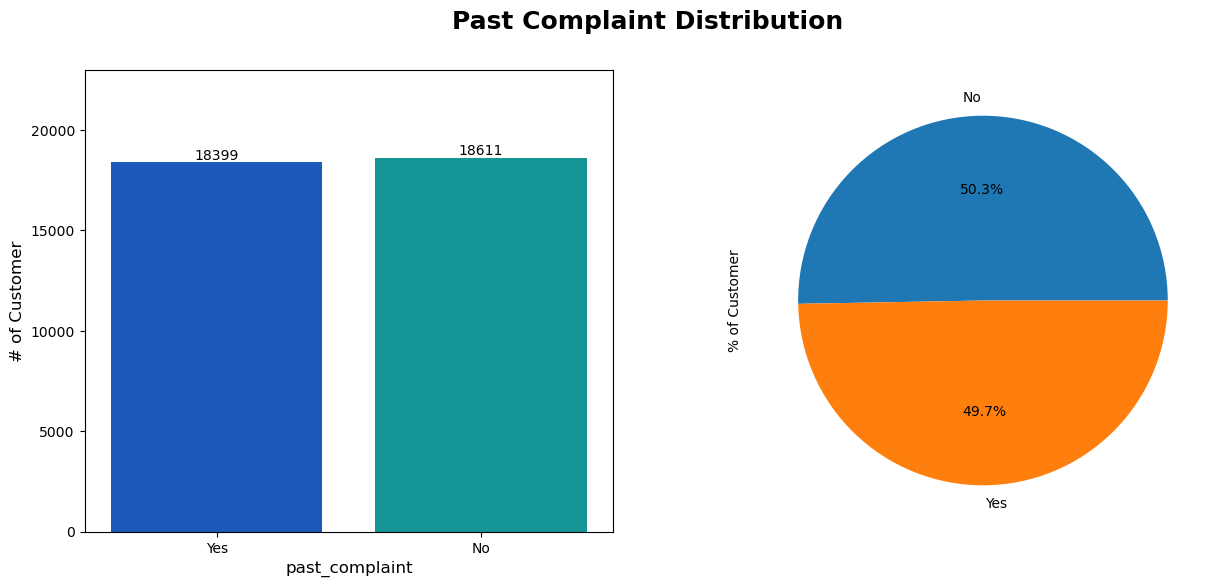

In [57]:
#Visualisasi distribusi past_complaint
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='past_complaint', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("past_complaint", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Past Complaint Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,23000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+335), ha='center', va='center',fontsize = 10) 

df_eda['past_complaint'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":10})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

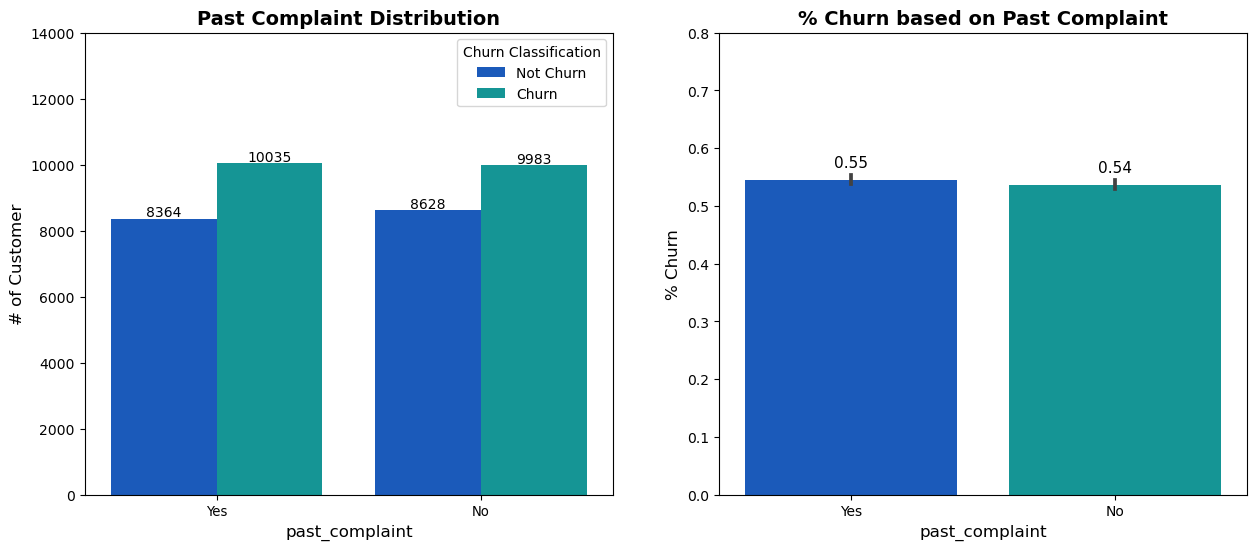

In [58]:
# Membuat Visualisasi distribusi past_complaint berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'past_complaint', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Past Complaint Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("past_complaint", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+180), ha='center', va='center',fontsize = 10) 
ax[0].set_ylim(0,14000)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'past_complaint', y = 'churn_risk_score', data = df_eda, palette = 'winter', ax=ax[1])
ax[1].set_xlabel("past_complaint", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Past Complaint', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.8)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* yang tidak *complaint* (50.3%). Akan tetapi tidak berbeda signifikan, hanya berbeda 0.6% dari *customer* yang *complaint*
- *Customer* yang paling banyak *churn* adalah *customer* yang *complaint*
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *past complaint*, maka tidak terdapat perbedaan yang signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `past_complaint` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [59]:
# Menghitung distribusi complaint_status
df_eda['complaint_status'].value_counts()

Not Applicable              18611
Unsolved                     4647
Solved                       4622
Solved in Follow-up          4579
No Information Available     4551
Name: complaint_status, dtype: int64

In [60]:
# Distribusi complaint_status berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['complaint_status']).value_counts(normalize = True)

complaint_status          churn_risk_score
No Information Available  1                   0.549110
                          0                   0.450890
Not Applicable            1                   0.536403
                          0                   0.463597
Solved                    1                   0.546949
                          0                   0.453051
Solved in Follow-up       1                   0.549465
                          0                   0.450535
Unsolved                  1                   0.536260
                          0                   0.463740
Name: churn_risk_score, dtype: float64

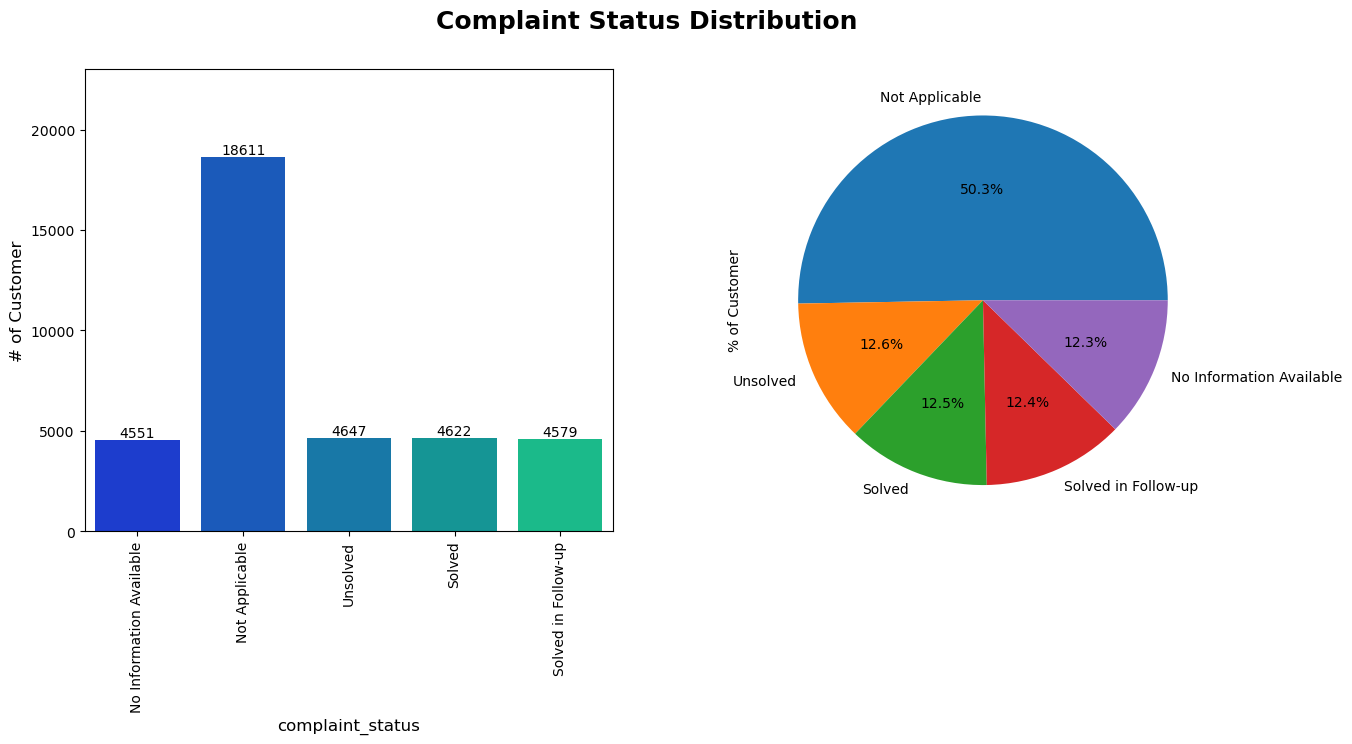

In [61]:
#Visualisasi distribusi complaint_status
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='complaint_status', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("complaint_status", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Complaint Status Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,23000)
ax[0].tick_params(axis='x', rotation=90)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+335), ha='center', va='center',fontsize = 10) 

df_eda['complaint_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":10})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

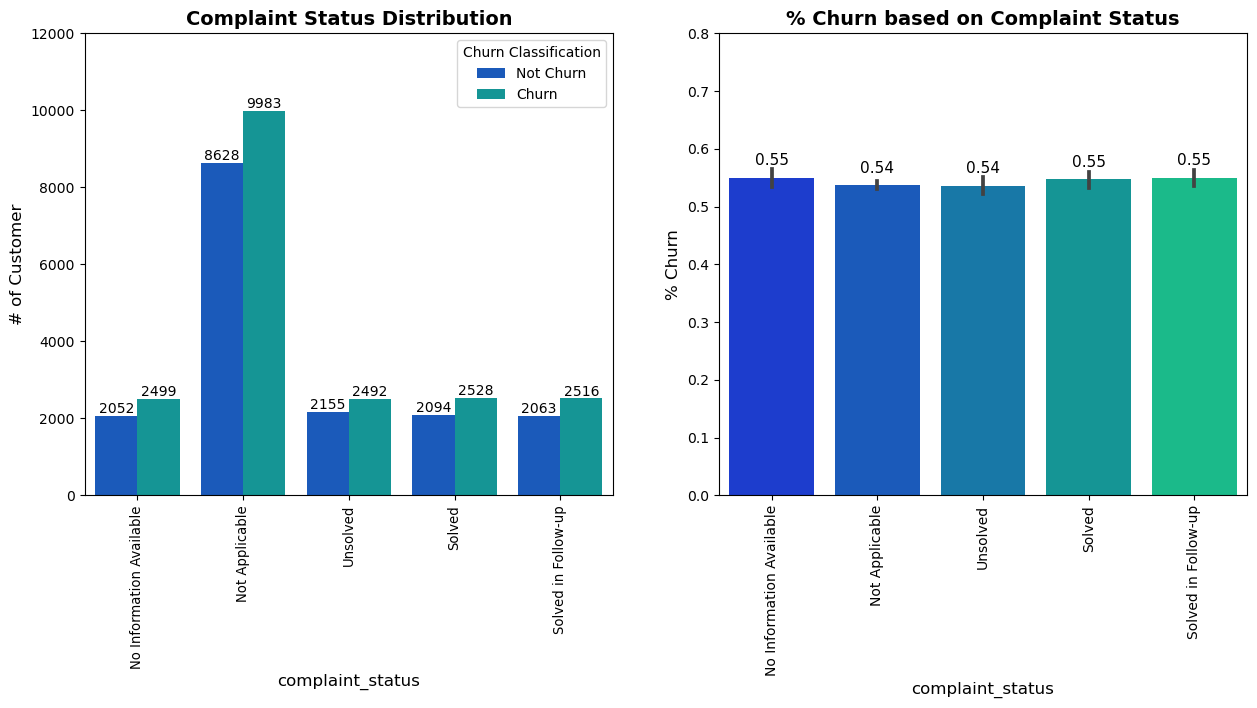

In [62]:
# Membuat Visualisasi distribusi complaint_status berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'complaint_status', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Complaint Status Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("complaint_status", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+180), ha='center', va='center',fontsize = 10)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0,12000)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'complaint_status', y = 'churn_risk_score', data = df_eda, palette = 'winter',ax=ax[1])
ax[1].set_xlabel("complaint_status", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Complaint Status', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.8)
ax[1].tick_params(axis='x', rotation=90)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* yang *complaint* nya tidak dapat diaplikasikan/direalisasikan (50.3%)
- *Customer* yang paling banyak *churn* adalah *customer* yang *complaint* nya tidak dapat diaplikasikan/direalisasikan. Kemungkinan banyak pada kelas ini karena *customer* paling banyak juga pada kelas tersebut
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *complaint status*, maka tidak terdapat perbedaan yang signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `complaint_status` tidak berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [63]:
# Menghitung distribusi feedback
df_eda['feedback'].value_counts()

Poor Product Quality        6353
No reason specified         6295
Too many ads                6282
Poor Website                6273
Poor Customer Service       6255
Reasonable Price            1417
User Friendly Website       1393
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

In [64]:
# Distribusi feedback berdasarkan klasifikasi churn_risk_score
df_eda['churn_risk_score'].groupby(df_eda['feedback']).value_counts(normalize = True)

feedback                  churn_risk_score
No reason specified       1                   0.634631
                          0                   0.365369
Poor Customer Service     1                   0.638369
                          0                   0.361631
Poor Product Quality      1                   0.649614
                          0                   0.350386
Poor Website              1                   0.631915
                          0                   0.368085
Products always in Stock  0                   1.000000
Quality Customer Care     0                   1.000000
Reasonable Price          0                   1.000000
Too many ads              1                   0.627030
                          0                   0.372970
User Friendly Website     0                   1.000000
Name: churn_risk_score, dtype: float64

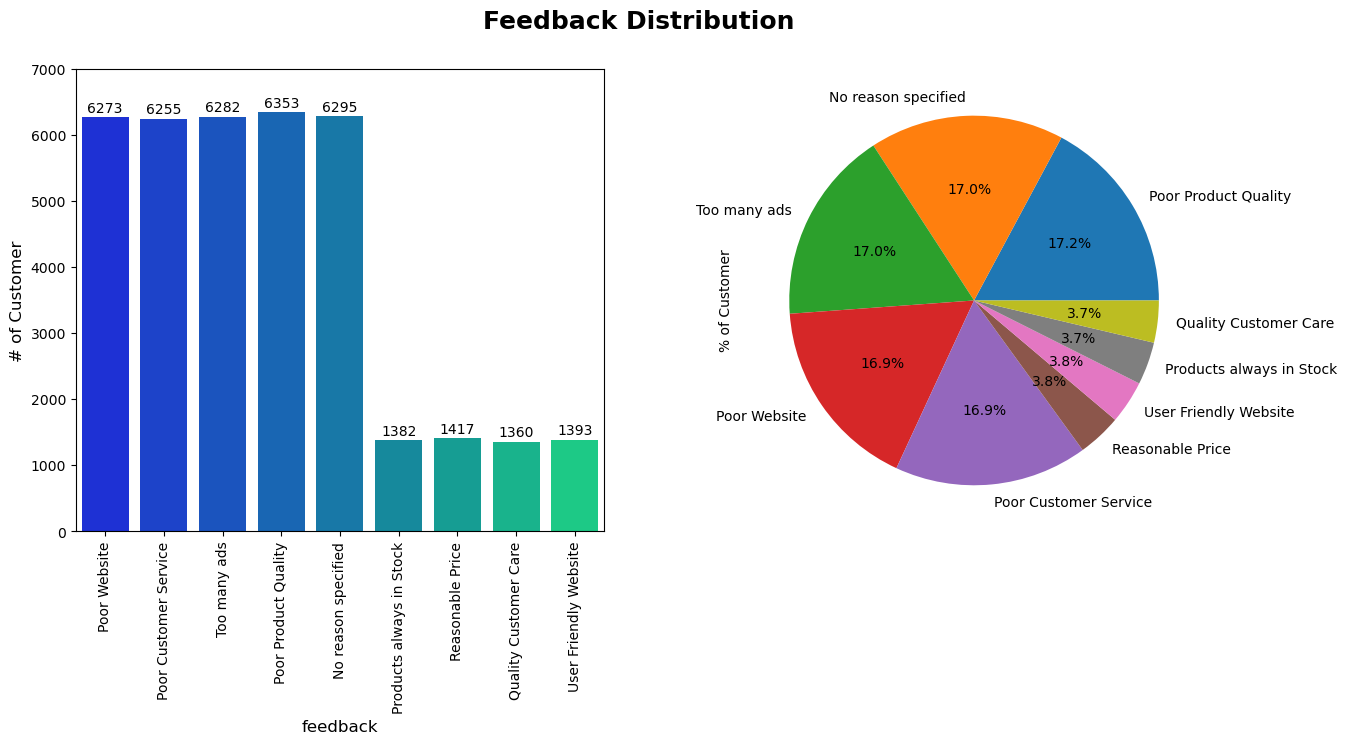

In [65]:
# Visualisasi distribusi feedback
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='feedback', data=df_eda, palette='winter', ax=ax[0])
ax[0].set_xlabel("feedback", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
fig.suptitle('Feedback Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,7000)
ax[0].tick_params(axis='x', rotation=90)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+135), ha='center', va='center',fontsize = 10) 

df_eda['feedback'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":10})
ax[1].set_ylabel("% of Customer", fontsize= 10)
plt.show()

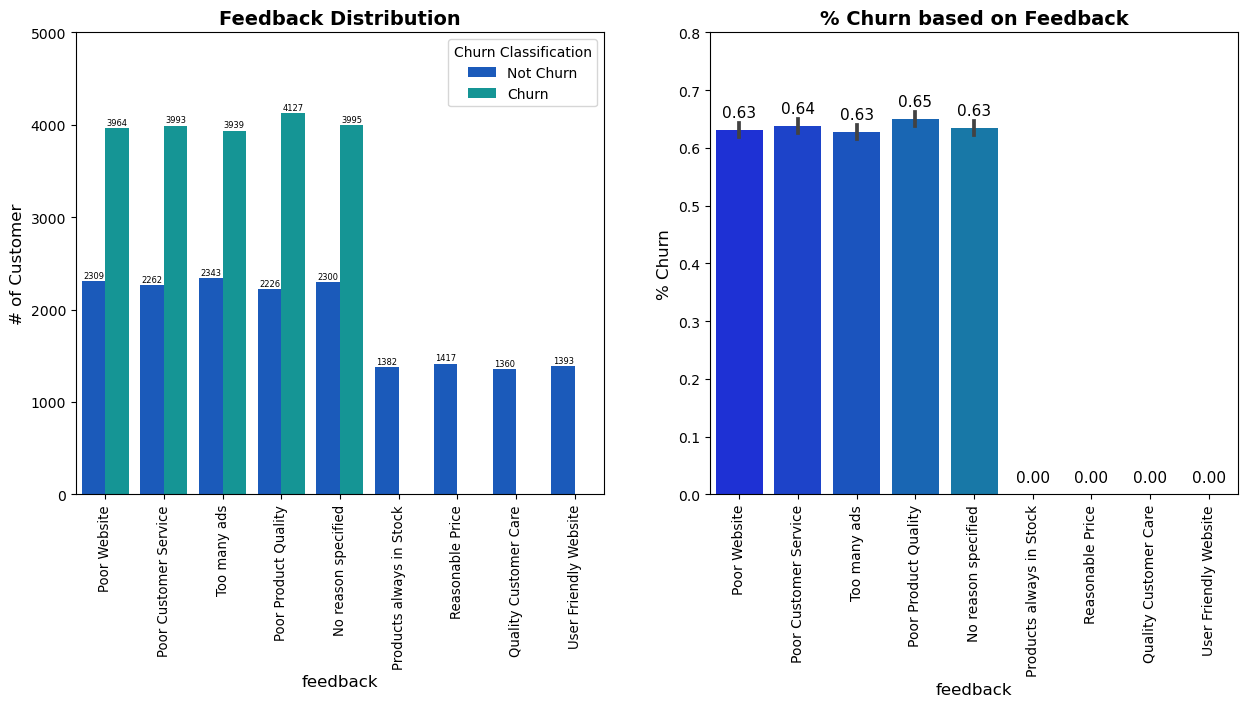

In [66]:
# Membuat Visualisasi distribusi feedback berdasarkan Churn
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(data = df_eda, x = 'feedback', hue="churn_risk_score", palette = 'winter', ax=ax[0])
ax[0].set_title('Feedback Distribution', fontsize=14, fontweight='bold',)
ax[0].set_xlabel("feedback", fontsize= 12)
ax[0].set_ylabel("# of Customer", fontsize= 12)
ax[0].tick_params(axis="x", labelsize= 9.5)
ax[0].legend(fontsize=10,title='Churn Classification', loc='upper right', labels=['Not Churn', 'Churn'])
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+60), ha='center', va='center',fontsize = 6)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0,5000)

#Visualisasi % Churn dari setiap kelas
sns.barplot(x = 'feedback', y = 'churn_risk_score', data = df_eda, palette = 'winter',ax=ax[1])
ax[1].set_xlabel("feedback", fontsize= 12)
ax[1].set_ylabel("% Churn", fontsize= 12)
ax[1].set_title('% Churn based on Feedback', fontsize=14, fontweight='bold')
ax[1].set_ylim(0,0.8)
ax[1].tick_params(axis='x', rotation=90)
for p in ax[1].patches:
    ax[1].annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.03), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- *Customer* paling banyak adalah *customer* yang memberikan *feedback* buruk (*too many ads*, *poor product quality*) dan yang tidak memberikan *feedback*. 3 kelas tersebut memiliki persentase proporsi 17%
- *Customer* yang paling banyak *churn* adalah *customer* yang memberikan *feedback poor product quality*. Kemungkinan banyak pada kelas ini karena *customer* paling banyak juga pada kelas *poor product quality*
- Akan tetapi jika dilihat dari persentase *churn* pada setiap kelas *feedback*, maka terdapat perbedaan yang signifikan
- Dari 3 informasi di-atas dapat disimpulkan bahwa **kemungkinan *feature* `feedback` berpengaruh terhadap klasifikasi *churn* *customer* (Hal ini akan saya *crosscheck* pada poin *feature engineering* karena poin EDA hanya pendukung pengambilan keputusan)**

In [67]:
# Definisi variabel X dan y
X = df.drop(['churn_risk_score'], axis=1)
y = df['churn_risk_score']

In [68]:
# Menampilkan X
X

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,1900-01-01 22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,1900-01-01 15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,1900-01-01 20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,1900-01-01 14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,1900-01-01 04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,1900-01-01 09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,1900-01-01 02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,1900-01-01 17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,1900-01-01 17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website


In [69]:
# Menampilkan y
y

0        1
1        1
2        0
3        1
4        0
        ..
37005    0
37006    0
37007    0
37008    0
37009    1
Name: churn_risk_score, Length: 37010, dtype: int64

In [70]:
# Fungsi Extract date, month, year dan jam

def extraction_feature(df):
    df['year_joining_date'] = df['joining_date'].dt.year
    df['month_joining_date'] = df['joining_date'].dt.month
    df['date_joining_date'] = df['joining_date'].dt.dayofweek
    df['hour_last_visit_time'] = df['last_visit_time'].dt.hour

In [71]:
# Ekstraksi Feature pada X
extraction_feature(X)

In [72]:
# Menampilkan X
X

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,1900-01-01 22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,2017,4,2,22
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,1900-01-01 15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,2017,3,4,15
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,1900-01-01 20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,2017,2,5,20
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,1900-01-01 14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,2015,12,2,14
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,1900-01-01 04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,2015,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,1900-01-01 09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,2015,3,3,9
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,1900-01-01 02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,2017,1,6,2
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,1900-01-01 17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,2015,7,5,17
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,1900-01-01 17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,2016,5,2,17


In [73]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=10)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26739, 25)
Val Size :  (4719, 25)
Test Size :  (5552, 25)


In [74]:
# print X_train
X_train

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
34181,9a2281bdc69c90a6,26,M,NaN,Basic Membership,2015-08-11,Yes,Without Offers,NaN,Fiber_Optic,1900-01-01 10:37:51,12,696.03,35408.66,7.0,78.539406,Yes,No,Yes,Solved,Poor Customer Service,2015,8,1,10
36000,a51de6be90b6a5d6,47,M,City,No Membership,2017-10-24,Yes,Credit/Debit Card Offers,Both,Wi-Fi,1900-01-01 04:42:23,3,437.41,14274.37,26.0,191.365295,No,Yes,No,Not Applicable,No reason specified,2017,10,1,4
1348,8eb9f063101f8833,57,F,City,Silver Membership,2016-04-13,NaN,Credit/Debit Card Offers,Smartphone,Fiber_Optic,1900-01-01 11:47:08,23,61.58,6524.26,19.0,704.120000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,2016,4,2,11
18134,900737016925a1fe,58,M,Village,No Membership,2015-11-13,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,1900-01-01 23:32:27,22,34.69,43297.32,27.0,0.000000,No,Yes,Yes,Unsolved,Too many ads,2015,11,4,23
29710,92f27e76650568c5,54,F,Town,Basic Membership,2016-01-15,No,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,1900-01-01 21:23:23,10,37.79,48927.66,17.0,857.616247,Yes,No,No,Not Applicable,No reason specified,2016,1,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34356,b961655ad9393ce7,42,F,City,Silver Membership,2015-07-26,No,Without Offers,NaN,Mobile_Data,1900-01-01 23:40:30,10,279.39,13819.06,20.0,789.040000,No,Yes,Yes,Unsolved,Poor Website,2015,7,6,23
23206,b662a389d610f0cd,51,F,NaN,Platinum Membership,2017-04-19,NaN,Gift Vouchers/Coupons,Smartphone,Mobile_Data,1900-01-01 02:14:49,6,172.55,8665.62,28.0,727.050000,No,Yes,No,Not Applicable,Poor Product Quality,2017,4,2,2
3889,b8a5873b51c088ee,46,F,City,Silver Membership,2017-01-04,NaN,Without Offers,Desktop,Fiber_Optic,1900-01-01 20:12:28,5,245.12,3089.21,29.0,0.000000,Yes,Yes,No,Not Applicable,Poor Website,2017,1,2,20
16900,90141cea5204941d,19,M,NaN,Basic Membership,2015-02-04,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,1900-01-01 07:10:16,19,0.00,48544.79,22.0,1088.356521,Yes,No,No,Not Applicable,Poor Customer Service,2015,2,2,7


In [75]:
# Definisi fungsi untuk membuat boxplot dan histogram dari setiap feature numeric

def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

In [76]:
# Definisi kolom yang akan dicek outliernya
check_outlier_columns =  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

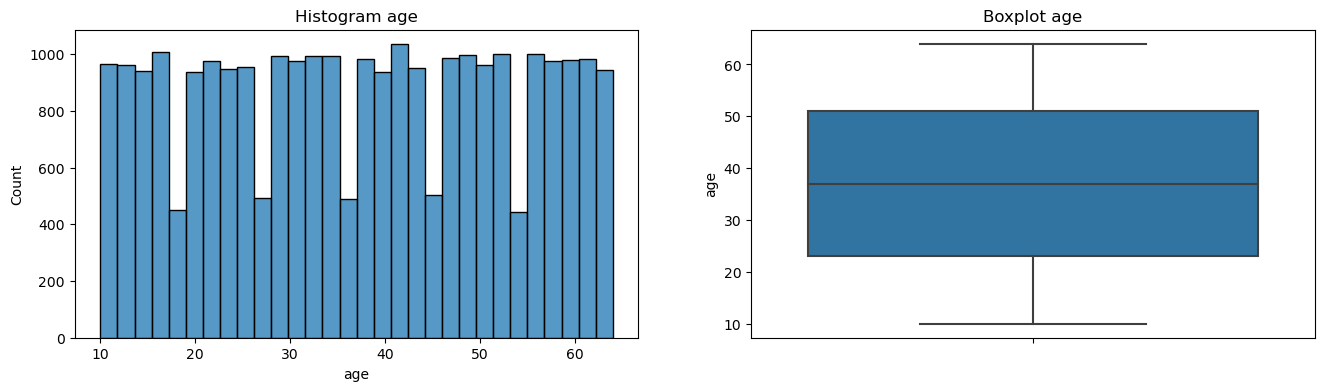

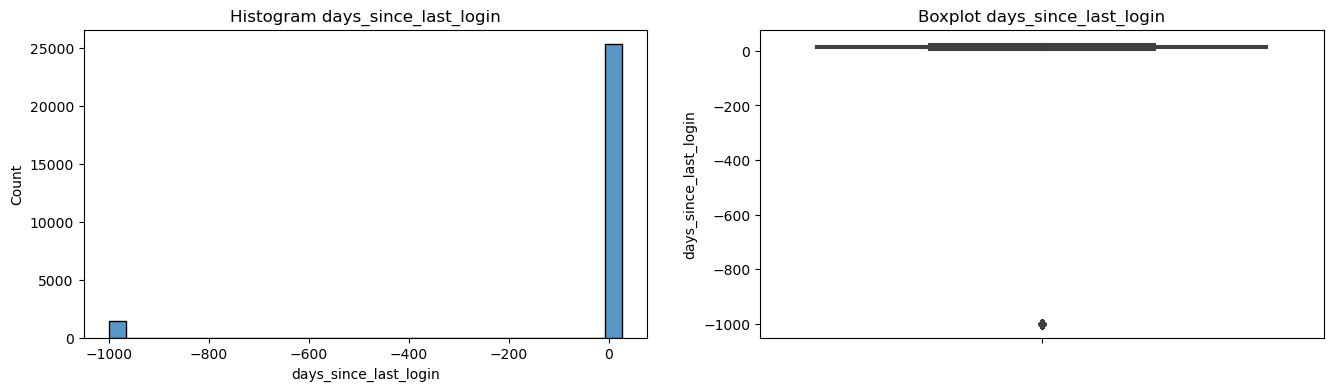

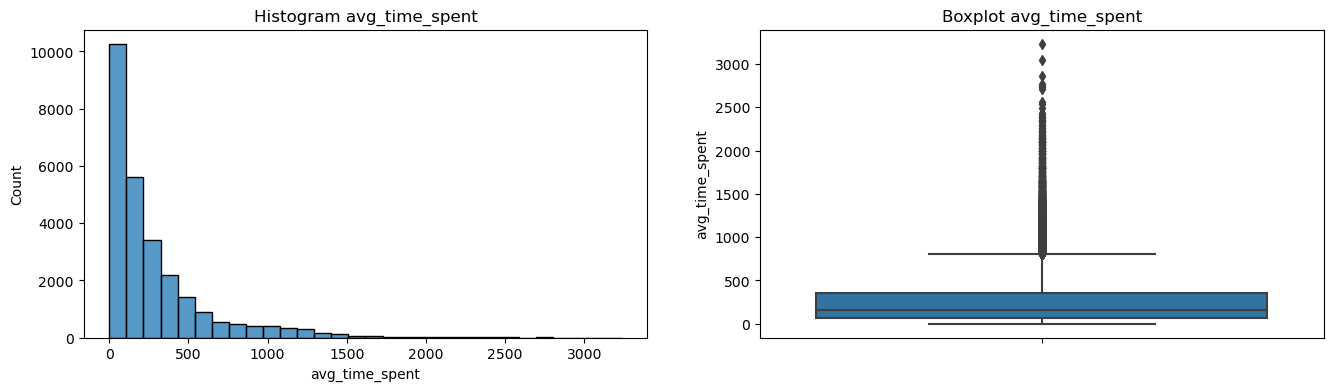

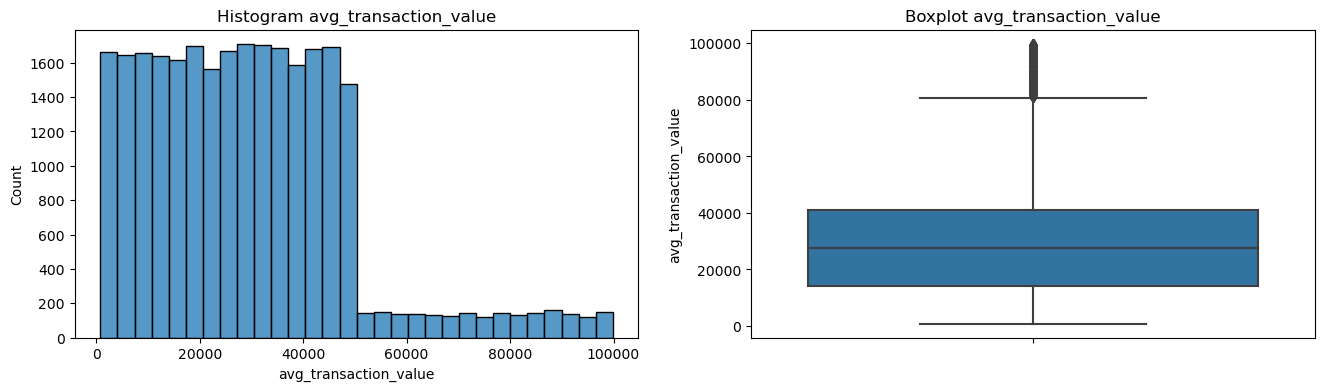

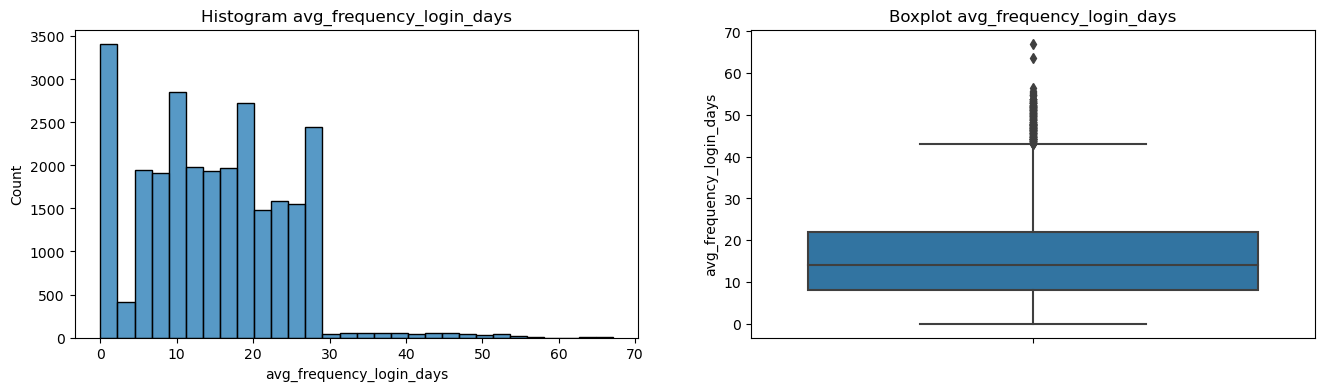

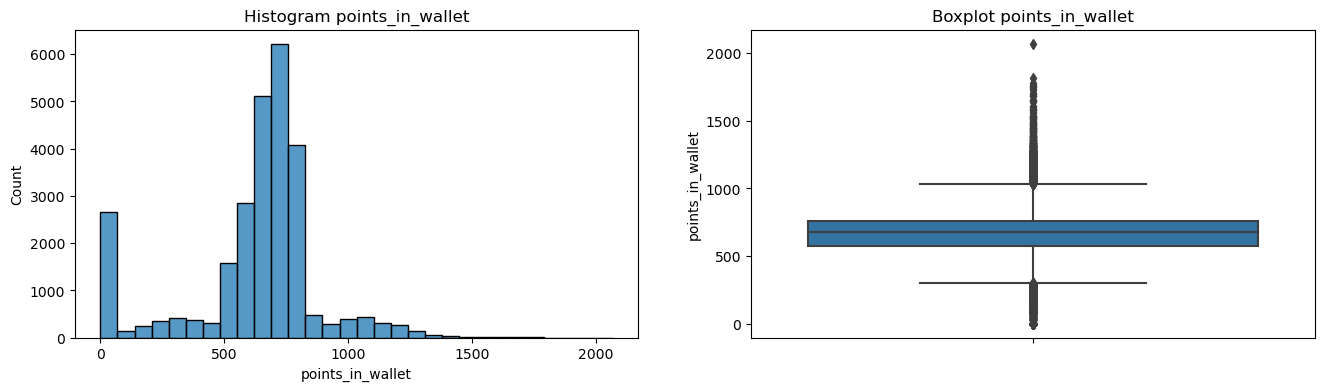

In [77]:
# Pengecekan distribusi dan skew dari setiap feature numeric
for i in check_outlier_columns :
    diagnostic_plots(X_train, i)

In [78]:
# Fungsi Pengecekan Outlier
def outliers_check(df,variable):
    #Cek skew feature
    global interq
    global lower_boundary
    global upper_boundary
    skew = df[variable].skew()
    if (df[variable].skew() > 0.5 and df[variable].skew() <= 1) or (df[variable].skew() < -0.5 and df[variable].skew() >= -1):
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (interq * 1.5)
        outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    elif df[variable].skew() >= 1 or df[variable].skew() <= -1:
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 3)
        upper_boundary = df[variable].quantile(0.75) + (interq * 3)
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]
    else:
        lower_boundary = df[variable].mean() - (3 * df[variable].std())
        upper_boundary = df[variable].mean() + (3 * df[variable].std())
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary, skew

In [79]:
# Pengecekan persentase outlier dari semua feature numerical
for i in check_outlier_columns:
    print(i)
    print('Jumlah Outlier Feature ', i,'adalah ' ,round((len(outliers_check(X_train, i)[0])),2))
    print('Persentase Outlier Feature ', i,'adalah ' ,round((len(outliers_check(X_train, i)[0])/len(X_train)*100),2))
    print('Skew Feature ', i,'adalah ' ,round((outliers_check(X_train, i)[3]),2))
    print('Lower Boundary Feature ', i,'adalah ' ,round((outliers_check(X_train, i)[1]),2))
    print('Upper Boundary Feature ', i,'adalah ' ,round((outliers_check(X_train, i)[2]),2))
    print('---')

age
Jumlah Outlier Feature  age adalah  0
Persentase Outlier Feature  age adalah  0.0
Skew Feature  age adalah  -0.01
Lower Boundary Feature  age adalah  -10.37
Upper Boundary Feature  age adalah  84.54
---
days_since_last_login
Jumlah Outlier Feature  days_since_last_login adalah  1457
Persentase Outlier Feature  days_since_last_login adalah  5.45
Skew Feature  days_since_last_login adalah  -3.92
Lower Boundary Feature  days_since_last_login adalah  -16.0
Upper Boundary Feature  days_since_last_login adalah  40.0
---
avg_time_spent
Jumlah Outlier Feature  avg_time_spent adalah  623
Persentase Outlier Feature  avg_time_spent adalah  2.33
Skew Feature  avg_time_spent adalah  2.25
Lower Boundary Feature  avg_time_spent adalah  -827.51
Upper Boundary Feature  avg_time_spent adalah  1242.92
---
avg_transaction_value
Jumlah Outlier Feature  avg_transaction_value adalah  0
Persentase Outlier Feature  avg_transaction_value adalah  0.0
Skew Feature  avg_transaction_value adalah  1.01
Lower Bou

In [80]:
# Check statistik deskriptif untuk outlier 

outlier_last_login = outliers_check(X_train,'days_since_last_login')[0]
outlier_last_login.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,1457.000000,1457.0,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,37.459163,-999.0,271.841681,29092.112553,14.554537,623.179689,2015.993823,6.509266,2.912148,11.787920
std,16.148304,0.0,315.548047,19428.983892,9.334984,258.938748,0.824981,3.398461,2.032489,6.963773
min,10.000000,-999.0,0.000000,895.420000,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,23.000000,-999.0,59.450000,14245.330000,8.000000,565.050000,2015.000000,4.000000,1.000000,6.000000
50%,38.000000,-999.0,162.610000,27191.290000,14.000000,674.430000,2016.000000,7.000000,3.000000,12.000000
75%,52.000000,-999.0,344.450000,40301.750000,22.000000,752.850000,2017.000000,9.000000,5.000000,18.000000
max,64.000000,-999.0,2341.451934,99318.230000,49.855141,1536.454879,2017.000000,12.000000,6.000000,23.000000


In [81]:
# Definisi index yang akan di-drop
drop_last_login = outlier_last_login.index.to_list()

In [82]:
# Drop pada X_train dan y_train
X_train_clean = X_train.copy()
X_train_clean.drop(axis=0, index=drop_last_login,inplace=True)
y_train.drop(axis=0, index=drop_last_login,inplace=True)

In [83]:
# Check statistik deskriptif untuk outlier 

outlier_time_spent = outliers_check(X_train_clean,'avg_time_spent')[0]
outlier_time_spent.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,36.357751,11.151618,1522.929371,29773.218978,15.435228,621.572369,2016.015332,6.671210,3.035775,11.664395
std,15.907415,5.360630,300.032273,19638.924715,9.446930,277.289337,0.841401,3.453134,1.982108,6.717722
min,10.000000,1.000000,1246.125243,921.910000,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,23.000000,7.000000,1314.255189,15155.325000,8.500000,561.475000,2015.000000,4.000000,1.000000,6.000000
50%,36.000000,11.000000,1419.300000,28217.150000,16.000000,688.400000,2016.000000,7.000000,3.000000,12.000000
75%,50.000000,15.000000,1617.587429,41138.185000,22.000000,758.920000,2017.000000,10.000000,5.000000,17.000000
max,64.000000,26.000000,3235.578521,98559.140000,55.127855,1325.481219,2017.000000,12.000000,6.000000,23.000000


In [84]:
# Definisi index yang akan di-drop
drop_time_spent = outlier_time_spent.index.to_list()

In [85]:
# Drop pada X_train dan y_train
X_train_clean.drop(axis=0, index=drop_time_spent,inplace=True)
y_train.drop(axis=0, index=drop_time_spent,inplace=True)

In [86]:
# Check statistik deskriptif untuk outlier 

outlier_freq_login = outliers_check(X_train_clean,'avg_frequency_login_days')[0]
outlier_freq_login.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,36.178744,12.521739,252.799975,26652.568551,48.590446,618.610721,2016.033816,6.425121,2.850242,11.149758
std,15.917931,5.949485,273.281369,15145.896033,3.767829,285.824524,0.826630,3.354890,1.951297,7.061573
min,10.000000,1.000000,0.000000,1232.020000,43.077141,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,22.000000,8.000000,62.095000,13570.975000,45.634228,573.350000,2015.000000,4.000000,1.000000,5.000000
50%,35.000000,12.000000,147.560000,27114.640000,47.988852,670.110000,2016.000000,6.000000,3.000000,11.000000
75%,50.500000,17.000000,330.075000,37916.155000,51.455171,761.695000,2017.000000,9.000000,4.000000,17.000000
max,64.000000,26.000000,1244.758361,75333.510000,67.062422,1755.455512,2017.000000,12.000000,6.000000,23.000000


In [87]:
# Check statistik deskriptif untuk outlier 

outlier_point_wallet = outliers_check(X_train_clean,'points_in_wallet')[0]
outlier_point_wallet.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000,4445.000000
mean,36.934983,12.766929,249.774974,29462.151669,14.799802,350.349256,2016.042520,6.581327,3.033971,11.667042
std,15.847185,5.596035,263.046282,19660.206119,9.335090,507.024026,0.821483,3.444685,1.989162,6.974514
min,10.000000,1.000000,0.000000,823.680000,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,23.000000,9.000000,58.760000,14254.730000,8.000000,0.000000,2015.000000,4.000000,1.000000,6.000000
50%,37.000000,13.000000,158.970000,27894.040000,15.000000,0.000000,2016.000000,7.000000,3.000000,12.000000
75%,51.000000,17.000000,338.970000,41100.110000,22.000000,1041.742672,2017.000000,10.000000,5.000000,18.000000
max,64.000000,26.000000,1243.636759,99861.470000,55.652396,2069.069761,2017.000000,12.000000,6.000000,23.000000


In [88]:
# Definisi feature yang disensor
winsorizer_columns = ['avg_frequency_login_days','points_in_wallet']

In [89]:
#Definisi Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both',
                          fold=1.5,variables=winsorizer_columns)

In [90]:
# Fit dan Transform X_train dan X_test
X_train_clean = windsoriser.fit_transform(X_train_clean)
X_test =windsoriser.transform(X_test)

In [91]:
# Print Shape sebelum handling dan sesudah handling

print('X_train Shape : ', X_train.shape)
print('X_train_clean Shape : ', X_train_clean.shape)

X_train Shape :  (26739, 25)
X_train_clean Shape :  (24695, 25)


In [92]:
# Pembuatan fungsi cek outlier X_val berdasarkan X_train

def check_outlier_based_xtrain(df,variable) :
    lower_boundary = outliers_check(X_train,variable)[1]
    upper_boundary = outliers_check(X_train,variable)[2]
    outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    
    return outlier, lower_boundary, upper_boundary


In [93]:
#Pengecekan persentase outlier dari semua feature numerical
for i in check_outlier_columns:
    print(i)
    print('Jumlah Outlier Feature ', i,'adalah ' ,round((len(check_outlier_based_xtrain(X_val, i)[0])),2))
    print('Persentase Outlier Feature ', i,'adalah ' ,round((len(check_outlier_based_xtrain(X_val, i)[0])/len(X_val)*100),2))
    print('---')

age
Jumlah Outlier Feature  age adalah  0
Persentase Outlier Feature  age adalah  0.0
---
days_since_last_login
Jumlah Outlier Feature  days_since_last_login adalah  240
Persentase Outlier Feature  days_since_last_login adalah  5.09
---
avg_time_spent
Jumlah Outlier Feature  avg_time_spent adalah  116
Persentase Outlier Feature  avg_time_spent adalah  2.46
---
avg_transaction_value
Jumlah Outlier Feature  avg_transaction_value adalah  0
Persentase Outlier Feature  avg_transaction_value adalah  0.0
---
avg_frequency_login_days
Jumlah Outlier Feature  avg_frequency_login_days adalah  45
Persentase Outlier Feature  avg_frequency_login_days adalah  0.95
---
points_in_wallet
Jumlah Outlier Feature  points_in_wallet adalah  795
Persentase Outlier Feature  points_in_wallet adalah  16.85
---


In [94]:
# Definisi outlier
outlier_last_login_val = check_outlier_based_xtrain(X_val,'days_since_last_login')[0]

In [95]:
# Definisi index yang akan di-drop
drop_last_login_val = outlier_last_login_val.index.to_list()

In [96]:
# Drop pada X_val dan y_val
X_val.drop(axis=0, index=drop_last_login_val,inplace=True)
y_val.drop(axis=0, index=drop_last_login_val,inplace=True)

In [97]:
# Definisi outlier
outlier_time_spent_val = check_outlier_based_xtrain(X_val,'avg_time_spent')[0]

In [98]:
# Definisi index yang akan di-drop
drop_time_spent_val = outlier_time_spent_val.index.to_list()

In [99]:
# Drop pada X_train dan y_train
X_val.drop(axis=0, index=drop_time_spent_val,inplace=True)
y_val.drop(axis=0, index=drop_time_spent_val,inplace=True)

In [100]:
# Transform X_val
X_val = windsoriser.transform(X_val)

In [101]:
#Pengecekan null values pada X_train
X_train_clean.isnull().sum()

user_id                            0
age                                0
gender                            39
region_category                 3656
membership_category                0
joining_date                       0
joined_through_referral         3657
preferred_offer_types            182
medium_of_operation             3614
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
year_joining_date                  0
month_joining_date                 0
date_joining_date                  0
hour_last_visit_time               0
dtype: int64

In [102]:
# Cek statistik deskripsi dasar gender
X_train_clean[X_train_clean['gender'].isna()].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,37.846154,12.846154,224.655770,29843.809487,15.435897,650.550847,2016.076923,6.025641,3.256410,10.666667
std,16.553801,5.142897,245.251649,21245.146863,8.792326,197.194120,0.774074,3.414267,2.111596,6.974892
min,11.000000,1.000000,0.000000,2394.360000,0.000000,298.457500,2015.000000,1.000000,0.000000,0.000000
25%,22.000000,9.500000,54.825000,12567.710000,9.500000,582.905000,2015.500000,3.500000,2.000000,5.000000
50%,39.000000,13.000000,128.280000,27891.860000,16.000000,675.330000,2016.000000,6.000000,3.000000,10.000000
75%,51.500000,17.000000,273.665000,43758.505000,22.500000,766.225000,2017.000000,9.000000,5.000000,17.000000
max,64.000000,23.000000,1117.625030,88003.760000,29.000000,1031.397500,2017.000000,12.000000,6.000000,23.000000


In [103]:
# Cek statistik deskripsi dasar gender
X_train_clean[X_train_clean['gender'].isna()].describe(include='object')

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,39,0,37,39,32,38,29,39,39,39,39,39,39
unique,39,0,3,6,2,3,3,3,2,2,2,5,7
top,bb9b7b015913bcc5,NaN,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,Yes,Yes,No,Not Applicable,Poor Customer Service
freq,1,NaN,20,10,19,14,18,15,20,24,20,20,9


In [104]:
# imputasi NA dengan modus
gender_modus = X_train_clean['gender'].mode()[0]
X_train_clean['gender'].fillna(gender_modus, inplace=True)

In [105]:
# Cek statistik deskripsi dasar region_category
X_train_clean[X_train_clean['region_category'].isna()].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,36.849836,12.743162,248.378544,29227.762910,14.630617,643.117232,2015.997265,6.529814,3.011761,11.733042
std,15.711302,5.539013,258.769074,19125.880639,9.343817,184.551692,0.811675,3.437969,2.002085,6.959674
min,10.000000,1.000000,0.000000,813.820000,0.000000,298.457500,2015.000000,1.000000,0.000000,0.000000
25%,24.000000,9.000000,60.277500,14170.540000,7.796984,567.610000,2015.000000,4.000000,1.000000,6.000000
50%,37.000000,13.000000,161.960000,27848.720000,14.000000,675.890000,2016.000000,7.000000,3.000000,12.000000
75%,50.000000,17.000000,341.317500,40758.797500,22.000000,750.822500,2017.000000,9.000000,5.000000,18.000000
max,64.000000,26.000000,1244.758361,99819.190000,44.500000,1031.397500,2017.000000,12.000000,6.000000,23.000000


In [106]:
# Cek statistik deskripsi dasar region_category
X_train_clean[X_train_clean['region_category'].isna()].describe(include='object')

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,3656,3656,0,3656,3106,3627,3068,3656,3656,3656,3656,3656,3656
unique,3654,2,0,6,2,3,3,3,2,2,2,5,9
top,9f97903015fd0580,F,NaN,Basic Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,2,1846,NaN,773,1553,1246,1430,1258,2044,1998,1870,1870,657


In [107]:
# imputasi NA dengan modus
region_modus = X_train_clean['region_category'].mode()[0]
X_train_clean['region_category'].fillna(region_modus, inplace=True)

In [108]:
# Cek statistik deskripsi dasar joined_through_referral
X_train_clean[X_train_clean['joined_through_referral'].isna()].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000
mean,37.238447,12.775499,251.730258,29051.880856,14.561426,646.922138,2016.003828,6.531583,3.054963,11.349193
std,15.736340,5.544397,266.424919,19046.059904,9.165510,187.706545,0.816264,3.439879,1.970235,6.845375
min,10.000000,1.000000,0.000000,806.710000,0.000000,298.457500,2015.000000,1.000000,0.000000,0.000000
25%,24.000000,9.000000,57.920000,14278.490000,8.000000,566.900000,2015.000000,4.000000,1.000000,6.000000
50%,38.000000,13.000000,159.860000,27131.720000,14.000000,677.710000,2016.000000,7.000000,3.000000,11.000000
75%,51.000000,17.000000,337.020000,40853.590000,21.000000,755.688621,2017.000000,9.000000,5.000000,17.000000
max,64.000000,26.000000,1241.528149,99861.470000,44.500000,1031.397500,2017.000000,12.000000,6.000000,23.000000


In [109]:
# Cek statistik deskripsi dasar joined_through_referral
X_train_clean[X_train_clean['joined_through_referral'].isna()].describe(include='object')

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,3657,3657,3657,3657,0,3632,3114,3657,3657,3657,3657,3657,3657
unique,3655,2,3,6,0,3,3,3,2,2,2,5,9
top,9f97903015fd0580,F,Town,No Membership,NaN,Credit/Debit Card Offers,Smartphone,Fiber_Optic,Yes,Yes,Yes,Not Applicable,Poor Website
freq,2,1843,1972,772,NaN,1217,1398,1239,1988,2067,1842,1815,654


In [110]:
# imputasi NA dengan modus
referral_modus = X_train_clean['joined_through_referral'].mode()[0]
X_train_clean['joined_through_referral'].fillna(referral_modus, inplace=True)

In [111]:
# Cek statistik deskripsi dasar preferred_offer_types
X_train_clean[X_train_clean['preferred_offer_types'].isna()].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,37.494505,11.802198,230.350560,28537.184615,14.884976,641.194696,2016.021978,6.714286,3.043956,11.956044
std,14.486705,5.637718,230.486425,18667.583430,10.216251,175.538611,0.820699,3.394131,2.062087,6.768324
min,10.000000,1.000000,0.000000,1284.290000,0.000000,298.457500,2015.000000,1.000000,0.000000,0.000000
25%,27.000000,8.000000,57.395000,14496.007500,8.000000,600.695000,2015.000000,4.000000,1.000000,7.000000
50%,37.500000,11.000000,153.550000,24955.655000,14.000000,678.855000,2016.000000,7.000000,3.000000,12.000000
75%,51.000000,15.750000,344.430000,39058.095000,21.000000,744.475000,2017.000000,9.000000,5.000000,17.750000
max,63.000000,26.000000,1092.501965,95915.810000,44.500000,1031.397500,2017.000000,12.000000,6.000000,23.000000


In [112]:
# Cek statistik deskripsi dasar preferred_offer_types
X_train_clean[X_train_clean['preferred_offer_types'].isna()].describe(include='object')

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,182,182,182,182,182,0,156,182,182,182,182,182,182
unique,182,2,3,6,2,0,3,3,2,2,2,5,9
top,ab2f1bb6e8979f15,M,Town,No Membership,No,NaN,Desktop,Mobile_Data,Yes,Yes,No,Not Applicable,No reason specified
freq,1,97,90,40,92,NaN,71,69,104,97,96,96,38


In [113]:
# imputasi NA dengan modus
offer_modus = X_train_clean['preferred_offer_types'].mode()[0]
X_train_clean['preferred_offer_types'].fillna(offer_modus, inplace=True)

In [114]:
# Cek statistik deskripsi dasar medium_of_operation
X_train_clean[X_train_clean['medium_of_operation'].isna()].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,year_joining_date,month_joining_date,date_joining_date,hour_last_visit_time
count,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000
mean,37.675152,12.674599,253.986186,29521.155833,14.372036,652.441436,2016.005534,6.589375,2.983398,11.532928
std,15.789357,5.555032,268.372635,19744.429144,9.307943,186.010544,0.824462,3.493089,2.002835,6.997520
min,10.000000,1.000000,0.000000,806.710000,0.000000,298.457500,2015.000000,1.000000,0.000000,0.000000
25%,24.000000,9.000000,61.882500,13748.867500,7.000000,582.004866,2015.000000,4.000000,1.000000,5.000000
50%,38.000000,13.000000,155.940000,27899.630000,14.000000,684.715000,2016.000000,7.000000,3.000000,12.000000
75%,51.000000,17.000000,342.602500,41457.432500,22.000000,760.620000,2017.000000,10.000000,5.000000,18.000000
max,64.000000,26.000000,1243.450000,99730.170000,44.500000,1031.397500,2017.000000,12.000000,6.000000,23.000000


In [115]:
# Cek statistik deskripsi dasar medium_of_operation
X_train_clean[X_train_clean['medium_of_operation'].isna()].describe(include='object')

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,3614,3614,3614,3614,3614,3614,0,3614,3614,3614,3614,3614,3614
unique,3614,2,3,6,2,3,0,3,2,2,2,5,9
top,9a2281bdc69c90a6,F,Town,No Membership,No,Without Offers,NaN,Mobile_Data,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1830,1937,783,2139,1235,NaN,1279,1967,2033,1823,1823,640


In [116]:
# imputasi NA dengan modus
medium_modus = X_train_clean['medium_of_operation'].mode()[0]
X_train_clean['medium_of_operation'].fillna(medium_modus, inplace=True)

In [117]:
# Pengecekan null values pada X_val
X_val.isnull().sum()

user_id                           0
age                               0
gender                            4
region_category                 634
membership_category               0
joining_date                      0
joined_through_referral         634
preferred_offer_types            39
medium_of_operation             648
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
year_joining_date                 0
month_joining_date                0
date_joining_date                 0
hour_last_visit_time              0
dtype: int64

In [118]:
# Imputasi dengan modus
X_val['gender'].fillna(gender_modus, inplace=True)
X_val['region_category'].fillna(region_modus, inplace=True)
X_val['joined_through_referral'].fillna(referral_modus, inplace=True)
X_val['preferred_offer_types'].fillna(offer_modus, inplace=True)
X_val['medium_of_operation'].fillna(medium_modus, inplace=True)

In [119]:
# Pengecekan null values pada X_test
X_test.isnull().sum()

user_id                           0
age                               0
gender                           11
region_category                 819
membership_category               0
joining_date                      0
joined_through_referral         796
preferred_offer_types            50
medium_of_operation             784
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
year_joining_date                 0
month_joining_date                0
date_joining_date                 0
hour_last_visit_time              0
dtype: int64

In [120]:
# Imputasi dengan modus
X_test['gender'].fillna(gender_modus, inplace=True)
X_test['region_category'].fillna(region_modus, inplace=True)
X_test['joined_through_referral'].fillna(referral_modus, inplace=True)
X_test['preferred_offer_types'].fillna(offer_modus, inplace=True)
X_test['medium_of_operation'].fillna(medium_modus, inplace=True)

In [121]:
# Assign column yang akan di-drop ke list
initial_drop = ['user_id','joining_date','last_visit_time']
X_train_clean.drop(columns=initial_drop,inplace=True)
X_val.drop(columns=initial_drop,inplace=True)
X_test.drop(columns=initial_drop,inplace=True)

In [122]:
#Copy dataset untuk persiapan FE
X_train_FE = X_train_clean.copy()
y_train_FE = y_train.copy()

In [123]:
# Definisi Kolom numeric dan categorical
FE_num_columns = ['age','days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet',]
FE_cat_columns = ['gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option','used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback','year_joining_date', 'month_joining_date',
       'date_joining_date', 'hour_last_visit_time']

In [124]:
# Memisahkan kolom Numerical dan Categorical
X_train_num_FE = X_train_FE[FE_num_columns]
X_train_cat_FE = X_train_FE[FE_cat_columns]

In [125]:
# Definisi scaler dan fit scaler
scaler_FE = MinMaxScaler()
FE_cat_encode = X_train_cat_FE.apply(LabelEncoder().fit_transform)
FE_num_scale = pd.DataFrame(scaler_FE.fit_transform(X_train_num_FE),columns= FE_num_columns, index=X_train_num_FE.index)

In [126]:
#Definisi filter kemudian fit FE_num_scale dan y train
FE_num_filter = SelectKBest(score_func=f_classif, k='all')
score_num = FE_num_filter.fit(FE_num_scale, y_train)

In [127]:
#Selanjutnya adalah print score, mean score dan feature
print('Score dari setiap feature adalah : ', score_num.scores_)
print('Rata-Rata score adalah : ', score_num.scores_.mean())
df_score_num = pd.DataFrame([X_train_FE[FE_num_columns].keys(),score_num.scores_,score_num.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
df_score_num['penarikan_hipotesis'] = np.where(df_score_num['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score dari setiap feature adalah :  [6.22092014e-01 8.60754505e+00 2.15657977e+00 1.26653199e+03
 3.17088906e+02 1.94050780e+03]
Rata-Rata score adalah :  589.2524862106169


In [128]:
#print DF dengan sort_values
df_score_num.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,penarikan_hipotesis
0,points_in_wallet,1940.507804,0.0,H1 diterima/Berpengaruh
1,avg_transaction_value,1266.53199,0.0,H1 diterima/Berpengaruh
2,avg_frequency_login_days,317.088906,0.0,H1 diterima/Berpengaruh
3,days_since_last_login,8.607545,0.003351,H1 diterima/Berpengaruh
4,avg_time_spent,2.15658,0.141973,H0 diterima/Tidak Berpengaruh
5,age,0.622092,0.430279,H0 diterima/Tidak Berpengaruh


In [129]:
# Assign ke variabel FE_drop_Num
FE_drop_num = ['avg_time_spent','age']
X_train_clean.drop(columns=FE_drop_num,inplace=True)
X_val.drop(columns=FE_drop_num,inplace=True)
X_test.drop(columns=FE_drop_num,inplace=True)

In [130]:
#print shape setelah drop feature numeric
print('Shape df, ', X.shape)
print('Shape X_train, ', X_train_clean.shape)
print('Shape X_val, ', X_val.shape)
print('Shape X_test, ', X_test.shape)

Shape df,  (37010, 25)
Shape X_train,  (24695, 20)
Shape X_val,  (4369, 20)
Shape X_test,  (5552, 20)


In [131]:
#Definisi filter kemudian fit FE_cat_encode dan y_train
FE_cat_filter = SelectKBest(score_func=chi2, k='all')
score_cat = FE_cat_filter.fit(FE_cat_encode , y_train)

In [132]:
#Selanjutnya adalah print score, mean score dan feature
print('Score dari setiap feature adalah : ', score_cat.scores_)
print('Rata-Rata score adalah : ', score_cat.scores_.mean())

#Pembuatan Dataframe
df_score_cat = pd.DataFrame([X_train_cat_FE.columns,score_cat.scores_,score_cat.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
df_score_cat['penarikan_hipotesis'] = np.where(df_score_cat['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score dari setiap feature adalah :  [5.67305814e-01 6.09488227e+00 6.86636511e+03 1.33116993e+01
 6.31808686e+00 2.91538426e+00 5.27999310e+00 1.06480218e+00
 2.84498273e+00 3.91228481e-01 1.22041357e-01 2.21096360e+03
 2.12624990e+00 1.11275429e+01 1.72029803e-01 1.59185811e+00]
Rata-Rata score adalah :  570.7035500072583


In [133]:
#Print df dengan sort
df_score_cat.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,penarikan_hipotesis
0,membership_category,6866.365115,0.0,H1 diterima/Berpengaruh
1,feedback,2210.963598,0.0,H1 diterima/Berpengaruh
2,joined_through_referral,13.311699,0.000264,H1 diterima/Berpengaruh
3,month_joining_date,11.127543,0.000851,H1 diterima/Berpengaruh
4,preferred_offer_types,6.318087,0.011951,H1 diterima/Berpengaruh
5,region_category,6.094882,0.013557,H1 diterima/Berpengaruh
6,internet_option,5.279993,0.021572,H1 diterima/Berpengaruh
7,medium_of_operation,2.915384,0.087739,H0 diterima/Tidak Berpengaruh
8,offer_application_preference,2.844983,0.09166,H0 diterima/Tidak Berpengaruh
9,year_joining_date,2.12625,0.144795,H0 diterima/Tidak Berpengaruh


In [134]:
# Assign ke variabel FE_drop_cat
FE_drop_cat = ['medium_of_operation','offer_application_preference','year_joining_date','hour_last_visit_time','used_special_discount','gender','past_complaint','date_joining_date','complaint_status','month_joining_date'	]
X_train_clean.drop(columns=FE_drop_cat,inplace=True)
X_val.drop(columns=FE_drop_cat,inplace=True)
X_test.drop(columns=FE_drop_cat,inplace=True)

In [135]:
# print shape setelah drop feature categorical
print('Shape df, ', X.shape)
print('Shape X_train, ', X_train_clean.shape)
print('Shape X_val, ', X_val.shape)
print('Shape X_test, ', X_test.shape)

Shape df,  (37010, 25)
Shape X_train,  (24695, 10)
Shape X_val,  (4369, 10)
Shape X_test,  (5552, 10)


In [136]:
# Pengecekan skew ulang
for i in ['days_since_last_login','avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']:
    print(i)
    print('Skew Feature ', i,'adalah ' ,X_train_clean[i].skew())
    print('--')

days_since_last_login
Skew Feature  days_since_last_login adalah  0.02046927040228317
--
avg_transaction_value
Skew Feature  avg_transaction_value adalah  1.0060982185048373
--
avg_frequency_login_days
Skew Feature  avg_frequency_login_days adalah  0.26905750500504627
--
points_in_wallet
Skew Feature  points_in_wallet adalah  -0.36385642464591017
--


In [137]:
# Definisi kolom final untuk pre-processing

# Numerical Pre-Processing
num_columns_final = ['days_since_last_login',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
numerical_transformer = MinMaxScaler()

# Categorical Nominal Pre-Processing
cat_nom_columns_final = ['region_category','joined_through_referral','preferred_offer_types','internet_option','feedback']
nominal_transformer = OneHotEncoder()

# Categorical Ordinal Pre-Processing
membership_order = ['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Platinum Membership','Premium Membership']
cat_ord_columns_final = ['membership_category']
ordinal_transformer = OrdinalEncoder(categories=[membership_order])

In [138]:
#Pipeline Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_columns_final),
        ("nom", nominal_transformer, cat_nom_columns_final),
        ("ord", ordinal_transformer, cat_ord_columns_final),
    ]
)

In [139]:
# Transform untuk setiap X
X_train_final = preprocessor.fit_transform(X_train_clean)
X_val_final = preprocessor.transform(X_val)
X_test_final = preprocessor.transform(X_test)

In [140]:
#Print X_train_final
X_train_final

array([[0.44      , 0.34936248, 0.15730337, ..., 0.        , 0.        ,
        1.        ],
       [0.08      , 0.13601628, 0.58426966, ..., 0.        , 0.        ,
        0.        ],
       [0.88      , 0.05778055, 0.42696629, ..., 0.        , 0.        ,
        2.        ],
       ...,
       [0.2       , 0.07939713, 0.62921348, ..., 0.        , 0.        ,
        4.        ],
       [0.16      , 0.02310445, 0.65168539, ..., 0.        , 0.        ,
        2.        ],
       [0.72      , 0.48196894, 0.49438202, ..., 0.        , 0.        ,
        1.        ]])

In [141]:
# Definisi Pipeline test,train, val
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train)).shuffle(int(round(len(X_train_final)*20/100,0))).repeat(2).batch(32).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).shuffle(int(round(len(X_val_final)*20/100,0))).batch(32)


In [142]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [143]:
# Definisi Sequential API
model_sequential = Sequential()

# Hidden Layer 1
model_sequential.add(Dense(16, input_shape=(25,)))
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Activation('elu'))

# Hidden Layer 2
model_sequential.add(Dense(8))
# model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Activation('elu'))

# Output Layer
model_sequential.add(Dense(1, activation='sigmoid')) 

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
# Summary
model_sequential.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                416       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 activation_1 (Activation)   (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                        

Kemudian akan saya visualisasikan untuk mempermudah pemahaman

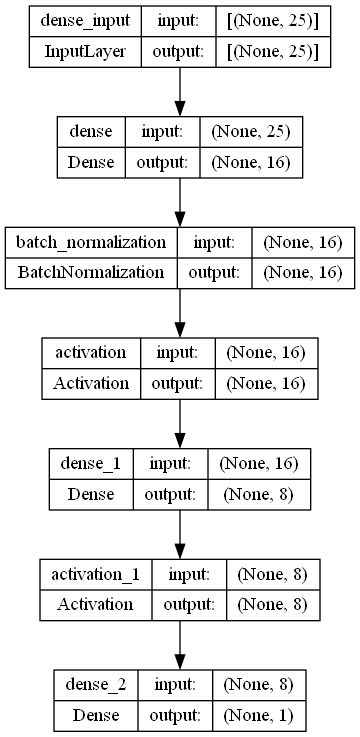

In [144]:
# Visualisasi ANN
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

In [145]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [146]:
# Definisi Functional API

input_layer = Input(shape=(25,))

# Hidden Layer 1
hidden_layer1 = Dense(32)(input_layer)
normalization_layer1 = BatchNormalization()(hidden_layer1)
activation_layer1 = Activation('elu')(normalization_layer1)

# Hidden Layer 2
hidden_layer2 = Dense(16)(activation_layer1)
normalization_layer2 = BatchNormalization()(hidden_layer2)
activation_layer2 = Activation('elu')(normalization_layer2)

# Concat Layer
concat_layer = concatenate([activation_layer2, input_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           832         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32)          128         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32)           0           ['batch_normalization[0][0]']

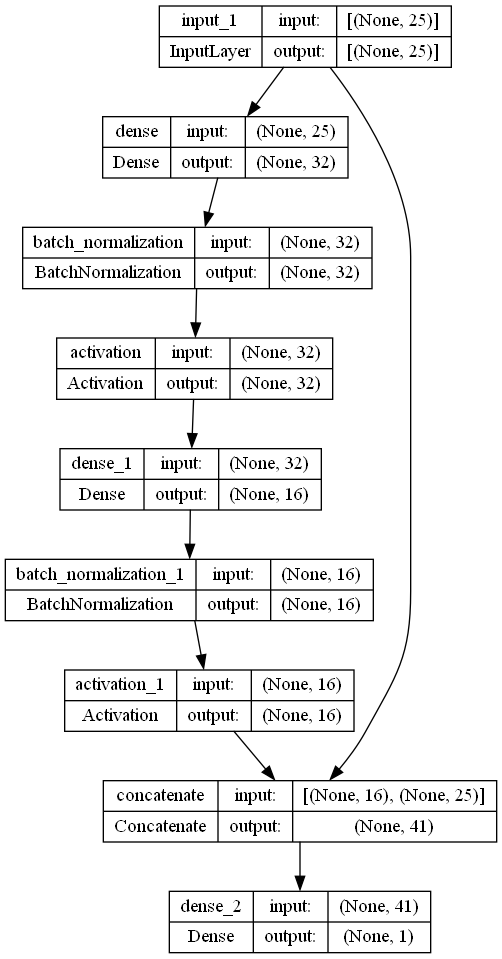

In [147]:
# Visualisasi Model
tf.keras.utils.plot_model(model_functional, show_shapes=True)

In [148]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [149]:
# Definisi Sequential API

model_sequential_improvement = Sequential()

# Hidden Layer 1
model_sequential_improvement.add(Dense(128, input_shape=(25,)))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))


# Hidden Layer 2
model_sequential_improvement.add(Dense(64))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 3
model_sequential_improvement.add(Dense(32))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Dropout(rate=0.1))
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))

# Hidden Layer 4
model_sequential_improvement.add(Dense(16))
model_sequential_improvement.add(tf.keras.layers.BatchNormalization())
model_sequential_improvement.add(tf.keras.layers.Activation('relu'))


# Output Layer
model_sequential_improvement.add(Dense(1, activation='sigmoid')) 

# Compile
model_sequential_improvement.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Nadam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])

model_sequential_improvement.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0

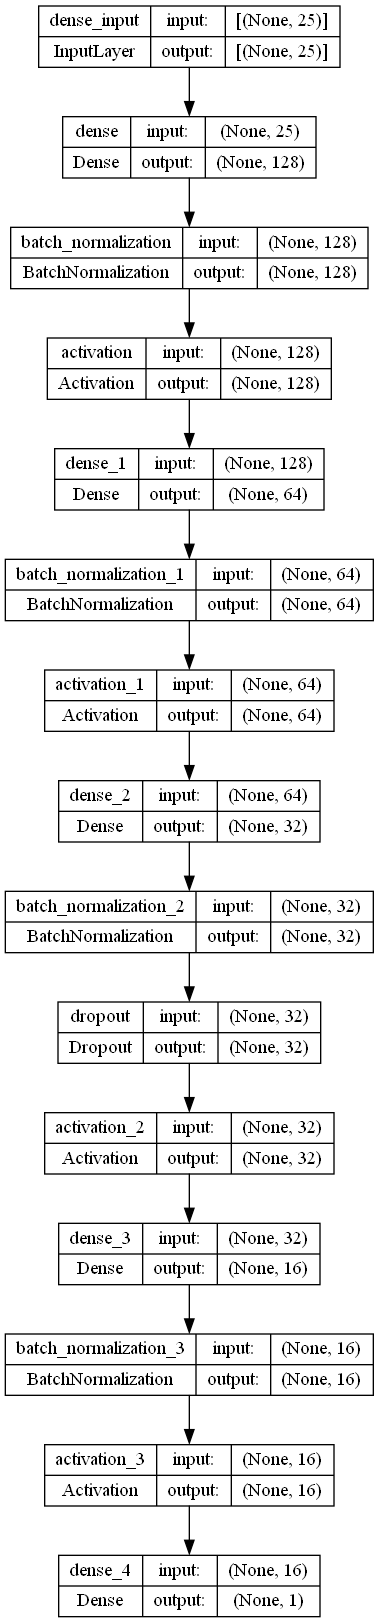

In [150]:
# Visualisasi Model
tf.keras.utils.plot_model(model_sequential_improvement, show_shapes=True)

In [151]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [152]:
# Definisi Functional API

imp_input_layer = Input(shape=(25,))

# Hidden Layer 1
imp_hidden_layer1 = Dense(128)(imp_input_layer)
imp_normalization_layer1 = BatchNormalization()(imp_hidden_layer1)
imp_dropout_layer1 = Dropout(rate=0.1)(imp_normalization_layer1)
imp_activation_layer1 = Activation('relu')(imp_dropout_layer1)

# Hidden Layer 2
imp_hidden_layer2 = Dense(64)(imp_activation_layer1)
imp_normalization_layer2 = BatchNormalization()(imp_hidden_layer2)
imp_activation_layer2 = Activation('relu')(imp_normalization_layer2)

# Hidden Layer 3
imp_hidden_layer3 = Dense(32)(imp_activation_layer2)
imp_normalization_layer3 = BatchNormalization()(imp_hidden_layer3)
imp_activation_layer3 = Activation('relu')(imp_normalization_layer3)

# Hidden Layer 4
imp_hidden_layer4 = Dense(16)(imp_activation_layer3)
imp_normalization_layer4 = BatchNormalization()(imp_hidden_layer4)
imp_activation_layer4 = Activation('relu')(imp_normalization_layer4)


# Concat Layer
imp_concat_layer = concatenate([imp_activation_layer4, imp_input_layer])

# Output Layer
imp_output_layer = Dense(1, activation='sigmoid')(imp_concat_layer)

model_functional_improvement = Model(inputs=imp_input_layer, outputs=imp_output_layer)

# Compile
model_functional_improvement.compile(loss='binary_crossentropy',
                         optimizer= tf.keras.optimizers.Nadam(),
                         metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()])
model_functional_improvement.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          3328        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 128)         512         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['batch_normalization[0][0]']

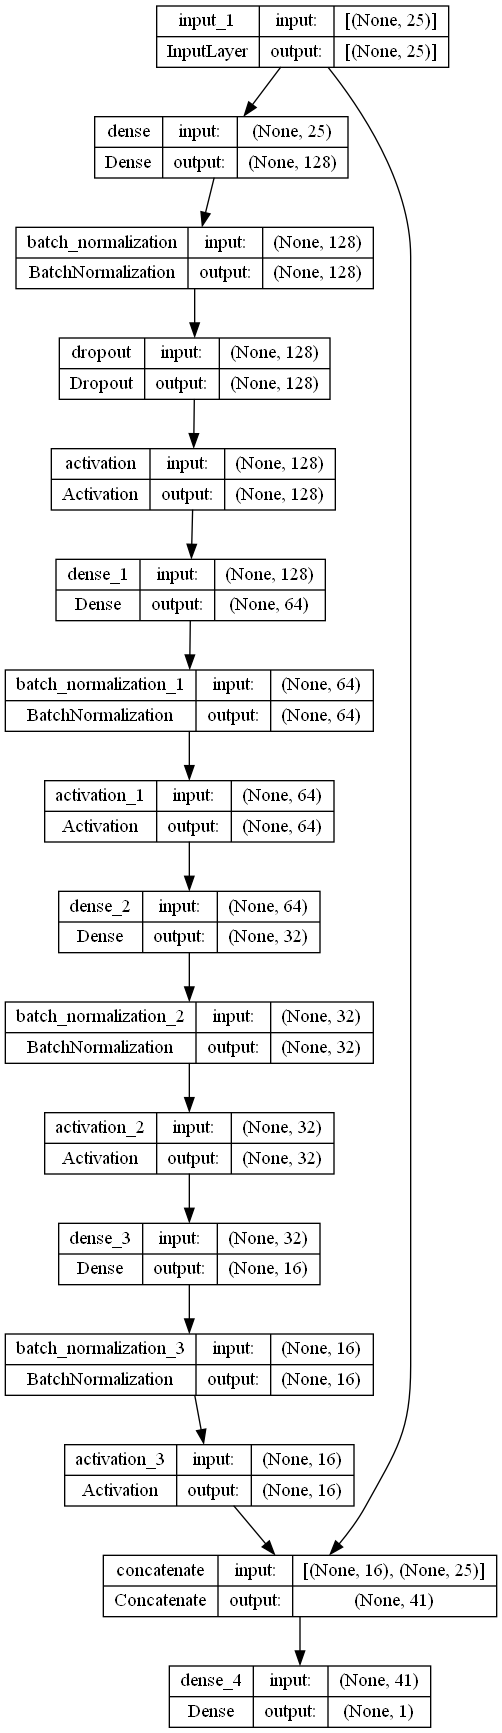

In [153]:
# Plot Layers
tf.keras.utils.plot_model(model_functional_improvement, show_shapes=True)

In [154]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [155]:
# Train the Model
history_seq = model_sequential.fit(train_pipe, epochs=40,validation_data=val_pipe)

Epoch 1/40
1544/1544 [==============================] - 4s 2ms/step - loss: 0.3418 - recall: 0.8552 - auc: 0.9257 - val_loss: 0.2859 - val_recall: 0.8784 - val_auc: 0.9479
Epoch 2/40
1544/1544 [==============================] - 2s 2ms/step - loss: 0.3051 - recall: 0.8797 - auc: 0.9405 - val_loss: 0.2800 - val_recall: 0.8796 - val_auc: 0.9500
Epoch 3/40
1544/1544 [==============================] - 2s 2ms/step - loss: 0.3029 - recall: 0.8822 - auc: 0.9407 - val_loss: 0.2794 - val_recall: 0.8796 - val_auc: 0.9487
Epoch 4/40
1544/1544 [==============================] - 2s 2ms/step - loss: 0.2966 - recall: 0.8829 - auc: 0.9423 - val_loss: 0.2737 - val_recall: 0.8751 - val_auc: 0.9491
Epoch 5/40
1544/1544 [==============================] - 2s 2ms/step - loss: 0.2936 - recall: 0.8815 - auc: 0.9422 - val_loss: 0.2710 - val_recall: 0.8821 - val_auc: 0.9490
Epoch 6/40
1544/1544 [==============================] - 2s 2ms/step - loss: 0.2878 - recall: 0.8836 - auc: 0.9436 - val_loss: 0.2606 - val_r

In [156]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [157]:
# Train the Model

history_func = model_functional.fit(train_pipe, epochs=40,validation_data=val_pipe)

Epoch 1/40
1544/1544 [==============================] - 4s 2ms/step - loss: 0.3255 - recall: 0.8750 - auc: 0.9330 - val_loss: 0.2818 - val_recall: 0.8763 - val_auc: 0.9493
Epoch 2/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.3056 - recall: 0.8764 - auc: 0.9398 - val_loss: 0.2771 - val_recall: 0.8788 - val_auc: 0.9498
Epoch 3/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2963 - recall: 0.8791 - auc: 0.9422 - val_loss: 0.2660 - val_recall: 0.8705 - val_auc: 0.9523
Epoch 4/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2828 - recall: 0.8852 - auc: 0.9462 - val_loss: 0.2531 - val_recall: 0.8804 - val_auc: 0.9546
Epoch 5/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2732 - recall: 0.8959 - auc: 0.9500 - val_loss: 0.2430 - val_recall: 0.8917 - val_auc: 0.9589
Epoch 6/40
1544/1544 [==============================] - 3s 2ms/step - loss: 0.2618 - recall: 0.9086 - auc: 0.9544 - val_loss: 0.2276 - val_r

In [158]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [159]:
# Train the Model

history_seq_improvement = model_sequential_improvement.fit(train_pipe, epochs=40,validation_data=val_pipe)

Epoch 1/40
1544/1544 [==============================] - 7s 3ms/step - loss: 0.3016 - recall: 0.8556 - auc: 0.9383 - val_loss: 0.2461 - val_recall: 0.8609 - val_auc: 0.9519
Epoch 2/40
1544/1544 [==============================] - 4s 2ms/step - loss: 0.2660 - recall: 0.8989 - auc: 0.9518 - val_loss: 0.1968 - val_recall: 0.9203 - val_auc: 0.9723
Epoch 3/40
1544/1544 [==============================] - 4s 2ms/step - loss: 0.2245 - recall: 0.9297 - auc: 0.9644 - val_loss: 0.1780 - val_recall: 0.9307 - val_auc: 0.9749
Epoch 4/40
1544/1544 [==============================] - 4s 2ms/step - loss: 0.2110 - recall: 0.9350 - auc: 0.9669 - val_loss: 0.1803 - val_recall: 0.9373 - val_auc: 0.9742
Epoch 5/40
1544/1544 [==============================] - 4s 2ms/step - loss: 0.2027 - recall: 0.9341 - auc: 0.9688 - val_loss: 0.1628 - val_recall: 0.9510 - val_auc: 0.9762
Epoch 6/40
1544/1544 [==============================] - 4s 2ms/step - loss: 0.1963 - recall: 0.9400 - auc: 0.9698 - val_loss: 0.1592 - val_r

In [160]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [161]:
# Train the Model

history_func_improvement = model_functional_improvement.fit(train_pipe, epochs=40,validation_data=val_pipe)

Epoch 1/40
1544/1544 [==============================] - 7s 3ms/step - loss: 0.3188 - recall: 0.8654 - auc: 0.9327 - val_loss: 0.2527 - val_recall: 0.8829 - val_auc: 0.9521
Epoch 2/40
1544/1544 [==============================] - 4s 3ms/step - loss: 0.2621 - recall: 0.9034 - auc: 0.9530 - val_loss: 0.1928 - val_recall: 0.9269 - val_auc: 0.9724
Epoch 3/40
1544/1544 [==============================] - 4s 3ms/step - loss: 0.2214 - recall: 0.9289 - auc: 0.9647 - val_loss: 0.1720 - val_recall: 0.9390 - val_auc: 0.9762
Epoch 4/40
1544/1544 [==============================] - 4s 3ms/step - loss: 0.2060 - recall: 0.9342 - auc: 0.9676 - val_loss: 0.1679 - val_recall: 0.9485 - val_auc: 0.9760
Epoch 5/40
1544/1544 [==============================] - 4s 3ms/step - loss: 0.1960 - recall: 0.9373 - auc: 0.9697 - val_loss: 0.1655 - val_recall: 0.9386 - val_auc: 0.9760
Epoch 6/40
1544/1544 [==============================] - 4s 3ms/step - loss: 0.1946 - recall: 0.9370 - auc: 0.9702 - val_loss: 0.1638 - val_r

In [162]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
35,0.218144,0.921850,0.965375,0.175741,0.921544,0.975345
36,0.216386,0.922861,0.965681,0.176778,0.929016,0.975341
37,0.216155,0.921813,0.965901,0.172662,0.935658,0.976342
38,0.214139,0.922300,0.966460,0.174475,0.943960,0.975679
39,0.214279,0.923909,0.966532,0.174474,0.947281,0.975539


(0.0, 1.0)

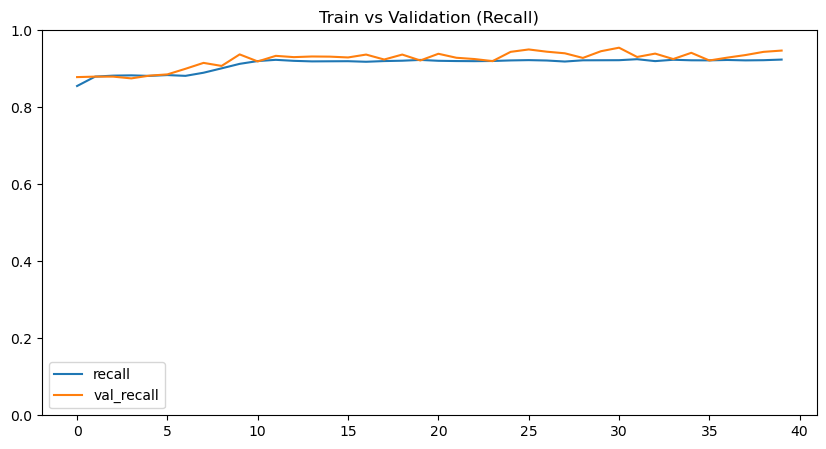

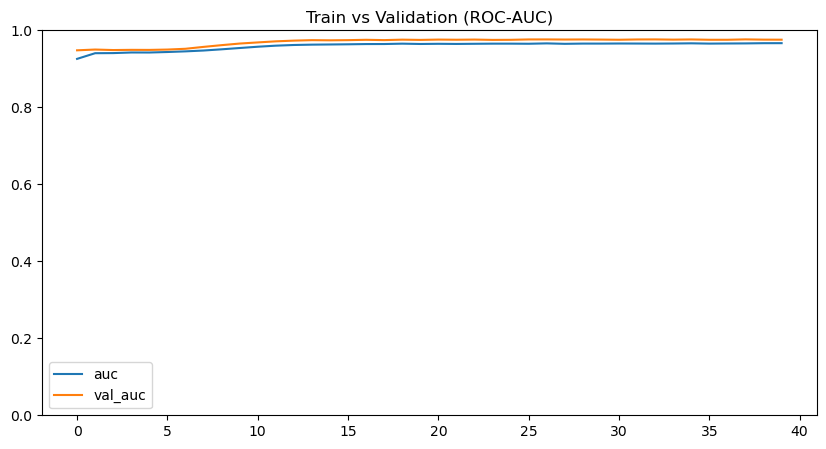

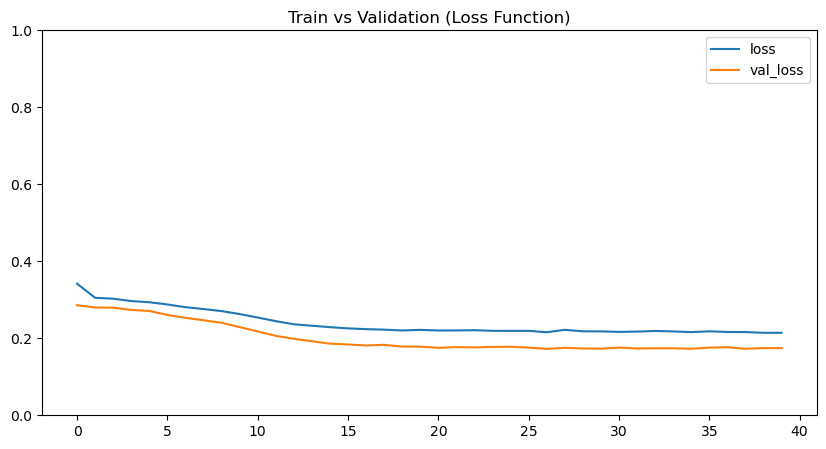

In [163]:
# Plot Traning Results

history_seq_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_seq_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_seq_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

Dari informasi diatas dapat disimpulkan bahwa :

1. Meskipun nilai `Recall` pada *train-set* dan *validation-set* tinggi (0.92 & 0.94) akan tetapi `Recall` pada *validation-set* mengalami *gradient explode* sehingga perlu beberapa teknik seperti regularisasi, dropout dll untuk mengatasi hal tersebut. Yang artinya model tidak stabil/tidak *reliable* dalam menghitung nilai *recall* (karena nilai *recall* nya naik turun)
2. `ROC-AUC` pada *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang tinggi (0.96 & 0.97). Yang artinya model stabil/*reliable* dalam menghitung nilai `ROC-AUC`
3. *Loss* dari *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang rendah (0.21 & 0.17). Yang artinya model dapat mengklasifikasikan *churn* dengan baik

In [164]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 963us/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2610
           1       0.91      0.89      0.90      2942

    accuracy                           0.89      5552
   macro avg       0.89      0.89      0.89      5552
weighted avg       0.89      0.89      0.89      5552



In [165]:
#Perhitungan ROC-AUC Test

auc_seq = roc_auc_score(y_test, y_pred_seq)
auc_seq

0.8936130450523662

Dari informasi diatas bisa disimpulkan bahwa :

1. Nilai `Recall` untuk kelas *churn* pada *train-set* (epoch terakhir) dan *test-set* tidak berbeda signifikan. Untuk *train-set* di angka 0.92 sedangkan untuk *test-set* di angka 0.89. Yang artinya model tersebut *goodfit*

2. Berdasarkan nilai *AUC* (0.89), dapat disimpulkan bahwa model tidak dipengaruhi oleh *treshold*

3. Model memiliki akurasi 89% (Dapat mengklasifikasikan kelas *churn* dengan baik)


In [166]:
# Pembuatan DF Act vs Pred
act_pred_seq = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_seq)
})
df_act_pred_seq = pd.concat([X_test, act_pred_seq],axis=1)

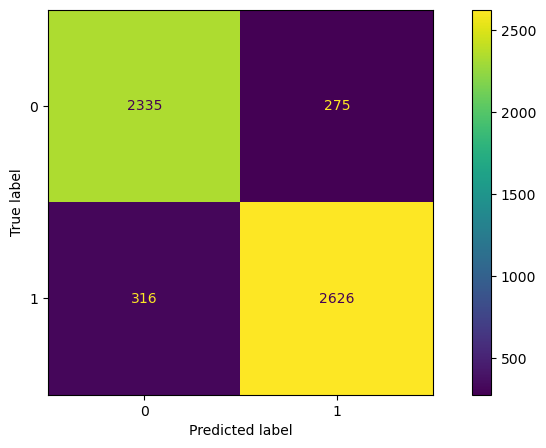

In [167]:
# Confusion Matrix
cm_test_seq = confusion_matrix(y_test, y_pred_seq)
ConfusionMatrixDisplay(cm_test_seq).plot()

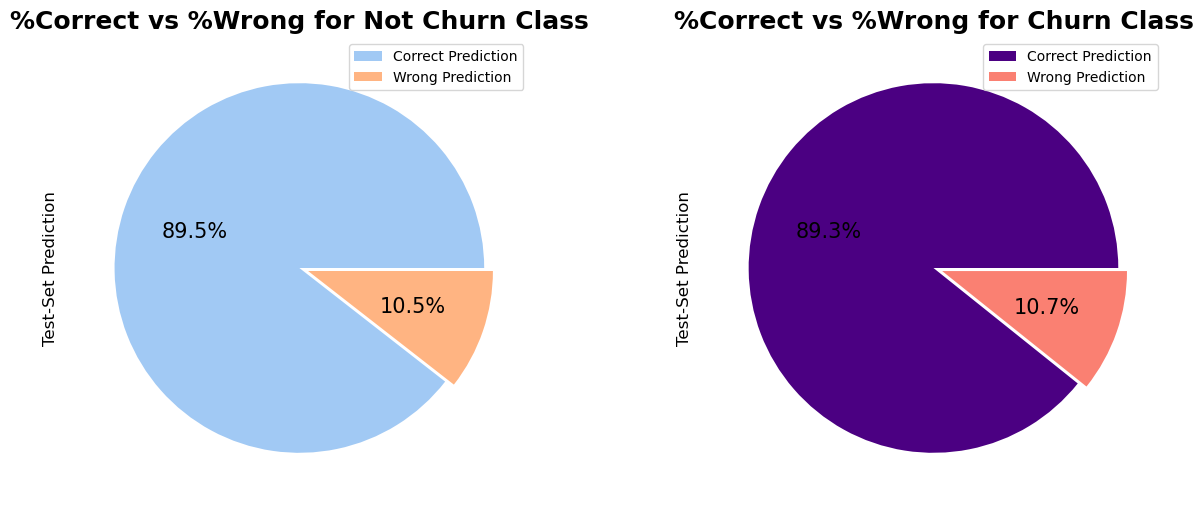

In [168]:
#Pembuatan Pie Chart
fig, ax =plt.subplots(1,2,figsize=(15,6))

act_pred_seq[act_pred_seq['actual']==0]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = sns.color_palette('pastel')[0:2], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[0])
ax[0].set_title('%Correct vs %Wrong for Not Churn Class', fontsize=18, fontweight='bold')
ax[0].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[0].legend(labels=['Correct Prediction', 'Wrong Prediction'])

act_pred_seq[act_pred_seq['actual']==1]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[1])
ax[1].set_title('%Correct vs %Wrong for Churn Class', fontsize=18, fontweight='bold')
ax[1].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[1].legend(labels=['Correct Prediction', 'Wrong Prediction'])


plt.show()


Dari informasi diatas dapat disimpulkan bahwa (*business insight*):

1. Model cenderung memprediksi ke-arah *churn* karena kesalahan pada kelas *churn* lebih besar dari pada kelas tidak *churn* (10.7%)
2. Terdapat potensi kehilangan *customer* karena salah klasifikasi *customer* ke kelas tidak *churn* sebesar 10.5%
3. Terdapat potensi *loss* akibat *marketing cost* yang seharusnya tidak dibutuhkan karena salah klasifikasi *customer* ke kelas *churn* sebesar 10.7%

In [169]:
# Karakteristik True Negative

df_act_pred_seq[(df_act_pred_seq['actual']==0) &(df_act_pred_seq['prediction']==0)].describe()

,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,actual,prediction
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.0,2335.0
mean,-44.604711,34343.312741,13.306564,721.180154,0.0,0.0
std,233.733023,24280.923924,9.110626,169.858221,0.0,0.0
min,-999.000000,815.220000,0.000000,298.457500,0.0,0.0
25%,7.000000,15448.020000,6.000000,717.565000,0.0,0.0
50%,12.000000,30761.370000,13.000000,755.810000,0.0,0.0
75%,16.000000,45614.845000,19.000000,786.110000,0.0,0.0
max,26.000000,99914.050000,44.500000,1031.397500,0.0,0.0


In [170]:
# Karakteristik True Negative
df_act_pred_seq[(df_act_pred_seq['actual']==0) &(df_act_pred_seq['prediction']==0)].describe(include='object')

,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,feedback
count,2335,2335,2335,2335,2335,2335
unique,3,5,2,3,3,9
top,Town,Premium Membership,No,Gift Vouchers/Coupons,Wi-Fi,Too many ads
freq,1186,688,1415,850,825,313


In [171]:
# Karakteristik False Negative

df_act_pred_seq[(df_act_pred_seq['actual']==0) &(df_act_pred_seq['prediction']==1)].describe()

,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,actual,prediction
count,275.000000,275.000000,275.000000,275.000000,275.0,275.0
mean,2.258182,26657.267018,15.540094,534.893385,0.0,1.0
std,105.479210,13841.998537,9.332121,268.945438,0.0,0.0
min,-999.000000,961.680000,0.000000,298.457500,0.0,1.0
25%,10.000000,14895.995000,8.500000,298.457500,0.0,1.0
50%,13.000000,27028.850000,16.000000,435.973548,0.0,1.0
75%,17.000000,38966.805000,23.000000,670.065000,0.0,1.0
max,25.000000,49769.520000,44.500000,1031.397500,0.0,1.0


In [172]:
# Karakteristik False Negative
df_act_pred_seq[(df_act_pred_seq['actual']==0) &(df_act_pred_seq['prediction']==1)].describe(include='object')

,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,feedback
count,275,275,275,275,275,275
unique,3,5,2,3,3,5
top,Town,Gold Membership,No,Gift Vouchers/Coupons,Mobile_Data,Poor Product Quality
freq,159,118,139,101,94,66


Dari informasi diatas dapat disimpulkan bahwa (*business insight*) :

1. Kemungkinan *customer* salah di-prediksi, karena tinggal di-kota, bergabung tanpa *referral* dan lebih menyukai *gift voucher*
2. *Customer* yang salah di-prediksi memiliki beberapa karakteristik *customer* yang *churn* seperti *transaction value* yang rendah, *points* pada *wallet* yang rendah dan pernah memberikan *feedback* buruk. Seharusnya untuk *feature* tersebut diberi bobot lebih tinggi lagi



In [173]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
35,0.198462,0.937608,0.970294,0.167828,0.953508,0.976206
36,0.196819,0.936822,0.970640,0.164902,0.941469,0.976313
37,0.196653,0.936859,0.971005,0.165913,0.959734,0.976773
38,0.196669,0.937308,0.970700,0.165246,0.948526,0.976204
39,0.196324,0.937757,0.971035,0.169228,0.961810,0.976267


(0.0, 1.0)

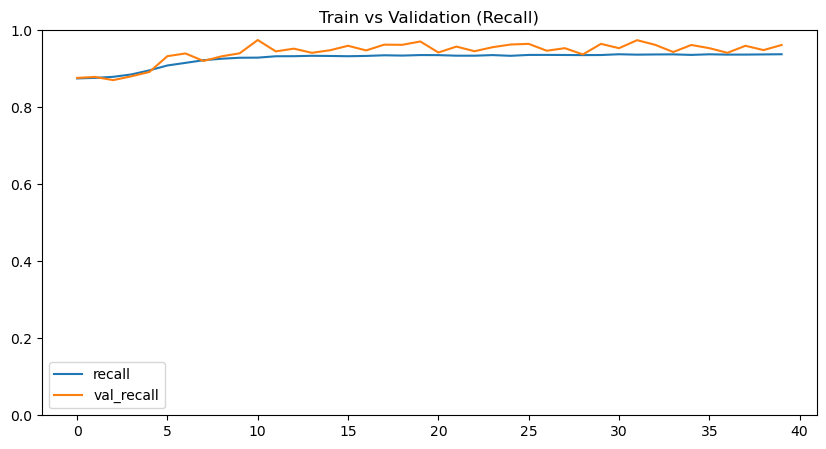

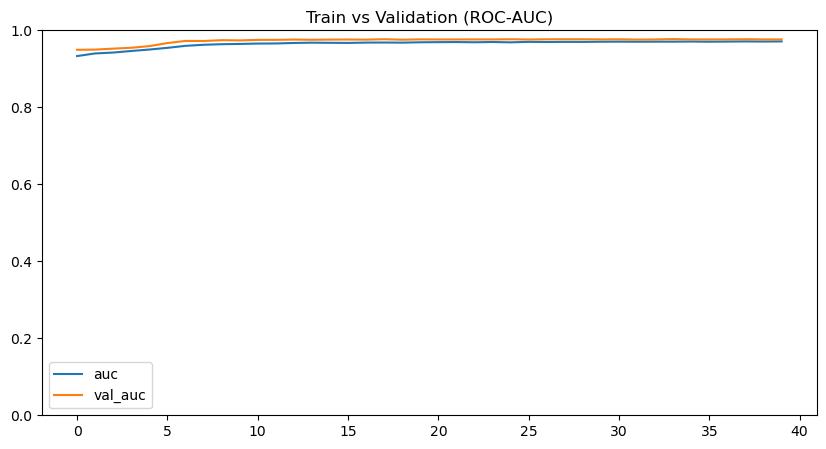

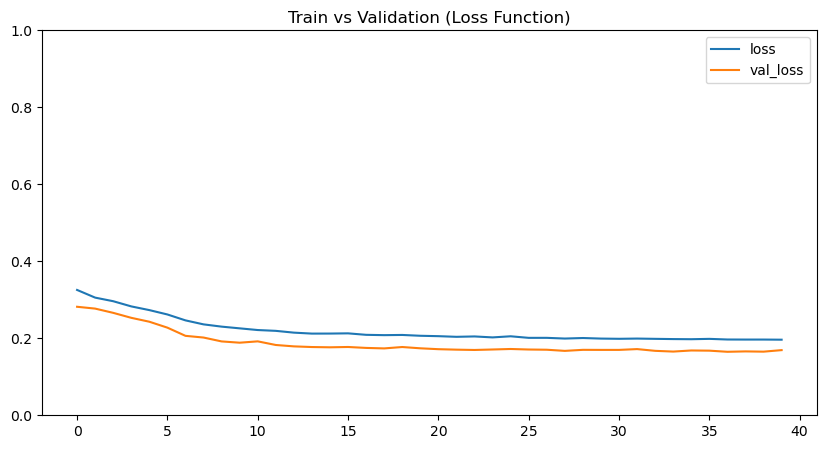

In [174]:
# Plot Traning Results

history_func_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_func_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_func_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

Dari informasi diatas dapat disimpulkan bahwa :

1. Meskipun nilai `Recall` pada *train-set* dan *validation-set* tinggi (0.93 & 0.96) akan tetapi `Recall` pada *validation-set* mengalami *gradient explode* sehingga perlu beberapa teknik seperti regularisasi, dropout dll untuk mengatasi hal tersebut. Yang artinya model tidak stabil/tidak *reliable* dalam menghitung nilai *recall* (karena nilai *recall* nya naik turun)
2. `ROC-AUC` pada *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang tinggi (0.97). Yang artinya model stabil/*reliable* dalam menghitung nilai `ROC-AUC`
3. *Loss* dari *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang rendah (0.19 & 0.16). Yang artinya model dapat mengklasifikasikan *churn* dengan baik

In [175]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test_final)
y_pred_func = np.where(y_pred_func >=0.01, 1, 0)

print(classification_report(y_test, y_pred_func))

174/174 [==============================] - 0s 982us/step
              precision    recall  f1-score   support

           0       0.91      0.60      0.72      2610
           1       0.73      0.95      0.82      2942

    accuracy                           0.78      5552
   macro avg       0.82      0.77      0.77      5552
weighted avg       0.81      0.78      0.77      5552



In [176]:
#Perhitungan ROC-AUC Test

auc_func = roc_auc_score(y_test, y_pred_func)
auc_func

0.7717849040582814

Dari informasi diatas bisa disimpulkan bahwa :

1. Nilai `Recall` untuk kelas *churn* pada *train-set* (epoch terakhir) dan *test-set* tidak selisih jauh (0.93 & 0.95) akan tetapi pada *test-set* nilai model selain `Recall` rendah. Artinya model tersebut tidak dapat mengklasifikasikan kelas *churn* dengan baik

2. Berdasarkan nilai *AUC* (0.77), dapat disimpulkan bahwa model dipengaruhi oleh *treshold*

3. Model memiliki akurasi 78% (tidak dapat mengklasifikasikan *churn* dengan baik)


In [177]:
# Pembuatan DF Act vs Pred
act_pred_func = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_func)
})
df_act_pred_func = pd.concat([X_test, act_pred_func],axis=1)

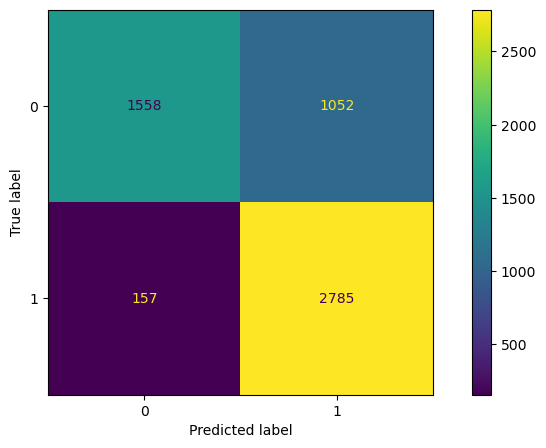

In [178]:
# Confusion Matrix
cm_test_func = confusion_matrix(y_test, y_pred_func)
ConfusionMatrixDisplay(cm_test_func).plot()

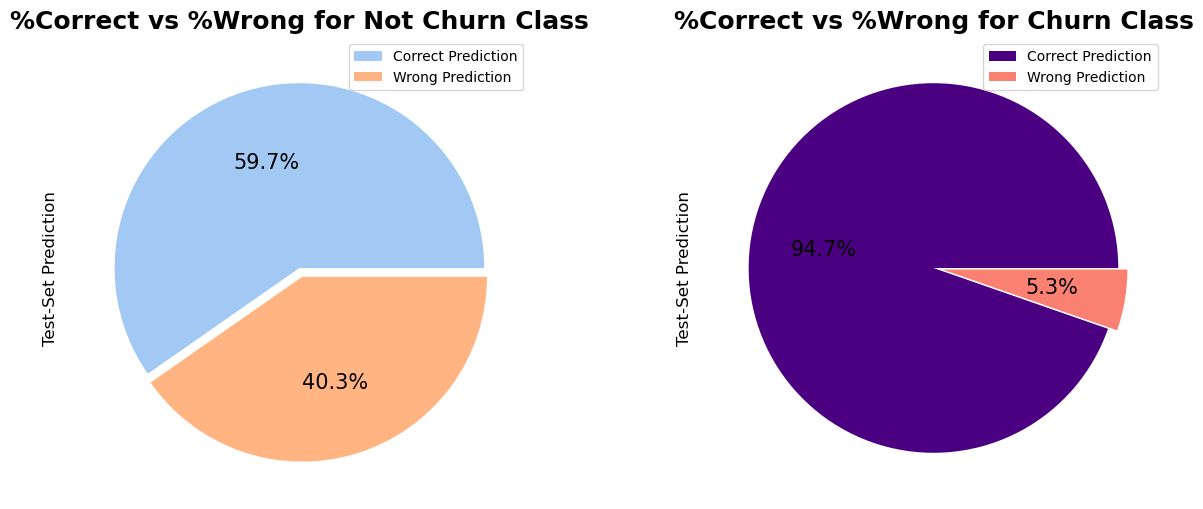

In [179]:
#Pembuatan Pie Chart
fig, ax =plt.subplots(1,2,figsize=(15,6))

act_pred_func[act_pred_func['actual']==0]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = sns.color_palette('pastel')[0:2], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[0])
ax[0].set_title('%Correct vs %Wrong for Not Churn Class', fontsize=18, fontweight='bold')
ax[0].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[0].legend(labels=['Correct Prediction', 'Wrong Prediction'])

act_pred_func[act_pred_func['actual']==1]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[1])
ax[1].set_title('%Correct vs %Wrong for Churn Class', fontsize=18, fontweight='bold')
ax[1].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[1].legend(labels=['Correct Prediction', 'Wrong Prediction'])


plt.show()


Dari informasi diatas dapat disimpulkan bahwa (*business insight*):

1. Model cenderung memprediksi ke-arah tidak *churn* karena kesalahan pada kelas tidak *churn* lebih besar dari pada kelas tidak *churn* (40.3%)
2. Terdapat potensi kehilangan *customer* karena salah klasifikasi *customer* ke kelas tidak *churn* sebesar 40.3%
3. Terdapat potensi *loss* akibat *marketing cost* yang seharusnya tidak dibutuhkan karena salah klasifikasi *customer* ke kelas *churn* sebesar 5.3%

In [180]:
# Karakteristik True Negative

df_act_pred_func[(df_act_pred_func['actual']==0) &(df_act_pred_func['prediction']==0)].describe()

,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,actual,prediction
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.0,1558.0
mean,-62.828626,38811.102105,11.905699,722.705024,0.0,0.0
std,265.664878,26842.859989,8.635369,173.948292,0.0,0.0
min,-999.000000,823.490000,0.000000,298.457500,0.0,0.0
25%,7.000000,16832.877500,5.000000,722.472500,0.0,0.0
50%,12.000000,34445.415000,11.000000,761.120000,0.0,0.0
75%,16.000000,54571.722500,17.000000,790.670000,0.0,0.0
max,26.000000,99914.050000,44.500000,1031.397500,0.0,0.0


In [181]:
# Karakteristik True Negative
df_act_pred_func[(df_act_pred_func['actual']==0) &(df_act_pred_func['prediction']==0)].describe(include='object')

,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,feedback
count,1558,1558,1558,1558,1558,1558
unique,3,5,2,3,3,9
top,Town,Premium Membership,No,Gift Vouchers/Coupons,Wi-Fi,Quality Customer Care
freq,775,683,978,599,550,227


In [182]:
# Karakteristik False Negative

df_act_pred_func[(df_act_pred_func['actual']==0) &(df_act_pred_func['prediction']==1)].describe()

,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,actual,prediction
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.0,1052.0
mean,-5.365019,25717.382700,15.965089,670.225201,0.0,1.0
std,134.929745,14253.726389,9.374680,211.144104,0.0,0.0
min,-999.000000,815.220000,0.000000,298.457500,0.0,1.0
25%,9.000000,13905.170000,9.000000,615.267500,0.0,1.0
50%,13.000000,25889.595000,16.000000,727.135000,0.0,1.0
75%,17.000000,38234.632500,23.000000,773.722500,0.0,1.0
max,26.000000,49883.190000,44.500000,1031.397500,0.0,1.0


In [183]:
# Karakteristik False Negative
df_act_pred_func[(df_act_pred_func['actual']==0) &(df_act_pred_func['prediction']==1)].describe(include='object')

,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,feedback
count,1052,1052,1052,1052,1052,1052
unique,3,6,2,3,3,5
top,Town,Gold Membership,No,Credit/Debit Card Offers,Fiber_Optic,Too many ads
freq,570,411,576,361,366,229


Dari informasi diatas dapat disimpulkan bahwa (*business insight*) :

1. Kemungkinan *customer* salah di-prediksi, karena tinggal di-kota, bergabung tanpa *referral* dan lebih menyukai *gift voucher*
2. *Customer* yang salah di-prediksi memiliki beberapa karakteristik *customer* yang *churn* seperti *transaction value* yang rendah, *points* pada *wallet* yang rendah dan pernah memberikan *feedback* buruk. Seharusnya untuk *feature* tersebut diberi bobot lebih tinggi lagi



In [184]:
# Create DataFrame

history_seq_improvement_df = pd.DataFrame(history_seq_improvement.history)
history_seq_improvement_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
35,0.168159,0.953889,0.977656,0.158668,0.961395,0.975816
36,0.166678,0.956584,0.978118,0.162061,0.959319,0.975058
37,0.164914,0.956284,0.978382,0.162047,0.960980,0.975015
38,0.166090,0.954076,0.978587,0.157613,0.951017,0.976847
39,0.166770,0.953178,0.978290,0.160895,0.948941,0.975230


(0.0, 1.0)

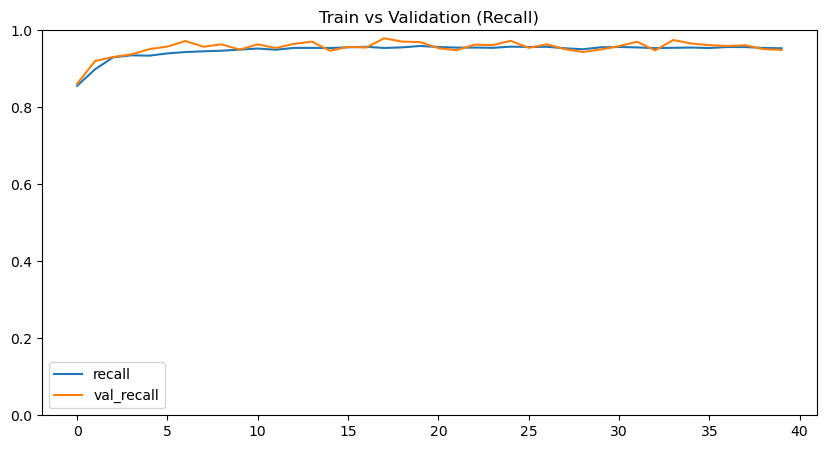

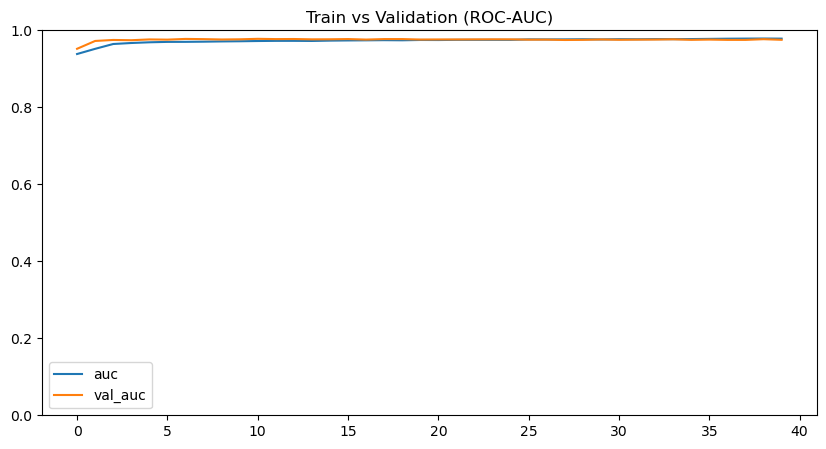

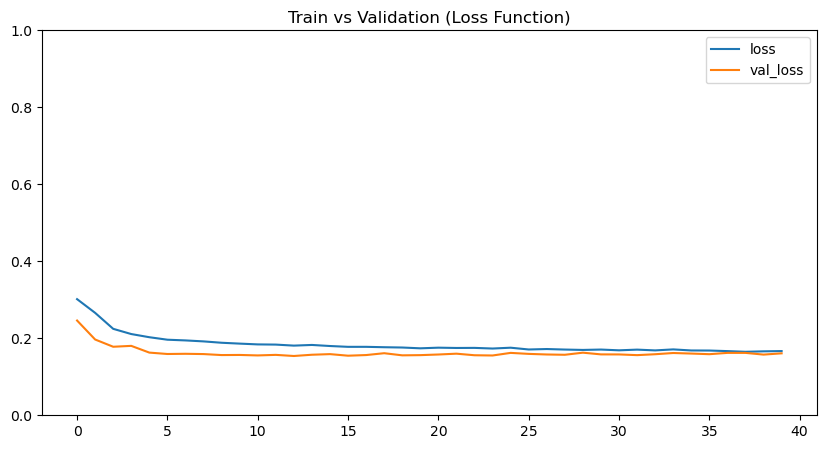

In [185]:
# Plot Traning Results

history_seq_improvement_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_seq_improvement_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_seq_improvement_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

Dari informasi diatas dapat disimpulkan bahwa :

1. `Recall` pada *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang tinggi (0.95 & 0.94). Yang artinya model stabil/*reliable* dalam menghitung nilai `Recall`
2. `ROC-AUC` pada *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang tinggi (0.97). Yang artinya model stabil/*reliable* dalam menghitung nilai `ROC-AUC`
3. *Loss* dari *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang rendah (0.16). Yang artinya model dapat mengklasifikasikan *churn* dengan baik

In [186]:
# Model Evaluation of test-set

y_pred_seq_improvement = model_sequential_improvement.predict(X_test_final)
y_pred_seq_improvement = np.where(y_pred_seq_improvement >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_improvement))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2610
           1       0.92      0.90      0.91      2942

    accuracy                           0.90      5552
   macro avg       0.90      0.90      0.90      5552
weighted avg       0.90      0.90      0.90      5552



In [187]:
#Perhitungan ROC-AUC Test

auc_seq_imp = roc_auc_score(y_test, y_pred_seq_improvement)
auc_seq_imp

0.904952973320727

Dari informasi diatas bisa disimpulkan bahwa :

1. Nilai `Recall` untuk kelas *churn* pada *train-set* (epoch terakhir) dan *test-set* tidak jauh berbeda. Untuk *train-set* di-angka 0.90 dan untuk *test-set* di-angka 0.95. Yang artinya model tersebut *goodfit*

2. Berdasarkan nilai *AUC* (0.90), dapat disimpulkan bahwa model tidak dipengaruhi oleh *treshold*

3. Model memiliki akurasi 90% (Dapat mengklasifikasikan kelas *churn* dengan baik)


In [188]:
# Pembuatan DF Act vs Pred
act_pred_seq_imp = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_seq_improvement)
})
df_act_pred_seq_imp = pd.concat([X_test, act_pred_seq_imp],axis=1)

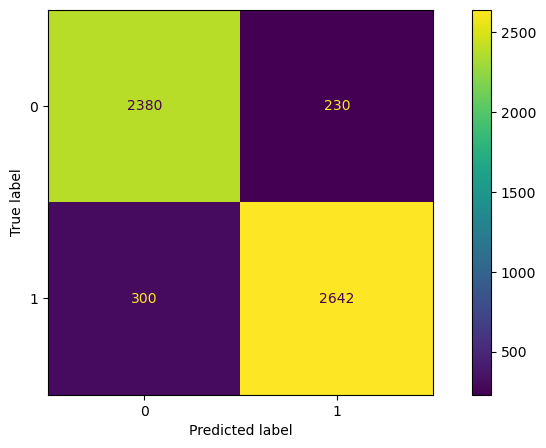

In [189]:
# Confusion Matrix
cm_test_seq_imp = confusion_matrix(y_test, y_pred_seq_improvement)
ConfusionMatrixDisplay(cm_test_seq_imp).plot()

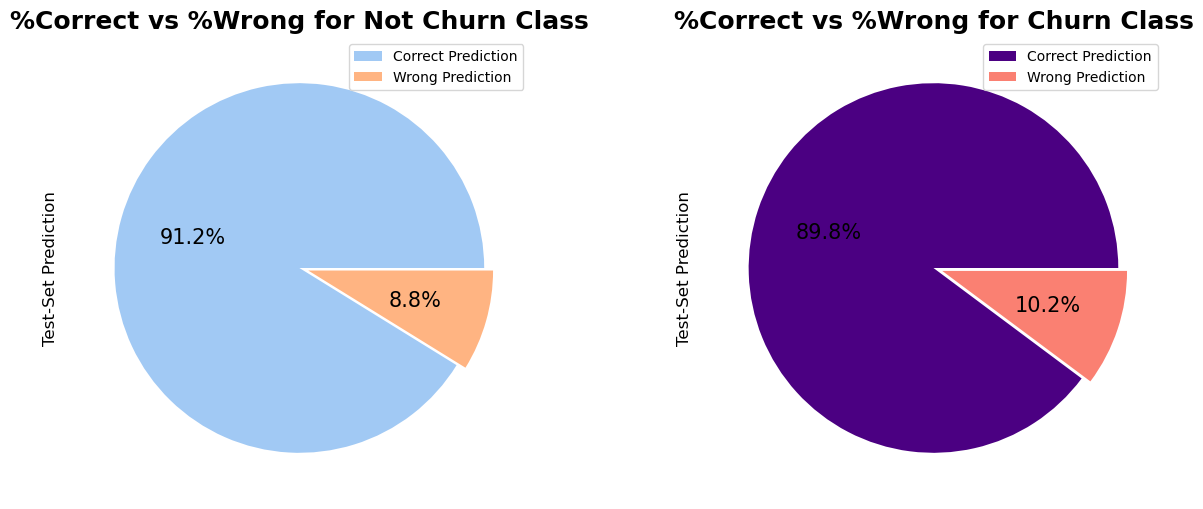

In [190]:
#Pembuatan Pie Chart
fig, ax =plt.subplots(1,2,figsize=(15,6))

act_pred_seq_imp[act_pred_seq_imp['actual']==0]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = sns.color_palette('pastel')[0:2], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[0])
ax[0].set_title('%Correct vs %Wrong for Not Churn Class', fontsize=18, fontweight='bold')
ax[0].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[0].legend(labels=['Correct Prediction', 'Wrong Prediction'])

act_pred_seq_imp[act_pred_seq_imp['actual']==1]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[1])
ax[1].set_title('%Correct vs %Wrong for Churn Class', fontsize=18, fontweight='bold')
ax[1].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[1].legend(labels=['Correct Prediction', 'Wrong Prediction'])


plt.show()


Dari informasi diatas dapat disimpulkan bahwa (*business insight*):

1. Model cenderung memprediksi ke-arah *churn* karena kesalahan pada kelas *churn* lebih besar dari pada kelas tidak *churn* (10.2%)
2. Terdapat potensi kehilangan *customer* karena salah klasifikasi *customer* ke kelas tidak *churn* sebesar 8.8%
3. Terdapat potensi *loss* akibat *marketing cost* yang seharusnya tidak dibutuhkan karena salah klasifikasi *customer* ke kelas *churn* sebesar 10.2%

In [191]:
# Karakteristik True Negative

df_act_pred_seq_imp[(df_act_pred_seq_imp['actual']==0) &(df_act_pred_seq_imp['prediction']==0)].describe()

,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,actual,prediction
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.0,2380.0
mean,-44.744538,34249.768408,13.312677,722.391278,0.0,0.0
std,234.117170,24130.196596,9.085065,176.340592,0.0,0.0
min,-999.000000,815.220000,0.000000,298.457500,0.0,0.0
25%,8.000000,15458.650000,6.000000,717.572500,0.0,0.0
50%,12.000000,30769.705000,13.000000,756.835000,0.0,0.0
75%,16.000000,45506.667500,19.000000,787.545000,0.0,0.0
max,26.000000,99914.050000,44.500000,1031.397500,0.0,0.0


In [192]:
# Karakteristik True Negative
df_act_pred_seq_imp[(df_act_pred_seq_imp['actual']==0) &(df_act_pred_seq_imp['prediction']==0)].describe(include='object')

,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,feedback
count,2380,2380,2380,2380,2380,2380
unique,3,5,2,3,3,9
top,Town,Premium Membership,No,Gift Vouchers/Coupons,Wi-Fi,Too many ads
freq,1210,688,1425,876,843,330


In [193]:
# Karakteristik False Negative

df_act_pred_seq_imp[(df_act_pred_seq_imp['actual']==0) &(df_act_pred_seq_imp['prediction']==1)].describe()

,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,actual,prediction
count,230.000000,230.000000,230.000000,230.000000,230.0,230.0
mean,12.873913,26121.455957,15.913837,485.913465,0.0,1.0
std,5.344607,13862.189480,9.585708,208.872907,0.0,0.0
min,2.000000,961.680000,0.000000,298.457500,0.0,1.0
25%,9.000000,14768.955000,8.000000,298.457500,0.0,1.0
50%,13.000000,26194.565000,17.000000,367.125275,0.0,1.0
75%,16.750000,38554.027500,23.000000,669.072500,0.0,1.0
max,24.000000,49484.900000,44.500000,1031.397500,0.0,1.0


In [194]:
# Karakteristik False Negative
df_act_pred_seq_imp[(df_act_pred_seq_imp['actual']==0) &(df_act_pred_seq_imp['prediction']==1)].describe(include='object')

,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,feedback
count,230,230,230,230,230,230
unique,3,4,2,3,3,5
top,Town,Gold Membership,No,Credit/Debit Card Offers,Fiber_Optic,Poor Product Quality
freq,135,93,129,85,90,54


Dari informasi diatas dapat disimpulkan bahwa (*business insight*) :

1. Kemungkinan *customer* salah di-prediksi, karena tinggal di-kota, bergabung tanpa *referral* dan lebih menyukai *gift voucher*
2. *Customer* yang salah di-prediksi memiliki beberapa karakteristik *customer* yang *churn* seperti hari terakhir login yang tinggi, *transaction value* yang rendah, *points* pada *wallet* yang rendah dan pernah memberikan *feedback* buruk. Seharusnya untuk *feature* tersebut diberi bobot lebih tinggi lagi



In [195]:
# Create DataFrame

history_func_improvement_df = pd.DataFrame(history_func_improvement.history)
history_func_improvement_df.tail(5)

,loss,recall,auc,val_loss,val_recall,val_auc
35,0.167888,0.948275,0.978172,0.157600,0.962640,0.976517
36,0.165813,0.947863,0.978391,0.159206,0.958074,0.975407
37,0.167006,0.949959,0.978207,0.158340,0.963055,0.976407
38,0.168740,0.949248,0.978104,0.156781,0.956413,0.976790
39,0.166095,0.948125,0.978234,0.158928,0.953923,0.976192


(0.0, 1.0)

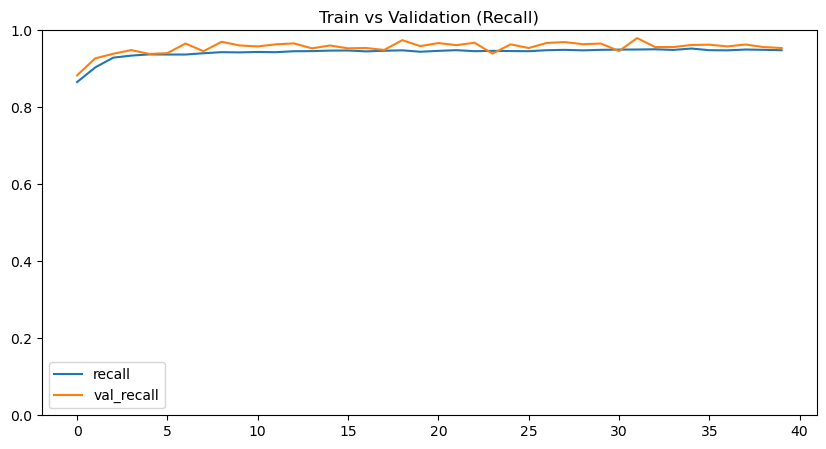

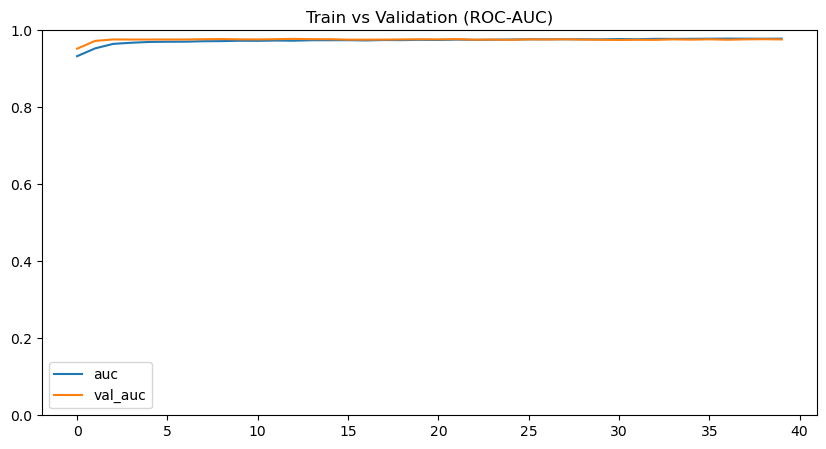

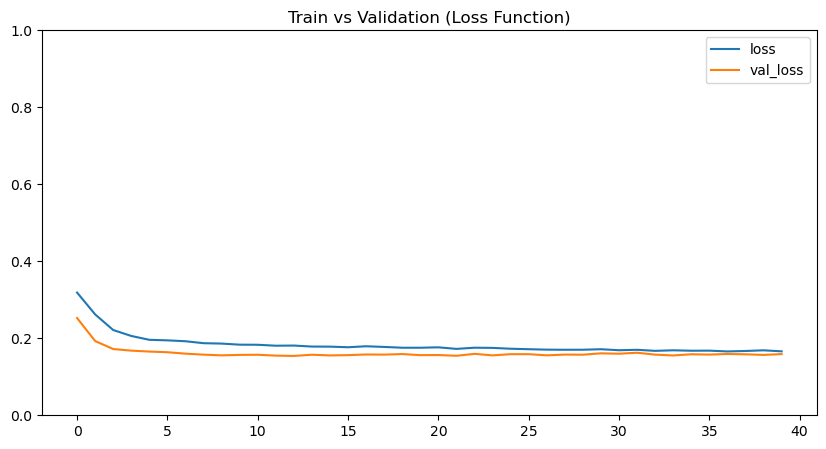

In [196]:
# Plot Traning Results

history_func_improvement_df[['recall', 'val_recall']].plot(title='Train vs Validation (Recall)')
plt.ylim(0,1)
history_func_improvement_df[['auc', 'val_auc']].plot(title='Train vs Validation (ROC-AUC)')
plt.ylim(0,1)
history_func_improvement_df[['loss', 'val_loss']].plot(title='Train vs Validation (Loss Function)')
plt.ylim(0,1)

Dari informasi diatas dapat disimpulkan bahwa :

1. `Recall` pada *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang tinggi (0.94 & 0.95). Yang artinya model stabil/*reliable* dalam menghitung nilai `Recall`
2. `ROC-AUC` pada *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang tinggi (0.97). Yang artinya model stabil/*reliable* dalam menghitung nilai `ROC-AUC`
3. *Loss* dari *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang rendah (0.16 & 0.15). Yang artinya model dapat mengklasifikasikan *churn* dengan baik

In [197]:
# Evaluate Test-Set

y_pred_func_improvement = model_functional_improvement.predict(X_test_final)
y_pred_func_improvement = np.where(y_pred_func_improvement >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func_improvement))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2610
           1       0.91      0.90      0.91      2942

    accuracy                           0.90      5552
   macro avg       0.90      0.90      0.90      5552
weighted avg       0.90      0.90      0.90      5552



In [198]:
#Perhitungan ROC-AUC Test

auc_func_imp = roc_auc_score(y_test, y_pred_func_improvement)
auc_func_imp

0.9021412701761515

Dari informasi diatas bisa disimpulkan bahwa :

1. Nilai `Recall` untuk kelas *churn* pada *train-set* (epoch terakhir) dan *test-set* tidak jauh berbeda. Untuk *train-set* di-angka 0.94 dan untuk *test-set* di-angka 0.90. Yang artinya model tersebut *goodfit*

2. Berdasarkan nilai *AUC* (0.90), dapat disimpulkan bahwa model tidak dipengaruhi oleh *treshold*

3. Model memiliki akurasi 90% (Dapat mengklasifikasikan kelas *churn* dengan baik)


In [199]:
# Pembuatan DF Act vs Pred
act_pred_func_imp = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_func_improvement)
})
df_act_pred_func_imp = pd.concat([X_test, act_pred_func_imp],axis=1)

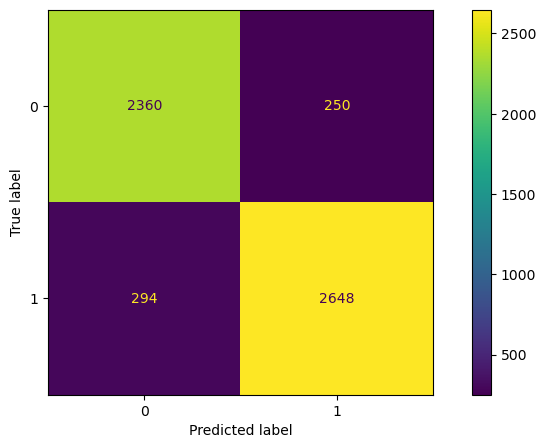

In [200]:
# Confusion Matrix
cm_test_func_imp = confusion_matrix(y_test, y_pred_func_improvement)
ConfusionMatrixDisplay(cm_test_func_imp).plot()

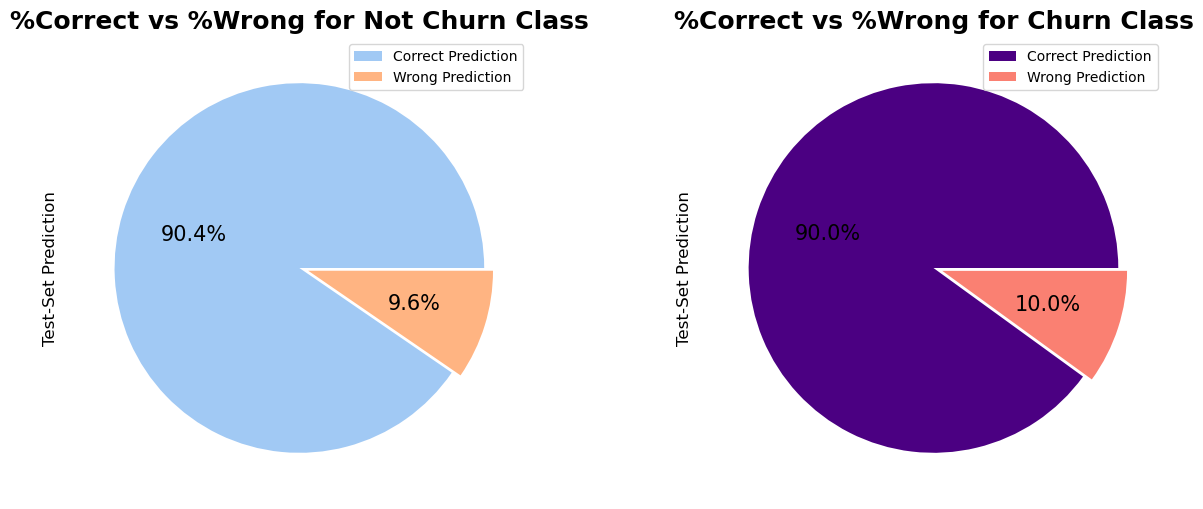

In [201]:
#Pembuatan Pie Chart
fig, ax =plt.subplots(1,2,figsize=(15,6))

act_pred_func_imp[act_pred_func_imp['actual']==0]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = sns.color_palette('pastel')[0:2], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[0])
ax[0].set_title('%Correct vs %Wrong for Not Churn Class', fontsize=18, fontweight='bold')
ax[0].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[0].legend(labels=['Correct Prediction', 'Wrong Prediction'])

act_pred_func_imp[act_pred_func_imp['actual']==1]['prediction'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15},ax=ax[1])
ax[1].set_title('%Correct vs %Wrong for Churn Class', fontsize=18, fontweight='bold')
ax[1].set_ylabel("Test-Set Prediction", fontsize= 12)
ax[1].legend(labels=['Correct Prediction', 'Wrong Prediction'])


plt.show()


Dari informasi diatas dapat disimpulkan bahwa (*business insight*):

1. Model cenderung memprediksi ke-arah *churn* karena kesalahan pada kelas *churn* lebih besar dari pada kelas tidak *churn* (10%)
2. Terdapat potensi kehilangan *customer* karena salah klasifikasi *customer* ke kelas tidak *churn* sebesar 9.6%
3. Terdapat potensi *loss* akibat *marketing cost* yang seharusnya tidak dibutuhkan karena salah klasifikasi *customer* ke kelas *churn* sebesar 10%

In [202]:
# Karakteristik True Negative

df_act_pred_func_imp[(df_act_pred_func_imp['actual']==0) &(df_act_pred_func_imp['prediction']==0)].describe()

,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,actual,prediction
count,2360.000000,2360.000000,2360.000000,2360.000000,2360.0,2360.0
mean,-45.280085,34289.463835,13.263482,720.940705,0.0,0.0
std,235.034688,24198.501470,9.107450,174.661535,0.0,0.0
min,-999.000000,815.220000,0.000000,298.457500,0.0,0.0
25%,7.000000,15469.285000,6.000000,717.677500,0.0,0.0
50%,12.000000,30738.830000,13.000000,756.650000,0.0,0.0
75%,16.000000,45591.755000,19.000000,787.115000,0.0,0.0
max,26.000000,99914.050000,44.500000,1031.397500,0.0,0.0


In [203]:
# Karakteristik True Negative
df_act_pred_func_imp[(df_act_pred_func_imp['actual']==0) &(df_act_pred_func_imp['prediction']==0)].describe(include='object')

,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,feedback
count,2360,2360,2360,2360,2360,2360
unique,3,5,2,3,3,9
top,Town,Premium Membership,No,Gift Vouchers/Coupons,Wi-Fi,Too many ads
freq,1201,688,1418,856,835,324


In [204]:
# Karakteristik False Negative

df_act_pred_func_imp[(df_act_pred_func_imp['actual']==0) &(df_act_pred_func_imp['prediction']==1)].describe()

,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,actual,prediction
count,250.000000,250.000000,250.000000,250.000000,250.0,250.0
mean,13.320000,26396.996120,16.170141,518.525103,0.0,1.0
std,5.428765,13831.824724,9.236115,241.062525,0.0,0.0
min,1.000000,961.680000,0.000000,298.457500,0.0,1.0
25%,10.000000,14581.125000,9.000000,298.457500,0.0,1.0
50%,13.000000,26504.850000,17.000000,489.552706,0.0,1.0
75%,17.000000,38911.030000,23.000000,686.877812,0.0,1.0
max,24.000000,49484.900000,44.500000,1031.397500,0.0,1.0


In [205]:
# Karakteristik False Negative
df_act_pred_func_imp[(df_act_pred_func_imp['actual']==0) &(df_act_pred_func_imp['prediction']==1)].describe(include='object')

,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,feedback
count,250,250,250,250,250,250
unique,3,4,2,3,3,5
top,Town,Gold Membership,No,Gift Vouchers/Coupons,Fiber_Optic,Poor Customer Service
freq,144,107,136,95,92,63


Dari informasi diatas dapat disimpulkan bahwa (*business insight*) :

1. Kemungkinan *customer* salah di-prediksi, karena tinggal di-kota, bergabung tanpa *referral* dan lebih menyukai *gift voucher*
2. *Customer* yang salah di-prediksi memiliki beberapa karakteristik *customer* yang *churn* seperti hari terakhir login yang tinggi, *transaction value* yang rendah, *points* pada *wallet* yang rendah dan pernah memberikan *feedback* buruk. Seharusnya untuk *feature* tersebut diberi bobot lebih tinggi lagi



In [206]:
# Hasil Training

seq_training_df = pd.concat([pd.DataFrame(history_seq_df.iloc[-1]).rename(columns={39 :'sequential'}),pd.DataFrame(history_seq_improvement_df.iloc[-1]).rename(columns={39 :'sequential_improvement'})],axis=1).T
seq_training_df.round(2)

,loss,recall,auc,val_loss,val_recall,val_auc
sequential,0.21,0.92,0.97,0.17,0.95,0.98
sequential_improvement,0.17,0.95,0.98,0.16,0.95,0.98


In [207]:
#Pembuatan list kolom performansi semua model
seq_accu = [accuracy_score(y_test, y_pred_seq),accuracy_score(y_test, y_pred_seq_improvement)]
seq_recall = [recall_score(y_test, y_pred_seq),recall_score(y_test, y_pred_seq_improvement)]
seq_f1 = [f1_score(y_test, y_pred_seq),f1_score(y_test, y_pred_seq_improvement)]
seq_auc =[auc_seq, auc_seq_imp]

In [208]:
#Membuat dataframe performansi
df_seq_eval = pd.DataFrame([seq_accu, seq_f1, seq_recall, seq_auc], index=['Accuracy','F1','Recall','AUC'], columns=['sequential', 'sequential_improvement']).T

In [209]:
# Hasil Test-Set
df_seq_eval = df_seq_eval.round(decimals=2)
df_seq_eval

,Accuracy,F1,Recall,AUC
sequential,0.89,0.90,0.89,0.89
sequential_improvement,0.90,0.91,0.90,0.90


In [210]:
# Hasil Training

func_training_df = pd.concat([pd.DataFrame(history_func_df.iloc[-1]).rename(columns={39 :'functional'}),pd.DataFrame(history_func_improvement_df.iloc[-1]).rename(columns={39 :'functional_improvement'})],axis=1).T
func_training_df.round(2)

,loss,recall,auc,val_loss,val_recall,val_auc
functional,0.20,0.94,0.97,0.17,0.96,0.98
functional_improvement,0.17,0.95,0.98,0.16,0.95,0.98


In [211]:
#Pembuatan list kolom performansi semua model
func_accu = [accuracy_score(y_test, y_pred_func),accuracy_score(y_test, y_pred_func_improvement)]
func_recall = [recall_score(y_test, y_pred_func),recall_score(y_test, y_pred_func_improvement)]
func_f1 = [f1_score(y_test, y_pred_func),f1_score(y_test, y_pred_func_improvement)]
func_auc =[auc_func, auc_func_imp]

In [212]:
#Membuat dataframe performansi
df_func_eval = pd.DataFrame([func_accu, func_f1, func_recall, func_auc], index=['Accuracy','F1','Recall','AUC'], columns=['functional', 'functional_improvement']).T

In [213]:
# Hasil Test-Set
df_func_eval = df_func_eval.round(decimals=2)
df_func_eval

,Accuracy,F1,Recall,AUC
functional,0.78,0.82,0.95,0.77
functional_improvement,0.90,0.91,0.90,0.90


In [214]:
# Evaluasi Train-Set

model_selection_train = pd.concat([seq_training_df,func_training_df], axis=0).round(2)
model_selection_train.sort_values(by= ['recall','val_recall'], ascending=False)

,loss,recall,auc,val_loss,val_recall,val_auc
sequential_improvement,0.17,0.95,0.98,0.16,0.95,0.98
functional_improvement,0.17,0.95,0.98,0.16,0.95,0.98
functional,0.20,0.94,0.97,0.17,0.96,0.98
sequential,0.21,0.92,0.97,0.17,0.95,0.98


In [215]:
# Evaluasi Test-Set

model_selection_test = pd.concat([df_seq_eval,df_func_eval], axis=0).round(2)
model_selection_test.sort_values(by= ['Accuracy','Recall','AUC'], ascending=False)


,Accuracy,F1,Recall,AUC
sequential_improvement,0.90,0.91,0.90,0.90
functional_improvement,0.90,0.91,0.90,0.90
sequential,0.89,0.90,0.89,0.89
functional,0.78,0.82,0.95,0.77


In [217]:
# Summary of Model Sequential

model_sequential_improvement.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0

In [218]:
# Freeze Model

model_sequential_improvement.trainable = False
model_sequential_improvement.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0

In [219]:
# Model Saving


with open('preprocessor.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)

model_sequential_improvement.save('churn_model.h5')

Berdasarkan penelitian diatas dapat disimpulkan bahwa :

- Berdasarkan informasi yang saya dapatkan, *cost* yang dibutuhkan untuk mendapatkan *customer* baru lebih banyak dari pada mempertahankan *customer* yang sudah menggunakan produk perusahaan. Oleh karena itu, penting bagi perusahaan untuk mengetahui apakah *customer* memiliki potensi *churn* atau tidak. Dengan mengetahui hal tersebut, perusahaan bisa melakukan strategi preventif untuk mencegah agar *customer* tidak *churn*, sehingga perusahaan akan terhindari dari *loss investment*.  **Oleh karena itu dibutuhkan model optimal untuk memprediksi *churn* dari *customer** 


- Sebelum membuat model, saya perlu eksplorasi untuk mengetahui faktor-faktor apa sajakah yang mempengaruhi klasifikasi *churn* dari *customer*

    1. *Customer* yang tidak *churn* memiliki *average transaction value* yang lebih tinggi (terpusat di 18.000-40.000) dari pada *customer* yang *churn* (terpusat di 16.000-36.000). Sehingga *average transaction value* berpengaruh terhadap klasifikasi *churn*
    2. *Customer* yang tidak *churn* memiliki *average frequency login days* yang lebih rendah (terpusat di 8-20x) dari pada *customer* yang *churn* (terpusat di 10-25x). Sehingga *average frequency login days* berpengaruh terhadap klasifikasi *churn*
    3. *Customer* yang tidak *churn* memiliki *points in wallet* yang lebih tinggi (terpusat di 700-800) dari pada *customer* yang *churn* (terpusat di 600-700). Sehingga *points in wallet* berpengaruh terhadap klasifikasi *churn*
    4. *Customer* yang paling banyak *churn* adalah :
        - *Customer* yang tinggal di kota
        - *Customer* dengan *no membership*
        - *Customer* yang tidak menggunakan penawaran
        - *Customer* yang *complaint*
        - *Customer* yang *complaint* nya tidak dapat diaplikasikan/direalisasikan
        - *Customer* yang memberikan *feedback* buruk


- Setelah melakukan eksplorasi data selanjutnya saya melakukan *training* pada 4 Model yaitu

    1. Model Sequential API
    2. Model Functional API
    3. Model Improvement Sequential API
    4. Model Improvement Functional API


- Dari hasil *training* didapatkan *Model Improvement Sequential API* adalah model terbaik karena memiliki ukuran terkecil dan *score metrics* terbaik diantara semua model (kecuali *recall score*). *Recall score* model *functional API* terbaik diantara semua model akan tetapi memiliki *score* yang rendah untuk *metrics* selain *recall*. Nilai yang terlalu rendah juga berbahaya karena dapat menyebabkan perusahaan mengalami kerugian yang besar akibat biaya *marketing* yang seharusnya tidak dibutuhkan (akibat *precision* terlalu rendah)

- Model Evaluation (**evaluasi berdasarkan *metrics***) untuk *Model Improvement Sequential API* adalah :

    1. `Recall` pada *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang tinggi (0.95 & 0.94). Yang artinya model stabil/*reliable* dalam menghitung nilai `Recall`
    2. `ROC-AUC` pada *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang tinggi (0.97). Yang artinya model stabil/*reliable* dalam menghitung nilai `ROC-AUC`
    3. *Loss* dari *train-set* dan *validation-set* cukup dekat dan memiliki nilai yang rendah (0.16). Yang artinya model dapat mengklasifikasikan *churn* dengan baik
    4. Nilai `Recall` untuk kelas *churn* pada *train-set* (epoch terakhir) dan *test-set* tidak jauh berbeda. Untuk *train-set* di-angka 0.90 dan untuk *test-set* di-angka 0.95. Yang artinya model tersebut *goodfit*
    5. Berdasarkan nilai *AUC* (0.90), dapat disimpulkan bahwa model tidak dipengaruhi oleh *treshold*
    6. Model memiliki akurasi 90% (Dapat mengklasifikasikan kelas *churn* dengan baik)

- Model Analysis (**evaluasi berdasarkan *business***) untuk *Model Improvement Sequential API* adalah :

    1. Kelebihan
        
        - Dapat mengklasifikasikan kelas *churn* dengan baik
        - Memiliki waktu prediksi yang cepat
        - Model memiliki *bias* yang kecil
        - Jika ingin meng-update data pada model atau ingin menggunakan model untuk data lain. Maka dapat dilakukan dengan cepat (via *transfer learning*)


    2. Kelemahan
        - Terdapat potensi kehilangan *customer* karena salah klasifikasi *customer* ke kelas tidak *churn* sebesar 10%
        - Terdapat potensi *loss* akibat *marketing cost* yang seharusnya tidak dibutuhkan karena salah klasifikasi *customer* ke kelas *churn* sebesar 9.4%

    3. Analisis Lain (Analisis penyebab salah klasifikasi untuk *False Negative*)
        - Kemungkinan *customer* salah di-prediksi, karena tinggal di-kota, bergabung tanpa *referral* dan lebih menyukai *gift voucher*
        - *Customer* yang salah di-prediksi memiliki beberapa karakteristik *customer* yang *churn* seperti hari terakhir login yang tinggi, *transaction value* yang rendah, *points* pada *wallet* yang rendah dan pernah memberikan *feedback* buruk. Seharusnya untuk *feature* tersebut diberi bobot lebih tinggi lagi

        

- Kemudian *continuous improvement* yang bisa saya sarankan adalah :

    1. Untuk meningkatkan performa model maka, dapat memberikan bobot (**hasil konsultasi dengan pakar *domain***) ke *feature* yang memiliki *power* besar untuk mengklasifikasikan *customer* ke kelas *churn*. Seperti pada analisis karakteristik *customer* yang salah prediksi (untuk False Negative), maka perlu memberi bobot yang lebih tinggi untuk *feature* hari terakhir login, *transaction value*, *point* pada *wallet* dan *review* yang diberikan oleh *customer*

    2. Jika model sudah memiliki performa baik, selanjutnya model bisa dikembangkan lagi ke rekomendasi *Budget Retention* untuk setiap kelas *customer*. Jadi *customer* yang *churn* akan dikelompokkan berdasarkan *buy value* dan diberikan urutan prioritas. Kemudian setiap urutan prioritas tersebut akan ada rekomendasi *Budget Retention*. Nantinya pengembangan ini dapat membantu perusahaan untuk membandingkan *Buying Power Customer* dari kelas tersebut VS *Budget Retention*. Jika *Buying Power* < *Budget Retention* maka sebaiknya *customer* pada kelas tersebut tidak menjadi prioritas untuk dipertahankan, sebaliknya jika *Buying Power* > *Budget Retention* maka *customer* pada kelas tersebut menjadi prioritas untuk dipertahankan

    3. Selain itu model ini juga bisa dikembangkan ke lagi ke model rekomendasi NPD/Improvement. Karena *dataset* ini juga menyediakan *feedback* dan *complain*. Hal ini bisa dijadikan sebagai *Voice of Customer* yang biasanya digunakan di metode *Lean Six Sigma* untuk menyusun NPD. Oleh karena itu, bisa dilakukan *clustering* pada *Voice of Customer* untuk mendapatkan *cluster* NPD/Improvement yang dibutuhkan *customer*